#### Ski Resort Project University of Zürich 2020
## The test notebook for case5_Les Diablerets_2500_ 1200-3200 m
## setup 1: 9000 experiments 200 scenarios & 45 Policies

This notebook is used for the visualization of the "ema_workbench Ski_Resort" project. The outputs of ema_workbench experiments which have been saved after executing the python codes (XLR_Framework.py) are loaded and various visualization techniques are used and maps are produced.

### *Reading the libraries*

Main libraries are imported here, although there a few libraries that are imported later.

In [5]:
import os
import os.path
import random
from operator import add
from datetime import datetime, date, timedelta

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

import shutil
import ema_workbench
import time

from scipy.integrate import simps
from numpy import trapz
from decimal import Decimal, ROUND_DOWN, ROUND_UP

### *Seting up the display extent*

In [6]:
pd.set_option('display.max_columns',69)
pd.set_option('display.max_rows',119)

## XLRM Framework

## Step 5: Model deployment

### Loading the outputs

In this section using the load_results class of ema_workbench we load the saved results of python experiments (.tar.gz)

In [7]:
from ema_workbench import load_results, ema_logging
from ema_workbench.analysis.pairs_plotting import (pairs_lines, pairs_scatter,
                                                   pairs_density)
ema_logging.log_to_stderr(level=ema_logging.DEFAULT_LEVEL)

# load the data
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case1_sattel-hochstuckli\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case2_Atzmaening\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case3_hoch-ybrig\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1339\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b1822\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2000\setup1'
root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case5_champex\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b1564\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2141\setup1'
#root = r'C:\Saeid\Prj100\SA_2\snowModelUZH\case6_davos_elevations_b2584\setup1'

rootOut = os.path.join(root, 'Results_3')
fh = os.path.join(rootOut, '9000_runs.tar.gz')
experiments, outcomes = load_results(fh)

[MainProcess/INFO] results loaded succesfully from C:\Saeid\Prj100\SA_2\snowModelUZH\case4_villars-diablerets_elevations_b2500\setup1\Results_3\9000_runs.tar.gz


Check and see if data has been loaded properly or not?

12 parameters:

X2fM, X3iPot, X5temp, X6tempArt, Xfactor1, xClimateModel, xRCP, x1SnowThershold, xGoodDays, scenario, policy, model

In [8]:
print(experiments.shape)
print(list(experiments.keys()))
print(list(outcomes.keys()))

(9000, 12)
['X2fM', 'X3iPot', 'X5temp', 'X6tempArt', 'Xfactor1', 'xClimateModel', 'xRCP', 'x1SnowThershold', 'xGoodDays', 'scenario', 'policy', 'model']
['S_Ave_GoodDay', 'GCM_RCM', 'S_GoodDay', 'S_Ave_ArtSnow', 'S_Ave_Financial', 'S_Ave_Likelihood', 'tipping_points']


#### S_Ave_GoodDay: Seasonal average (1981-2100) of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm) 
#### GCM_RCM: The Climate model which has been used (Should not be presented in the outcomes)
#### Ave_GoodDay: Seasonal (1981-2100) number of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)
#### S_Ave_ArtSnow: Seasonal average (1981-2100) of number of days with the possibility of Artificial Snow Making (ave TEMP < -2 to -1)
#### S_Ave_Financial: Relative seasonal average (1981-2100) of Financial balance of Ski resort
#### S_Ave_Likelihood: Seasonal average (1981-2100) Likelihood of survival of a Ski resort from tipping points
#### tipping_points: Number of tipping points (1981-2100)

## Step 6: Visualization of the EMA_Workbench Results

 the analysis package of ema_workbench contains a wide range of techniques for visualization and analysis of the results from series of computational experiments. 

### Visualization with ema-workbench - part1

### Pairwise Scatter Plot

[MainProcess/DEBUG] generating pairwise scatter plot


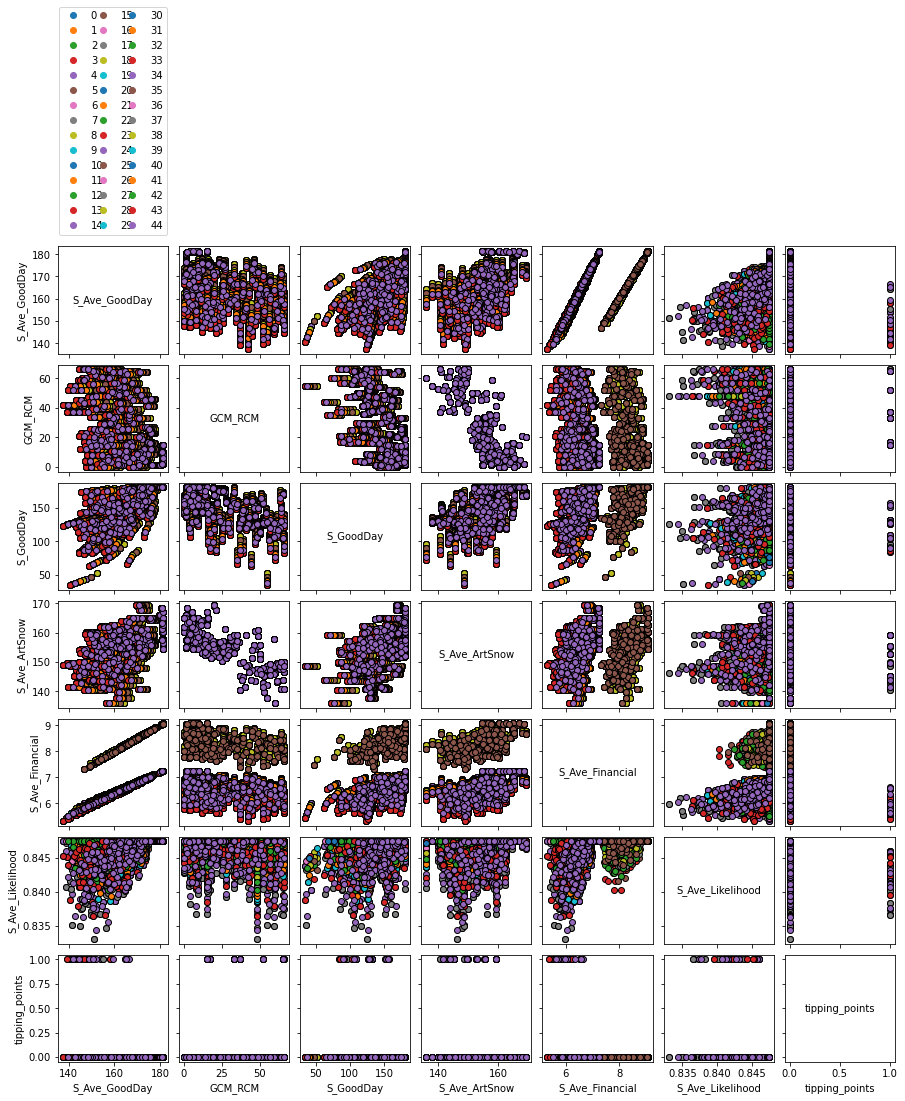

In [9]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, outcomes, group_by='policy',
                                         legend=True)
fig.set_size_inches(15, 15)

fig.savefig(os.path.join(rootOut, 'SA_All_outputs.svg'), format='svg', dpi=600)
#fig.savefig(os.path.join(rootOut, 'SA_All_outputs.tiff'), format='tiff', dpi=600)


plt.show()

In [13]:
outcomes2 = outcomes
outcomes2 = outcomes2.pop('GCM_RCM')

KeyError: 'GCM_RCM'

In [14]:
print(outcomes2)

{'S_Ave_GoodDay': array([168.820625  , 177.74214788, 169.35462373, ..., 162.15393644,
       155.38885775, 158.62363226]), 'S_GoodDay': array([[168.6805    , 175.01375   , 182.        , ..., 148.85025   ,
        160.46405   , 158.2939    ],
       [154.7754    , 181.        , 182.        , ..., 181.        ,
        156.83485   , 148.18245   ],
       [176.1938    , 181.        , 182.        , ..., 131.66735   ,
        170.70425   , 123.78095   ],
       ...,
       [160.82792857, 163.08403571, 182.        , ..., 133.75596429,
        155.92217857, 149.58478571],
       [172.80639286, 181.        , 182.        , ..., 131.29785714,
        109.64285714, 119.43139286],
       [166.96839286, 181.        , 182.        , ..., 147.63825   ,
        124.72375   , 136.05678571]]), 'S_Ave_ArtSnow': array([158.84330508, 156.8709322 , 152.73330508, ..., 160.98847458,
       152.22067797, 156.15135593]), 'S_Ave_Financial': array([8.49627119, 8.89847458, 8.51118644, ..., 6.45381356, 6.16491525,
 

In [15]:
new_dict = {key:val for key, val in outcomes2.items() if key != 'GCM_RCM'} 

In [16]:
print(list(new_dict.keys()))

['S_Ave_GoodDay', 'S_GoodDay', 'S_Ave_ArtSnow', 'S_Ave_Financial', 'S_Ave_Likelihood', 'tipping_points']


[MainProcess/DEBUG] generating pairwise scatter plot
No handles with labels found to put in legend.


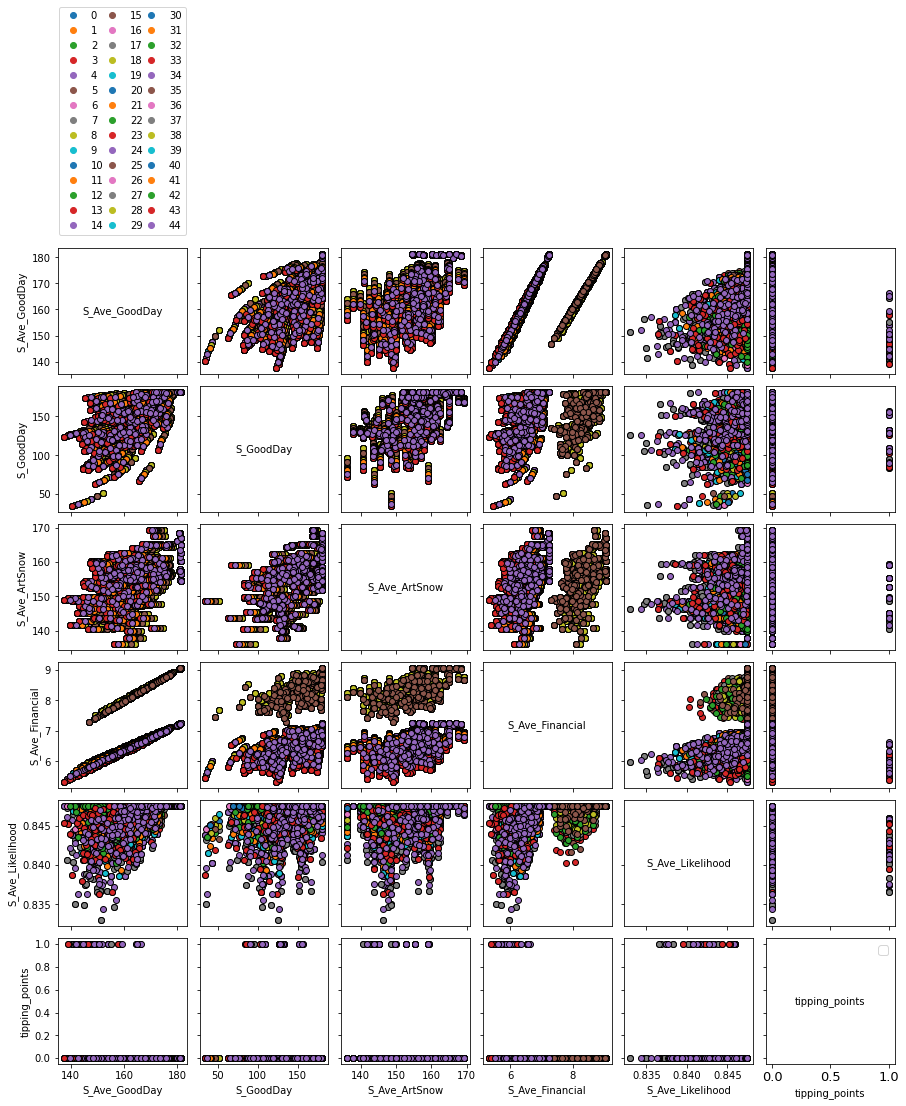

In [17]:
from ema_workbench.analysis import pairs_plotting
fig, axes = pairs_plotting.pairs_scatter(experiments, new_dict, group_by='policy',
                                         legend=True)

plt.yticks(fontsize=13)
plt.xticks(fontsize=13)
plt.legend(fontsize=13)

fig.set_size_inches(15, 15)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs2.svg'), format='svg', dpi=300)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs2.tiff'), format='tiff', dpi=300)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs2_2.tiff'), format='tiff', dpi=150)
fig.savefig(os.path.join(rootOut, 'SA_All_outputs2_2.jpg'), format='jpg', dpi=150)



plt.show()

### Moving the outputs to the folder of results
### Assign the address of outputs folders

In [18]:
import tarfile

shutil.move(os.path.join(root, 'Outputs_py'), os.path.join(rootOut, 'Outputs_py'))
shutil.move(os.path.join(root, 'outSeason'), os.path.join(rootOut, 'outSeason')) 
shutil.move(os.path.join(root, 'outSeason_Likelihood_survival'), os.path.join(rootOut, 'outSeason_Likelihood_survival')) 
shutil.move(os.path.join(root, 'outSeasonArt'), os.path.join(rootOut, 'outSeasonArt')) 
shutil.move(os.path.join(root, 'outSeasonFinancial'), os.path.join(rootOut, 'outSeasonFinancial')) 

rootVisualization = rootOut
with tarfile.open(os.path.join(rootVisualization, '9000_runs.tar.gz'),"r") as zip_ref:
    zip_ref.extractall(os.path.join(rootVisualization, '9000_runs'))

# We have five types of outputs
outDaily = os.path.join(rootVisualization, 'Outputs_py')
outSeasonTippingPoint = os.path.join(rootVisualization, 'outSeason')
outSeason_Likelihood_survival = os.path.join(rootVisualization, 'outSeason_Likelihood_survival')
outSeasonArtificialSnowPossibility = os.path.join(rootVisualization, 'outSeasonArt')
outSeasonFinancial = os.path.join(rootVisualization, 'outSeasonFinancial')
out_ema = os.path.join(rootVisualization, '9000_runs')

In [19]:
df4_ema_experiment = pd.read_csv(os.path.join(out_ema, 'experiments.csv'))
df4_ema_y = pd.read_csv(os.path.join(out_ema, 'S_Ave_GoodDay.csv'), header=None)
df4_ema_y.columns = ["Yout"]
df4_ema_y1 = pd.read_csv(os.path.join(out_ema, 'GCM_RCM.csv'), header=None)
df4_ema_y1.columns = ["Yout1"]
df4_ema_y3 = pd.read_csv(os.path.join(out_ema, 'S_GoodDay.csv'), header=None)
df4_ema_y3.columns = ["Yout3" + "_" + str(i) for i in range(118)]
df4_ema_y4 = pd.read_csv(os.path.join(out_ema, 'S_Ave_ArtSnow.csv'), header=None)
df4_ema_y4.columns = ["Yout4"]
df4_ema_y5 = pd.read_csv(os.path.join(out_ema, 'S_Ave_Financial.csv'), header=None)
df4_ema_y5.columns = ["Yout5"]
df4_ema_y6 = pd.read_csv(os.path.join(out_ema, 'S_Ave_Likelihood.csv'), header=None)
df4_ema_y6.columns = ["Yout6"]
df4_ema_y7 = pd.read_csv(os.path.join(out_ema, 'tipping_points.csv'), header=None)
df4_ema_y7.columns = ["Yout7"]

#### Make a database from the outputs of ema framework by concatinating the every output and experiments table

In [20]:
df_final_ema = pd.concat((df4_ema_experiment, df4_ema_y, df4_ema_y1, df4_ema_y3, df4_ema_y4, df4_ema_y5, df4_ema_y6, df4_ema_y7 ), axis = 1)
df_final_ema.head()

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  xRCP  \
0  1.507439   978.917168  5.048430  -1.582626  1.362405       0.406394   3.0   
1  1.211966  1030.620563  5.634327  -1.974060  1.470899       0.469307   2.0   
2  1.240789   915.169596  5.375401  -1.437269  0.688585       0.441969   3.0   
3  1.391456  1081.847394  5.851132  -1.306226  1.304422       0.452050   1.0   
4  1.342779  1016.589488  5.432323  -1.931276  2.679508       0.065521   1.0   

   x1SnowThershold  xGoodDays  scenario  policy     model        Yout  Yout1  \
0            200.0       70.0         0       0  UZHModel  168.820625     49   
1            200.0       70.0         1       0  UZHModel  177.742148     23   
2            200.0       70.0         2       0  UZHModel  169.354624     50   
3            200.0       70.0         3       0  UZHModel  181.042206      5   
4            200.0       70.0         4       0  UZHModel  169.069764      1   

     Yout3_0    Yout3_1  Yout3_2  Yout3_3  Yout3_4  Yout3_5  Yout3_6  Yout3_7  \
0  168.68050  175.01375    182.0    181.0    181.0    181.0    182.0    181.0   
1  154.77540  181.00000    182.0    181.0    181.0    181.0    182.0    181.0   
2  176.19380  181.00000    182.0    181.0    181.0    181.0    182.0    181.0   
3  156.98030  181.00000    182.0    181.0    181.0    181.0    182.0    181.0   
4  165.98585  181.00000    182.0    181.0    181.0    181.0    182.0    181.0   

   Yout3_8  Yout3_9  Yout3_10  Yout3_11  Yout3_12  Yout3_13  Yout3_14  \
0    181.0    181.0     182.0     181.0     181.0     181.0     182.0   
1    181.0    181.0     182.0     181.0     181.0     181.0     182.0   
2    181.0    181.0     182.0     181.0     181.0     181.0     182.0   
3    181.0    181.0     182.0     181.0     181.0     181.0     182.0   
4    181.0    181.0     182.0     181.0     181.0     181.0     182.0   

   Yout3_15  Yout3_16  Yout3_17  Yout3_18  Yout3_19  ...   Yout3_88  Yout3_89  \
0     181.0     181.0     181.0     182.0     181.0  ...  151.75905  172.6578   
1     181.0     181.0     181.0     182.0     181.0  ...  181.00000  181.0000   
2     181.0     181.0     181.0     182.0     181.0  ...  150.01360  163.5116   
3     181.0     181.0     181.0     182.0     181.0  ...  181.00000  181.0000   
4     181.0     181.0     181.0     182.0     181.0  ...  181.00000  160.5948   

    Yout3_90   Yout3_91   Yout3_92   Yout3_93   Yout3_94  Yout3_95   Yout3_96  \
0   84.98195  163.23130  158.62655  173.51875  156.23355  156.6764  177.08735   
1  182.00000  181.00000  181.00000  181.00000  182.00000  174.1468  165.84355   
2  148.84680  175.27415  151.38650  143.38030  157.62800  160.1645  166.08970   
3  182.00000  181.00000  181.00000  181.00000  182.00000  181.0000  181.00000   
4  153.36405  144.24345  181.00000  181.00000  173.64740  162.0508  138.44490   

    Yout3_97   Yout3_98   Yout3_99  Yout3_100  Yout3_101  Yout3_102  \
0  181.00000  132.41685  169.76770  146.22275  178.86695  147.77425   
1  181.00000  179.08990  155.03865  159.53295  181.00000  173.87000   
2  172.14725  157.91935  122.30380  139.08065  168.04930  133.03595   
3  181.00000  182.00000  181.00000  181.00000  181.00000  182.00000   
4  181.00000  120.50070  141.85270  157.03815  156.32625  182.00000   

   Yout3_103  Yout3_104  Yout3_105  Yout3_106  Yout3_107  Yout3_108  \
0  169.36600  157.22125  138.28125  121.29640  142.14395  174.99095   
1  140.44265  170.17305  154.27900  168.81890  181.00000  174.17180   
2  155.12830  181.00000  162.98175  145.35785  172.05680  159.25165   
3  181.00000  181.00000  181.00000  182.00000  181.00000  181.00000   
4  181.00000  144.11020  157.22885  165.68915  179.78445  172.74345   

   Yout3_109  Yout3_110  Yout3_111  Yout3_112  Yout3_113  Yout3_114  \
0  156.44910  149.77005  177.89860  175.42750   155.5778   144.7092   
1  157.69940  136.06245  166.12090  174.15645   120.3343   182.0000   
2  117.79655  139.28755  132.63200  170.51710   121.8872   146.7542   
3  181.

In [21]:
df_final_ema.to_csv(os.path.join(rootVisualization, 'df_final_ema.csv'), index = False)

In [22]:
# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values

YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3_95'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values
y7 = df_final_ema['Yout7'].values

In [23]:
outFolder = rootVisualization
outSeasonFolder = os.path.join(outFolder, 'outSeason')
outSeasonFinancial = os.path.join(outFolder, 'outSeasonFinancial')
outSeasonArt = os.path.join(outFolder, 'outSeasonArt')
outSeason_Likelihood_survival = os.path.join(outFolder, 'outSeason_Likelihood_survival')

In [24]:
#### 2020/07/22 ####
all_Files = []
for filename in os.walk(outSeasonFolder):
    all_Files = filename[2]
    
totalFiles_loc = []
for i in range(len(all_Files)):
    totalFiles_loc.append(os.path.join(outSeasonFolder, all_Files[i]))
    
### 2020/08/23
all_Files_fin = []
for filename in os.walk(outSeasonFinancial):
    all_Files_fin = filename[2]
    
totalFiles_loc_fin = []
for i in range(len(all_Files_fin)):
    totalFiles_loc_fin.append(os.path.join(outSeasonFinancial, all_Files_fin[i]))
    
### 2020/08/23
all_Files_Art = []
for filename in os.walk(outSeasonArt):
    all_Files_Art = filename[2]
    
totalFiles_loc_Art = []
for i in range(len(all_Files_Art)):
    totalFiles_loc_Art.append(os.path.join(outSeasonArt, all_Files_Art[i]))

### 2020/08/23
all_Files_Like = []
for filename in os.walk(outSeason_Likelihood_survival):
    all_Files_Like = filename[2]
    
totalFiles_loc_Like = []
for i in range(len(all_Files_Like)):
    totalFiles_loc_Like.append(os.path.join(outSeason_Likelihood_survival, all_Files_Like[i]))


#### Total number of outputs (csv files) in each out folder produced by our framework

In [25]:
print(len(totalFiles_loc))
print(len(totalFiles_loc_fin))
print(len(totalFiles_loc_Art))
print(len(totalFiles_loc_Like))

9000
9000
9000
9000


In [26]:
emptyMatrixGoodDays = [np.empty([119, 69]) for _ in range(len(totalFiles_loc))]
    
for i in range(0, len(totalFiles_loc), 1):
    b = []
    with open(totalFiles_loc[i], 'r') as file:
        outputReaderlines = file.readlines()
        for j in range (len(outputReaderlines)):
            b.append(outputReaderlines[j].replace('\n','').split(','))
    
    emptyMatrixGoodDays[i] = np.array(b)

### 2020/08/23
emptyMatrixfin = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_fin))]

for i in range(0, len(totalFiles_loc_fin), 1):
    b = []
    with open(totalFiles_loc_fin[i], 'r') as file:
        outputReaderlines_fin = file.readlines()
        for j in range (len(outputReaderlines_fin)):
            b.append(outputReaderlines_fin[j].replace('\n','').split(','))
    
    emptyMatrixfin[i] = np.array(b)

### 2020/08/23
emptyMatrixArt = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Art))]

for i in range(0, len(totalFiles_loc_Art), 1):
    b = []
    with open(totalFiles_loc_Art[i], 'r') as file:
        outputReaderlines_Art = file.readlines()
        for j in range (len(outputReaderlines_Art)):
            b.append(outputReaderlines_Art[j].replace('\n','').split(','))
    
    emptyMatrixArt[i] = np.array(b)
    
### 2020/08/23
emptyMatrixLike = [np.empty([119, 69]) for _ in range(len(totalFiles_loc_Like))]

for i in range(0, len(totalFiles_loc_Like), 1):
    b = []
    with open(totalFiles_loc_Like[i], 'r') as file:
        outputReaderlines_Like = file.readlines()
        for j in range (len(outputReaderlines_Like)):
            b.append(outputReaderlines_Like[j].replace('\n','').split(','))
    
    emptyMatrixLike[i] = np.array(b)

In [27]:
#matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=2)
matrix_GoodDays = np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1)), axis=0)
matrix_fin = np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1)), axis=0)
matrix_Art = np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1)), axis=0)
matrix_Like = np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1)), axis=0)

C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\IPython\core\interactiveshell.py:3337: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  if (await self.run_code(code, result,  async_=asy)):


In [28]:
print(matrix_GoodDays.shape)
print(matrix_fin.shape)
print(matrix_Art.shape)
print(matrix_Like.shape)

(9000, 119, 2)
(9000, 119, 2)
(9000, 119, 2)
(9000, 119, 2)


#### Check the header of outputs

In [29]:
print(emptyMatrixGoodDays[1][0,1])
print(emptyMatrixfin[1][0,1])
print(emptyMatrixArt[1][0,1])
print(emptyMatrixLike[1][0,1])

isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp
Money_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp
ArtSnowPossibility_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp
isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp


In [30]:
matrix_GoodDays26= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP26' in emptyMatrixGoodDays[i][0,1] or \
                             '_26_' in emptyMatrixGoodDays[i][0,1] ) , axis=0) 
matrix_GoodDays45= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP45' in emptyMatrixGoodDays[i][0,1] or \
                            '_45_' in emptyMatrixGoodDays[i][0,1] ), axis=0)
matrix_GoodDays85= np.stack((emptyMatrixGoodDays[i] for i in range (0,len(totalFiles_loc),1) \
                             if 'RCP85' in emptyMatrixGoodDays[i][0,1] or \
                            '_85_' in emptyMatrixGoodDays[i][0,1]), axis=0) 

### 2020/08/23
matrix_fin26= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP26' in emptyMatrixfin[i][0,1] or \
                             '_26_' in emptyMatrixfin[i][0,1] ) , axis=0) 
matrix_fin45= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP45' in emptyMatrixfin[i][0,1] or \
                            '_45_' in emptyMatrixfin[i][0,1] ), axis=0)
matrix_fin85= np.stack((emptyMatrixfin[i] for i in range (0,len(totalFiles_loc_fin),1) \
                             if 'RCP85' in emptyMatrixfin[i][0,1] or \
                            '_85_' in emptyMatrixfin[i][0,1]), axis=0) 

### 2020/08/23
matrix_Art26= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP26' in emptyMatrixArt[i][0,1] or \
                             '_26_' in emptyMatrixArt[i][0,1] ) , axis=0) 
matrix_Art45= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP45' in emptyMatrixArt[i][0,1] or \
                            '_45_' in emptyMatrixArt[i][0,1] ), axis=0)
matrix_Art85= np.stack((emptyMatrixArt[i] for i in range (0,len(totalFiles_loc_Art),1) \
                             if 'RCP85' in emptyMatrixArt[i][0,1] or \
                            '_85_' in emptyMatrixArt[i][0,1]), axis=0) 

### 2020/08/23
matrix_Like26= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP26' in emptyMatrixLike[i][0,1] or \
                             '_26_' in emptyMatrixLike[i][0,1] ) , axis=0) 
matrix_Like45= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP45' in emptyMatrixLike[i][0,1] or \
                            '_45_' in emptyMatrixLike[i][0,1] ), axis=0)
matrix_Like85= np.stack((emptyMatrixLike[i] for i in range (0,len(totalFiles_loc_Like),1) \
                             if 'RCP85' in emptyMatrixLike[i][0,1] or \
                            '_85_' in emptyMatrixLike[i][0,1]), axis=0) 

In [31]:
print(type(matrix_GoodDays))
print(matrix_GoodDays.ndim)
print(len(matrix_GoodDays))
print(matrix_GoodDays.size)
print(matrix_GoodDays.dtype)
print(matrix_GoodDays.dtype.name)
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
print(matrix_Art26.shape)
print(matrix_Art45.shape)
print(matrix_Art85.shape)
print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

<class 'numpy.ndarray'>
3
9000
2142000
<U47
str1504
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000


In [32]:
print(matrix_GoodDays[2, 1:, 1:2].shape)
print(matrix_fin[2, 1:, 1:2].shape)
print(matrix_Art[2, 1:, 1:2].shape)
print(matrix_Like[2, 1:, 1:2].shape)

(118, 1)
(118, 1)
(118, 1)
(118, 1)


### Calculate the quantiles for each year of simulation (1981-2100)

In [33]:
q10_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years = np.quantile(matrix_GoodDays[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin = np.quantile(matrix_fin[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art = np.quantile(matrix_Art[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like = np.quantile(matrix_Like[:, 1:, 1:2].astype(float), 0.9, axis=0)


In [34]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

print(q10_years_Art[0])
print(q25_years_Art[0])
print(q50_years_Art[0])
print(q75_years_Art[0])
print(q90_years_Art[0])
print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[136.65629167]
[151.90717651]
[168.37225]
[181.]
[181.]
(118, 1)
[5.47]
[6.19]
[7.075]
[7.24]
[8.89]
(118, 1)
[161.411]
[166.5625]
[170.035]
[173.735]
[176.692]
(118, 1)
[100.]
[100.]
[100.]
[100.]
[100.]
(118, 1)


#### Set the parameters of making figure

In [35]:
num_Simulation = 9000
p_Step = 20
alpha_Fade = 0.04

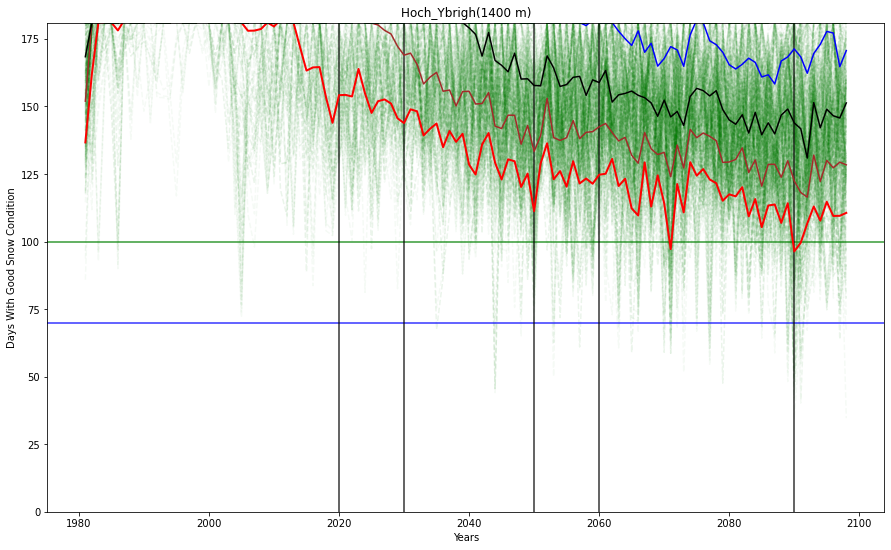

In [36]:
fig1, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_GoodDays[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=70, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=0, top =181)
axs.set_title('Hoch_Ybrigh(1400 m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig1.savefig(os.path.join(rootVisualization, 'RCP_All_number_of_day_goodSnow.svg'), format='svg', dpi=300)

plt.show()

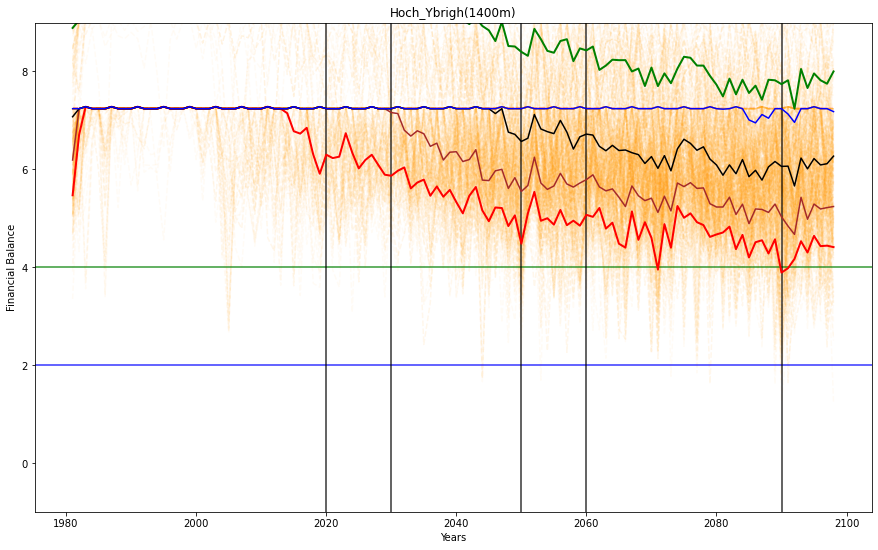

In [37]:
fig2, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_fin[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=4, color='green', alpha=0.8)
axs.axhline(y=2, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_fin, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_fin, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_fin, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_fin, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_fin, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =9)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Financial Balance')

fig2.savefig(os.path.join(rootVisualization, 'RCP_All_Financial.svg'), format='svg', dpi=300)

plt.show()

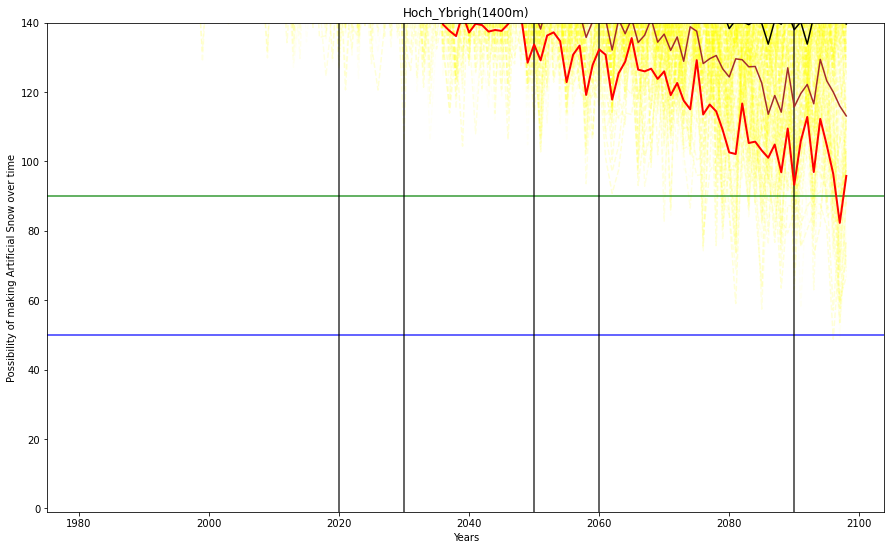

In [38]:
fig3, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_Art[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='yellow', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Art, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Art, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Art, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Art, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Art, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =140)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Possibility of making Artificial Snow over time')

fig3.savefig(os.path.join(rootVisualization, 'RCP_All_ArtSnow.svg'), format='svg', dpi=300)

plt.show()

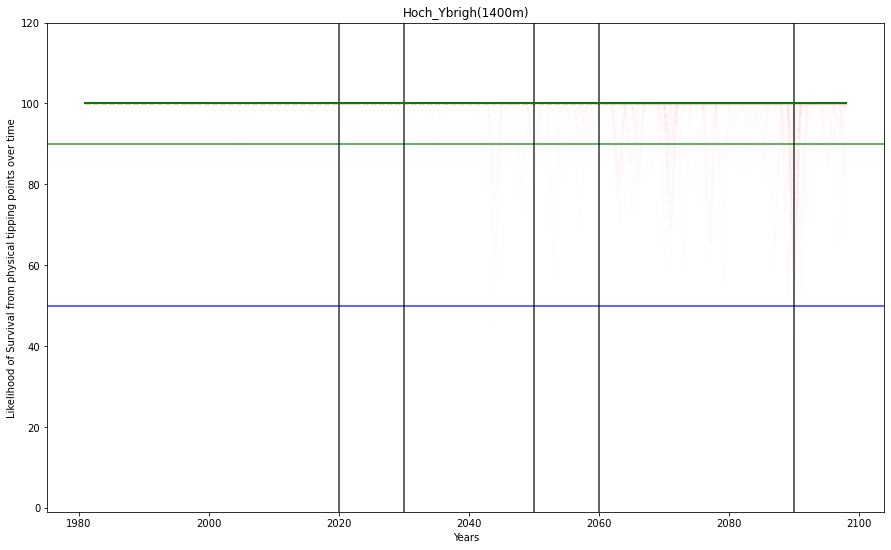

In [39]:
fig4, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, num_Simulation, p_Step):
    a = matrix_Like[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='pink', linestyle = '--', alpha=alpha_Fade)


axs.axhline(y=90, color='green', alpha=0.8)
axs.axhline(y=50, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_Like, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_Like, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_Like, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_Like, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_Like, color='green', linewidth = 2, alpha=1)


axs.set_ylim(bottom=-1, top =120)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Likelihood of Survival from physical tipping points over time')

fig4.savefig(os.path.join(rootVisualization, 'RCP_All_Likelihood.svg'), format='svg', dpi=300)

plt.show()

### Visualization with ema-workbench - part2 

## Scenario Discovery 
### A model driven approach to scenario development

There is ample literature on both CART and PRIM and their relative merits for use in scenario discovery.

S_Ave_GoodDay: Seasonal average (1981-2100) of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)

GCM_RCM: The Climate model which has been used (Should not be presented in the outcomes)

Ave_GoodDay: Seasonal (1981-2100) number of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)

S_Ave_ArtSnow: Seasonal average (1981-2100) of number of days with the possibility of Artificial Snow Making (ave TEMP < -2 to -1)

S_Ave_Financial: Relative seasonal average (1981-2100) of Financial balance of Ski resort

S_Ave_Likelihood: Seasonal average (1981-2100) Likelihood of survival of a Ski resort from tipping points

tipping_points: Number of tipping points (1981-2100)

In [40]:
from ema_workbench.analysis import prim

x = experiments
y = outcomes['S_Ave_GoodDay'] < 160
prim_alg = prim.Prim(x, y, threshold=0.6)
box1 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 9000 points remaining, containing 3105 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting x1SnowThershold
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.09777777777777778, coverage: 0.2834138486312399, density: 1.0 restricted_dimensions: 6


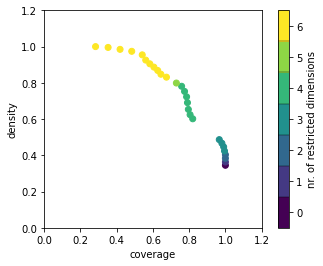

<Figure size 432x288 with 0 Axes>

In [41]:
#import mpld3
#fig, axs = plt.subplots()
#fig5, axs = plt.subplots(figsize=(15,9))
box1.show_tradeoff()
plt.show()
plt.savefig(os.path.join(rootVisualization, 'coverage_density_1.png'))
            
#mpld3.display()
#fig5.savefig(os.path.join(rootVisualization, 'box.svg'), format='svg', dpi=600)

coverage    0.626409
density     0.868304
id                18
mass        0.248889
mean        0.868304
res_dim            6
Name: 18, dtype: object

                                                            box 18  \
                                                               min   
X5temp                                                     4.50671   
Xfactor1                                                   1.52368   
xRCP                                                           1.5   
x1SnowThershold  {290.0, 260.0, 300.0, 270.0, 240.0, 280.0, 250...   
X2fM                                                       1.09702   
X3iPot                                                     908.783   

                                                                    \
                                                               max   
X5temp                                                      5.5544   
Xfactor1                                                   3.48464   
xRCP    

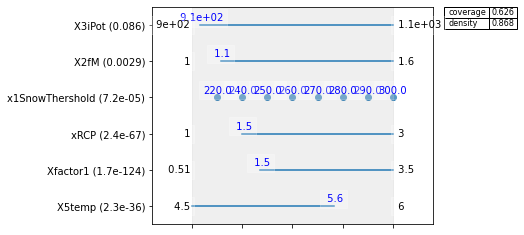

In [42]:
# Saeed : explore the inspect effect
box1.inspect(18)
box1.inspect(18, style='graph')
plt.show()

x1SnowThershold [290.0, 260.0, 300.0, 270.0, 240.0, 280.0, 250.0, 220.0, 200.0]


C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\ema_workbench\analysis\scenario_discovery_util.py:404: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(labels)


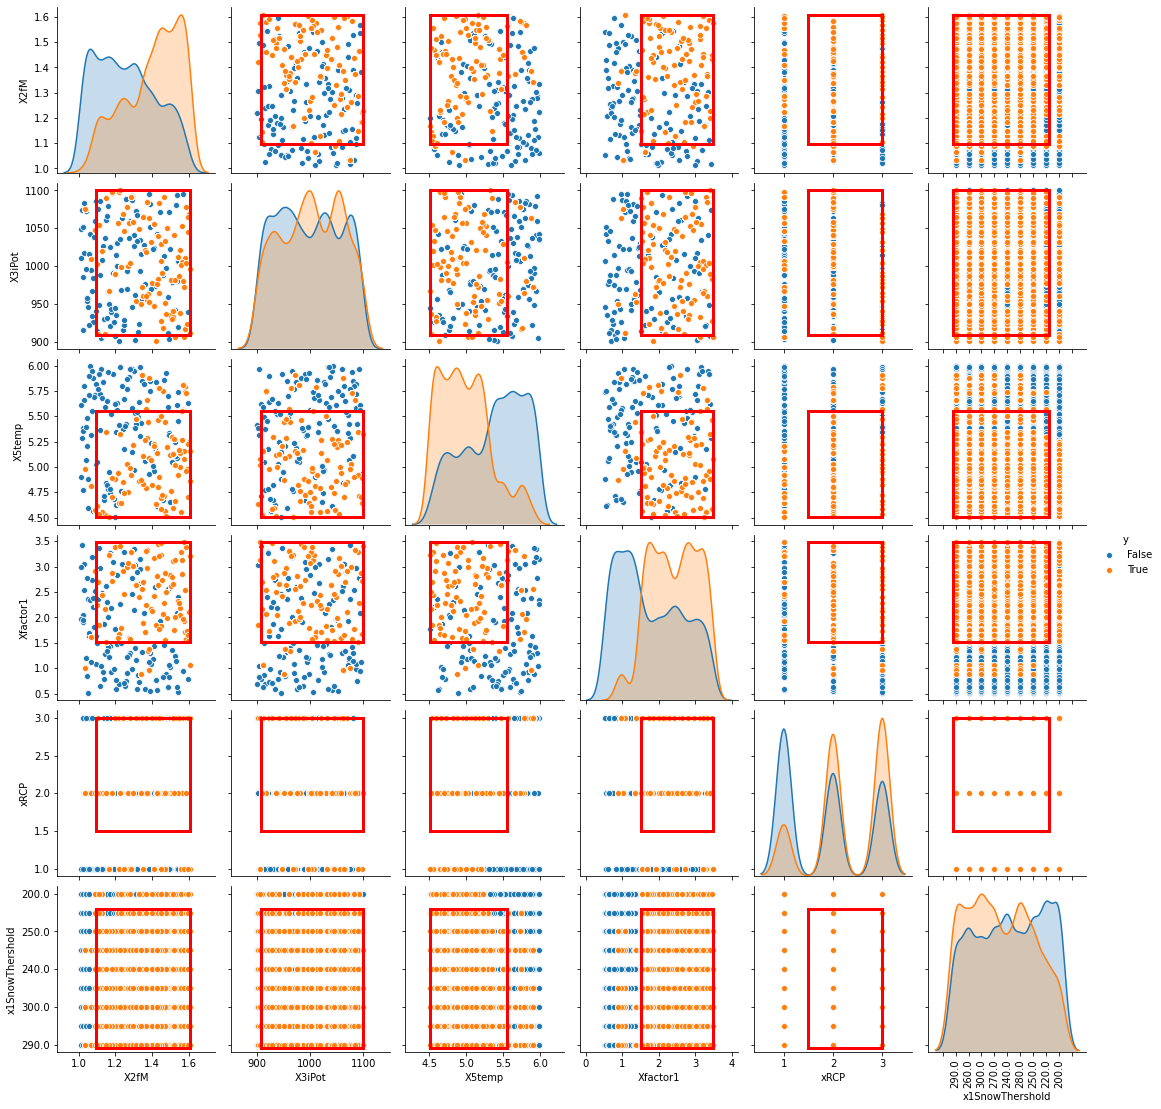

In [43]:
# fig, axs = plt.subplots()
axs1 = box1.show_pairs_scatter(18)
plt.show()
axs1.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays_70.svg'), format='svg', dpi=600)
axs1.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays_70.tiff'), format='tiff', dpi=300)
axs1.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays_2_70.tiff'), format='tiff', dpi=150)

In [44]:
box2 = prim_alg.find_box()

[MainProcess/INFO] 8120 points remaining, containing 2225 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X2fM
[MainProcess/DEBUG] pasting X5temp
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting Xfactor1
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.05722222222222222, coverage: 0.16586151368760063, density: 1.0 restricted_dimensions: 6


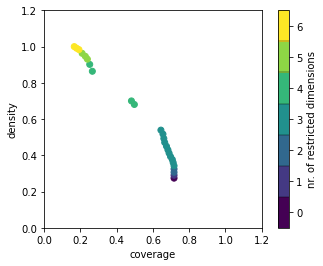

In [45]:
#import mpld3
box2.show_tradeoff()
plt.show()
#mpld3.display()
#fig.savefig(os.path.join(rootVisualization, 'box2.svg'), format='svg', dpi=600)

coverage    0.674718
density     0.450054
id                10
mass        0.517222
mean        0.450054
res_dim            3
Name: 10, dtype: object

            box 10                                          
               min       max                       qp values
X5temp    4.506713  5.792770  [-1.0, 2.8024502521394364e-16]
Xfactor1  1.039286  3.484645   [2.786655488364878e-37, -1.0]
X2fM      1.088320  1.609451  [3.5856288501892377e-19, -1.0]



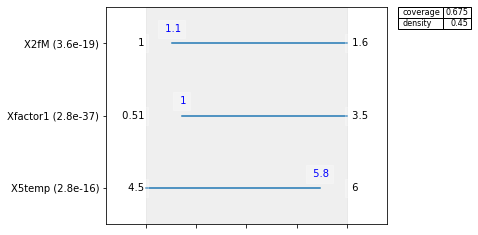

In [46]:
# Saeed : explore the inspect effect
box2.inspect(10)
box2.inspect(10, style='graph')
plt.show()

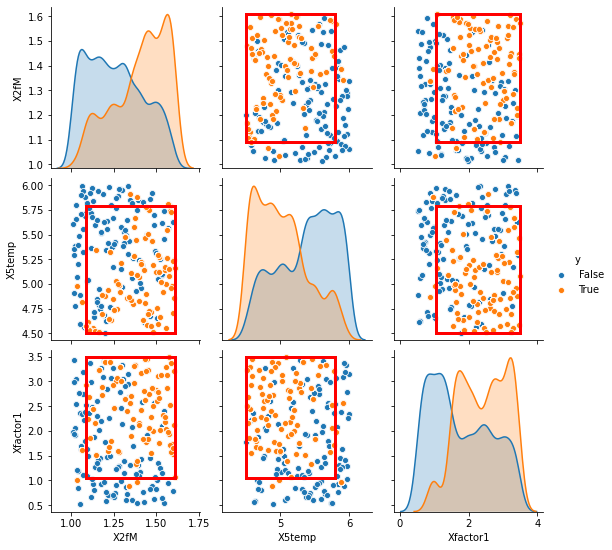

In [47]:
# fig, axs = plt.subplots()
axs2 = box2.show_pairs_scatter(10)
plt.show()
axs2.savefig(os.path.join(rootVisualization, 'multi_graphs_gooddays_2_.svg'), format='svg', dpi=300)

### Artifical snow analysis

In [48]:
x = experiments
y = outcomes['S_Ave_ArtSnow'] < 160
prim_alg = prim.Prim(x, y, threshold=0.8)
box3 = prim_alg.find_box()

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 9000 points remaining, containing 7110 cases of interest
[MainProcess/DEBUG] peeling completed
[MainProcess/DEBUG] pasting X3iPot
[MainProcess/DEBUG] pasting X6tempArt
[MainProcess/DEBUG] pasting xClimateModel
[MainProcess/DEBUG] pasting xRCP
[MainProcess/DEBUG] pasting completed
[MainProcess/INFO] mean: 1.0, mass: 0.215, coverage: 0.2721518987341772, density: 1.0 restricted_dimensions: 4


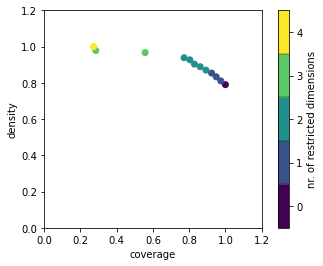

In [49]:
box3.show_tradeoff()
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'box_Artificial.svg'), format='svg', dpi=600)

coverage     0.28481
density     0.978261
id                10
mass            0.23
mean        0.978261
res_dim            3
Name: 10, dtype: object

                 box 10                                         
                    min       max                      qp values
X6tempArt     -1.996942 -1.317835   [-1.0, 0.005603533374865646]
xRCP           2.500000  3.000000  [5.804071200248038e-18, -1.0]
xClimateModel  0.053340  0.997937     [0.6505069622670991, -1.0]



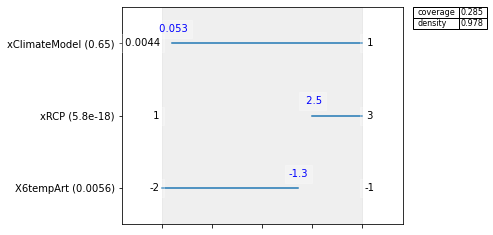

In [50]:
# Saeed : explore the inspect effect
box3.inspect(10)
box3.inspect(10, style='graph')
plt.show()

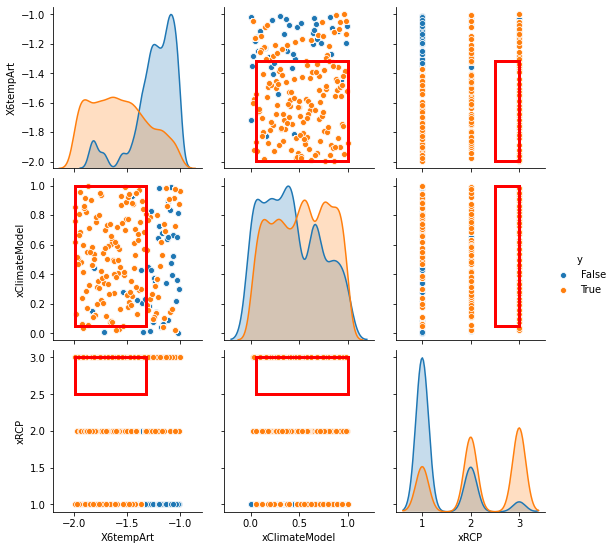

In [51]:
#fig, axs = plt.subplots()
axs4 = box3.show_pairs_scatter(10)
plt.show()
axs4.savefig(os.path.join(rootVisualization, 'multi_graphs_Artificial_40.svg'), format='tiff', dpi=300)

### Likelihood of Survival analysis

In [ ]:
x = experiments
y = outcomes['S_Ave_Likelihood'] < 1
prim_alg = prim.Prim(x, y, threshold=0.7)
box4 = prim_alg.find_box()

In [ ]:
box4.show_tradeoff()
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'box_liklihood.svg'), format='svg', dpi=600)

In [ ]:
# Saeed : explore the inspect effect
box4.inspect(20)
box4.inspect(20, style='graph')
plt.show()

In [ ]:
#fig, axs = plt.subplots()
axs3 = box4.show_pairs_scatter(15)
plt.show()
axs3.savefig(os.path.join(rootVisualization, 'multi_graphs_likehood.svg'), format='svg', dpi=600)

### Tipping points analysis

In [ ]:
x = experiments
y = outcomes['tipping_points'] < 10
prim_alg = prim.Prim(x, y, threshold=0.8)
box5 = prim_alg.find_box()

In [ ]:
box5.show_tradeoff()
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'box_Artificial.svg'), format='svg', dpi=600)

In [ ]:
# Saeed : explore the inspect effect
box5.inspect(20)
box5.inspect(20, style='graph')
plt.show()

In [ ]:
#fig, axs = plt.subplots()
axs5 = box5.show_pairs_scatter(20)
plt.show()

axs5.savefig(os.path.join(rootVisualization, 'multigraphs_tippingpoints.svg'), format='svg', dpi=300)

### Visualization with ema-workbench - part3

In [52]:
experiments2 = experiments
experiments2 = experiments2.pop('policy')

In [53]:
new_dict_experiments = {key:val for key, val in experiments2.items() if key != 'policy'} 

In [54]:
sns.set(font_scale=1.5)

ax6 = sns.heatmap(fs, cmap='viridis', annot=True,
                  vmin=0, linewidths=0.14,linecolor="grey",
                  cbar_kws={'label': 'features ranks','shrink': 0.1})

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] model dropped from analysis because only a single category


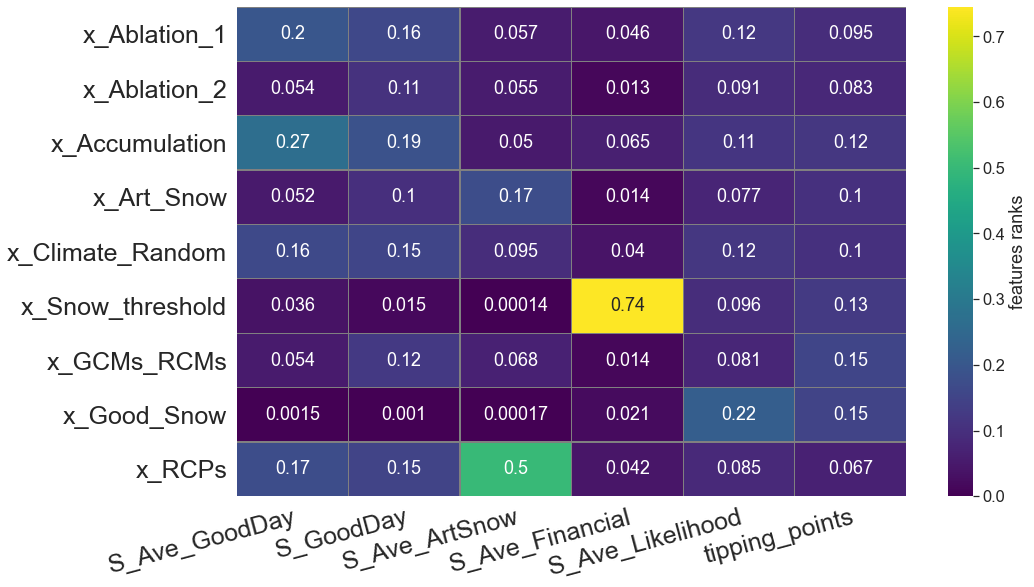

In [55]:
from ema_workbench.analysis import feature_scoring

fig6, ax6 = plt.subplots(figsize=(15,9))

x = experiments
#x = new_dict_experiments
#Y = outcomes
Y = new_dict
fs = feature_scoring.get_feature_scores_all(x, Y)
ax6 = sns.heatmap(fs, cmap='viridis', annot=True,
                  vmin=0, linewidths=0.28,linecolor="grey",
                  cbar_kws={'label': 'features ranks'})

# Rotate the tick labels and set their alignment.
plt.setp(ax6.get_xticklabels(), rotation=15, size = 25, ha="right",
         rotation_mode="anchor")

ylabels = ['x_Ablation_1', 'x_Ablation_2', 'x_Accumulation', 'x_Art_Snow', 'x_Climate_Random', 'x_Snow_threshold', 'x_GCMs_RCMs', 'x_Good_Snow', 'x_RCPs']
ax6.set_yticklabels(ylabels)
plt.setp(ax6.get_yticklabels(), rotation=0, size = 25, ha="right", rotation_mode="anchor")

#ax6.legend(size=13)

plt.show()

fig6.savefig(os.path.join(rootVisualization, 'matrix_importance.svg'), format='svg', dpi=300)
fig6.savefig(os.path.join(rootVisualization, 'matrix_importance.tiff'), format='tiff', dpi=150)
fig6.savefig(os.path.join(rootVisualization, 'matrix_importance.jpg'), format='jpg', dpi=150)

S_Ave_GoodDay: Seasonal average (1981-2100) of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)

GCM_RCM: The Climate model which has been used (Should not be presented in the outcomes)

Ave_GoodDay: Seasonal (1981-2100) number of days with Good Snow Conditions for Skiing  (snow depth > 200 - 300 mm)

S_Ave_ArtSnow: Seasonal average (1981-2100) of number of days with the possibility of Artificial Snow Making (ave TEMP < -2 to -1)

S_Ave_Financial: Relative seasonal average (1981-2100) of Financial balance of Ski resort

S_Ave_Likelihood: Seasonal average (1981-2100) Likelihood of survival of a Ski resort from tipping points

tipping_points: Number of tipping points (1981-2100)

[MainProcess/INFO] model dropped from analysis because only a single category


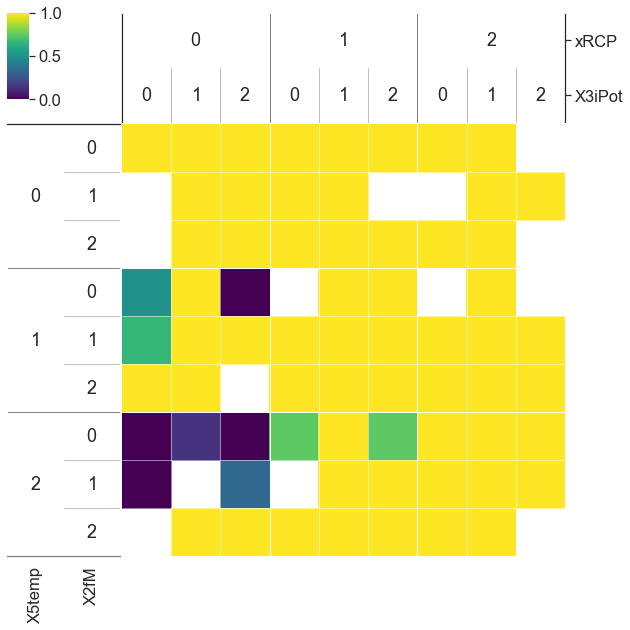

In [56]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['S_Ave_GoodDay'] < 180
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'matrix_rel_gooddays.svg'), format='svg', dpi=600)

[MainProcess/INFO] model dropped from analysis because only a single category
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\colors.py:587: RuntimeWarning: invalid value encountered in greater
  xa[xa > self.N - 1] = self._i_over
C:\Users\saeed\AppData\Local\Programs\Python\Python37\lib\site-packages\matplotlib\colors.py:588: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = self._i_under


IndexError: arrays used as indices must be of integer (or boolean) type

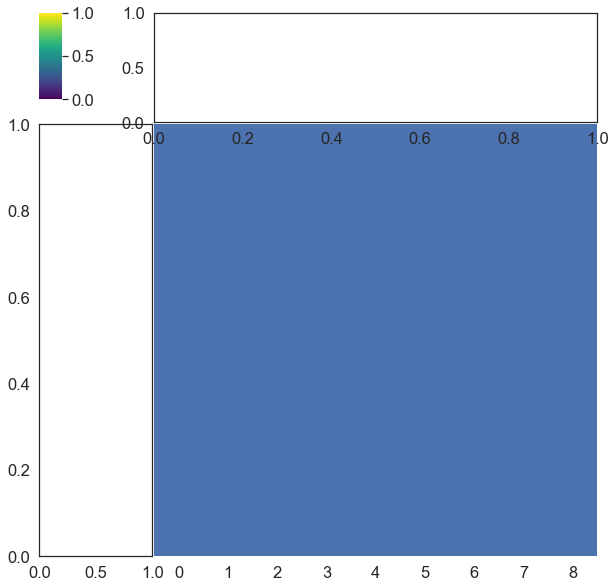

In [57]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['S_Ave_ArtSnow'] < 350
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Artificial.svg'), format='svg', dpi=300)

In [ ]:
from ema_workbench.analysis import dimensional_stacking

x = experiments
y = outcomes['S_Ave_Likelihood'] < 1
dimensional_stacking.create_pivot_plot(x,y, 2, nbins=3)
plt.show()
#fig.savefig(os.path.join(rootVisualization, 'matrix_rel_Liklehood.svg'), format='svg', dpi=600)

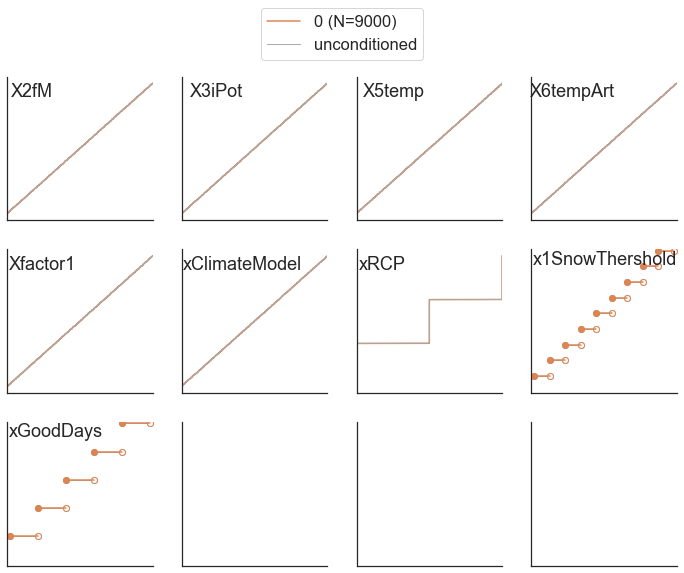

In [58]:
from ema_workbench.analysis import regional_sa
from numpy.lib import recfunctions as rf

sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['S_Ave_GoodDay'] < 60
fig10 = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig10.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_gooddays.svg'), format='svg', dpi=600)

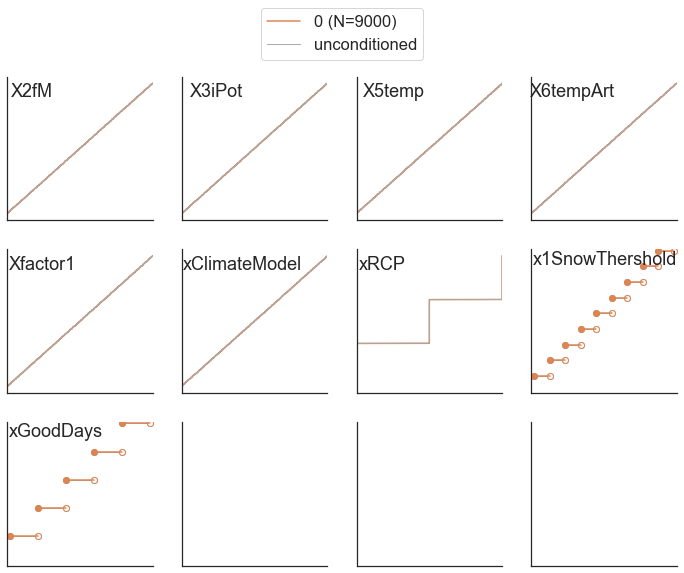

In [59]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['S_Ave_ArtSnow'] < 50
fig12 = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig12.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

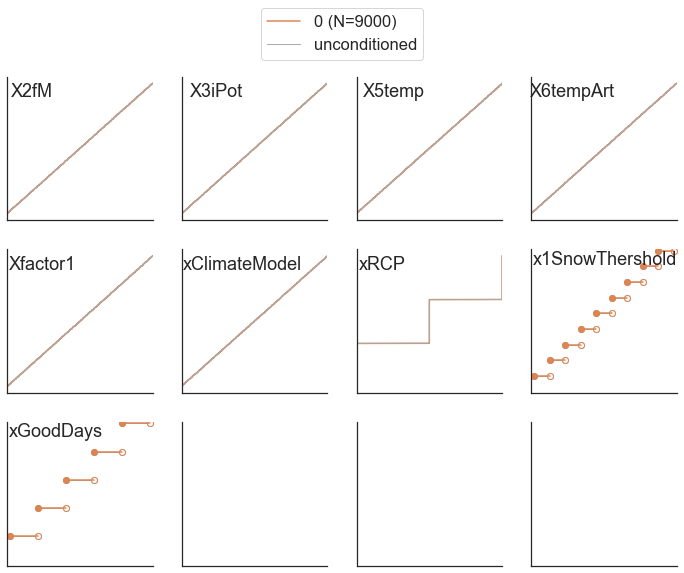

In [60]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['S_Ave_Likelihood'] < 0.5
fig11 = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig11.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_Artificial.svg'), format='svg', dpi=600)

ZeroDivisionError: division by zero

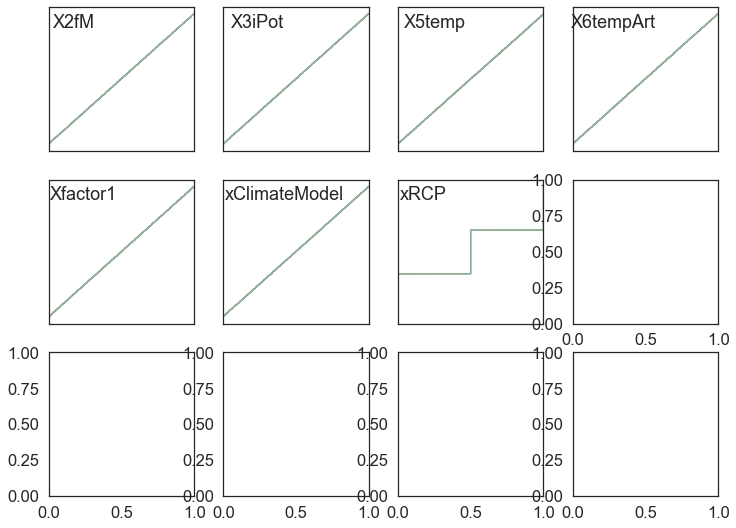

In [61]:
sns.set_style('white')

# model is the same across experiments
x = experiments.copy()
x = x.drop('model', axis=1)
y = outcomes['tipping_points'] < 15
fig11_2 = regional_sa.plot_cdfs(x,y)
sns.despine()
plt.show()
fig11_2.savefig(os.path.join(rootVisualization, 'matrix_sensitivity_tipping_points.svg'), format='svg', dpi=600)

### Scatter Plots (Inputs vs Outputs)

In [ ]:
#fig, (ax1, ax2) = plt.subplots(1,2)
fig13, axs = plt.subplots(2, 2, figsize=(10,10))
#axs[0,0].scatter(xGoodDays, y, s = 200, c='b' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Good Days Condition')

#axs[0,1].scatter(x1SnowThershold, y, s = 200, c='orange' , marker='o', alpha=0.7, cmap='viridis', 
 #          edgecolors='none', label='Snow Threshold Condition')

axs[0,0].scatter(x5, YY, s = 50, c='r' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[0,1].scatter(x6, YY, s = 50, c='g' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')

axs[1,0].scatter(x2, YY, s = 50, c='c' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature melt')

axs[1,1].scatter(x3, YY, s = 50, c='m' , marker='^', alpha=0.7, cmap='viridis', 
           edgecolors='none', label='Temperature artificial snow')


# produce a legend with the unique colors from the scatter
#axs[0,0].set_xlabel("Good Days Condition")
#axs[0,1].set_xlabel("Snow Threshold Condition")
axs[0,0].set_xlabel("Temperature Threshold re-freezing", size = 12)
axs[0,1].set_xlabel("Temperature Threshold artificial snow", size = 12)
axs[1,0].set_xlabel("snow process parmater FM",size = 12)
axs[1,1].set_xlabel("snow process parameter iPot", size = 12)


axs[0,0].set_ylabel("Annual Average of Good Snow Condition (days)", size = 12)
#axs[0,1].set_ylabel("Frequency of Tipping points")
axs[1,0].set_ylabel("Annual Average of Good Snow Condition (days)", size = 12)
#axs[1,1].set_ylabel("Frequency of Tipping points")
#axs[2,0].set_ylabel("Annual Average of Good Snow Condition (days)")
#axs[2,1].set_ylabel("Frequency of Tipping points")

#axs[0,0].set_title('Sensitivity of TDwGSC to Policy-1 (less that 100 days)')
#axs[0,1].set_title('Sensitivity of TDwGSC to Policy-2 (300 mm)')
axs[0,0].set_title('Sensitivity of TDwGSC to Threshold of fuzzy melting and re-freezing', size = 12)
axs[0,1].set_title('Sensitivity of TDwGSC to Threshold of Snow Making', size = 12)
axs[1,0].set_title('Sensitivity of TDwGSC to FM paramater in Ablation', size = 12)
axs[1,1].set_title('Sensitivity of TDwGSC to iPot paramater in Ablation', size = 12)


#axs[0,0].text(0, 130, r'A', fontsize=15)
#axs[0,1].text(-1.9, 130, r'B', fontsize=15)
#axs[1,0].text(1.04, 130, r'C', fontsize=15)
#axs[1,1].text(920, 130, r'D', fontsize=15)

fig13.savefig(os.path.join(rootVisualization, 'SA4_All.svg'), format='svg', dpi=300)

plt.show()

## 3D Scatter Plot

In [ ]:
from mpl_toolkits.mplot3d import Axes3D 
fig14 = plt.figure(figsize=(15,10))
ax = fig14.add_subplot(111, projection='3d')

ax.scatter(xGoodDays, x1SnowThershold, YY, s = 40, c='r', marker='o')

ax.set_xlabel('Good Days Condition Policy-1(100-day)', size = 12)
ax.set_ylabel('Natural Snow Cover Condition Policy-2(300-mm)', size = 12)
ax.set_zlabel('Annual Number of days with good snow condition', size = 12)


#ax.scatter(100, 300, 40, color='green')


#x = np.linspace(75,100,5)
#y = np.linspace(220,300,16)
#X,Y = np.meshgrid(x,y)
#Z= X + Y -X - Y + 40 
#surf = ax.plot_surface(X, Y, Z, alpha = 0.2)
ax.view_init(20, -45)

fig14.savefig(os.path.join(rootVisualization, 'SA_Policy_All.svg'), format='svg', dpi=300)
plt.show()

In [ ]:
df_final_ema.head()

# Taking the values
x2 = df_final_ema['X2fM'].values
x3 = df_final_ema['X3iPot'].values
x5 = df_final_ema['X5temp'].values
x6 = df_final_ema['X6tempArt'].values
xRCP = df_final_ema['xRCP'].values
xClimateModel = df_final_ema['xClimateModel'].values
x1SnowThershold = df_final_ema['x1SnowThershold'].values
xGoodDays = df_final_ema['xGoodDays'].values

YY = df_final_ema['Yout'].values
y1 = df_final_ema['Yout1'].values
y3 = df_final_ema['Yout3_95'].values
y4 = df_final_ema['Yout4'].values
y5 = df_final_ema['Yout5'].values
y6 = df_final_ema['Yout6'].values
y7 = df_final_ema['Yout7'].values

In [62]:
df_final_ema.tail()

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  \
8995  1.262245   993.366918  5.867306  -1.471983  1.228446       0.281045   
8996  1.059067  1015.746444  5.705412  -1.702560  1.690387       0.118270   
8997  1.530472  1080.582947  5.103828  -1.366490  1.147057       0.428651   
8998  1.426505   976.435279  5.136844  -1.860367  2.814478       0.711950   
8999  1.227351  1099.913215  5.328859  -1.414563  3.401893       0.317129   

      xRCP  x1SnowThershold  xGoodDays  scenario  policy     model  \
8995   3.0            280.0      100.0       195      44  UZHModel   
8996   2.0            280.0      100.0       196      44  UZHModel   
8997   3.0            280.0      100.0       197      44  UZHModel   
8998   2.0            280.0      100.0       198      44  UZHModel   
8999   2.0            280.0      100.0       199      44  UZHModel   

            Yout  Yout1     Yout3_0     Yout3_1  Yout3_2  Yout3_3  Yout3_4  \
8995  173.464362     45  153.664000  181.000000    182.0    181.0    181.0   
8996  167.773924     14  181.000000  181.000000    182.0    181.0    181.0   
8997  162.153936     49  160.827929  163.084036    182.0    181.0    181.0   
8998  155.388858     29  172.806393  181.000000    182.0    181.0    181.0   
8999  158.623632     19  166.968393  181.000000    182.0    181.0    181.0   

      Yout3_5  Yout3_6  Yout3_7  Yout3_8  Yout3_9  Yout3_10  Yout3_11  \
8995    181.0    182.0    181.0    181.0    181.0     182.0     181.0   
8996    181.0    182.0    181.0    181.0    181.0     182.0     181.0   
8997    181.0    182.0    181.0    181.0    181.0     182.0     181.0   
8998    181.0    182.0    181.0    181.0    181.0     182.0     181.0   
8999    181.0    182.0    181.0    181.0    181.0     182.0     181.0   

      Yout3_12  Yout3_13  Yout3_14  Yout3_15  Yout3_16  Yout3_17  Yout3_18  \
8995     181.0     181.0     182.0     181.0     181.0     181.0     182.0   
8996     181.0     181.0     182.0     181.0     181.0     181.0     182.0   
8997     181.0     181.0     182.0     181.0     181.0     181.0     182.0   
8998     181.0     181.0     182.0     181.0     181.0     181.0     182.0   
8999     181.0     181.0     182.0     181.0     181.0     181.0     182.0   

      Yout3_19  ...    Yout3_88    Yout3_89    Yout3_90    Yout3_91  \
8995     181.0  ...  170.310036  151.624357  176.757321  172.102964   
8996     181.0  ...  127.724750  149.270143   81.686321  140.596000   
8997     181.0  ...  142.778000  164.200429   60.695036  151.266143   
8998     181.0  ...  130.874536  106.254786   95.332286  142.629464   
8999     181.0  ...  145.900393  163.412607  110.547464  138.245286   

        Yout3_92    Yout3_93    Yout3_94    Yout3_95    Yout3_96    Yout3_97  \
8995  165.854036  175.820929  173.044107  179.124679  171.654214  171.501607   
8996  142.135893  140.357071  144.341929  170.975536  158.234857  147.647786   
8997  143.367179  169.586571  151.350036  151.663964  170.608571  181.000000   
8998  134.016214  160.043071  138.038500  110.230571  154.324214   92.184893   
8999  130.468393  137.396714  131.685429  131.076464  134.080786  160.533964   

        Yout3_98    Yout3_99   Yout3_100   Yout3_101   Yout3_102   Yout3_103  \
8995  124.756321  164.760357  162.124179  171.993321  153.466714  160.474179   
8996  135.386429  158.382786  136.513893  157.602714  113.763964  145.512964   
8997  123.590000  156.150000  134.218107  172.174036  136.410964  160.346714   
8998  173.628786  144.901786  138.459143  144.668321  120.047929  140.663036   
8999  130.128179  146.776250  134.863929  131.945429  124.072429  103.921214   

       Yout3_104   Yout3_105   Yout3_106   Yout3_107   Yout3_108   Yout3_109  \
8995  143.982036  113.323464  139.555714  125.396750  154.383036  143.287000   
8996  115.252250  163.522429  141.946643  150.141679  128.252714  122.403571   
8997  149.438964  129.803857  105.903036  132.673893  167.171143  145.900321   
8998  127.829929  116.461286  127.226786

In [63]:
filt_S = (df_final_ema['scenario'] == 1)
x_policy = df_final_ema.loc[filt_S, 'x1SnowThershold']
y_policy = df_final_ema.loc[filt_S, 'xGoodDays']
scenarios = df_final_ema.loc[filt_S, 'policy']

In [64]:
x_policy[1]

200.0

In [65]:
df_final_ema[filt_S]

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  \
1     1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
201   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
401   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
601   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
801   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   

      xRCP  x1SnowThershold  xGoodDays  scenario  policy     model  \
1      2.0            200.0       70.0         1       0  UZHModel   
201    2.0            240.0       90.0         1       1  UZHModel   
401    2.0            270.0       80.0         1       2  UZHModel   
601    2.0            220.0      100.0         1       3  UZHModel   
801    2.0            260.0       60.0         1       4  UZHModel   
1001   2.0            280.0       70.0         

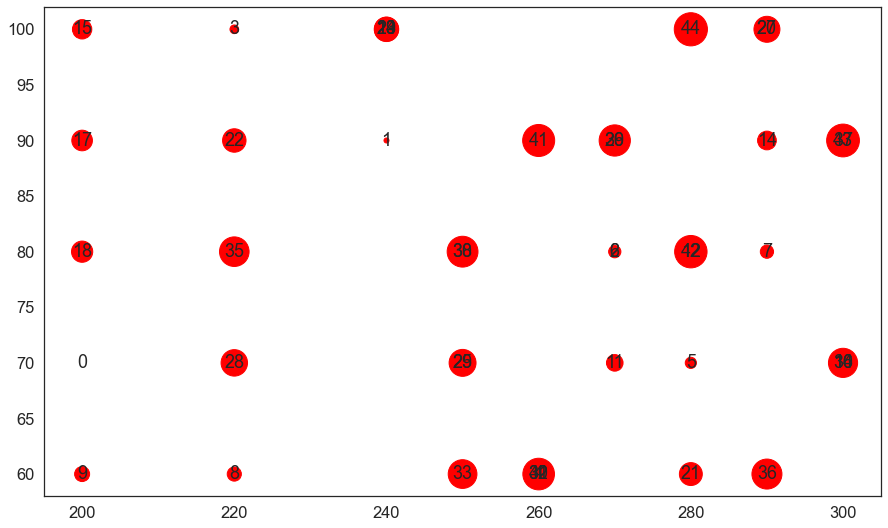

In [66]:
#x_policy = x1SnowThershold 
#y_policy = xGoodDays 

#ranking = np.random.normal(size=9000)
#scenarios = df_final_ema['policy'].values


fig, ax_n = plt.subplots(figsize=(15,9))


x_policy = df_final_ema.loc[filt_S, 'x1SnowThershold']
y_policy = df_final_ema.loc[filt_S, 'xGoodDays']
scenarios = df_final_ema.loc[filt_S, 'policy']
#colors = np.random.rand(N)


# Because the price is much too small when being provided as size for ``s``,
# we normalize it to some useful point sizes, s=0.3*(price*3)**2
ax_n.scatter(x_policy, y_policy, s = scenarios * 25, c = 'red' , cmap="Spectral")

for x_pos, y_pos, label in zip(x_policy, y_policy, scenarios):
    ax_n.annotate(label,
                xy=(x_pos, y_pos),
                xytext=(0, 0),
                textcoords='offset points',
                ha='center',
                va='center')

plt.show()

### Defining the Q0.9 and Q0.1 databases

In [67]:
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)

#2020/08/23
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)

print(q10_years_Art[0])
print(q25_years_Art[0])
print(q50_years_Art[0])
print(q75_years_Art[0])
print(q90_years_Art[0])
print(q50_years_Art.shape)

print(q10_years_Like[0])
print(q25_years_Like[0])
print(q50_years_Like[0])
print(q75_years_Like[0])
print(q90_years_Like[0])
print(q50_years_Like.shape)

[136.65629167]
[151.90717651]
[168.37225]
[181.]
[181.]
(118, 1)
[5.47]
[6.19]
[7.075]
[7.24]
[8.89]
(118, 1)
[161.411]
[166.5625]
[170.035]
[173.735]
[176.692]
(118, 1)
[100.]
[100.]
[100.]
[100.]
[100.]
(118, 1)


In [68]:
print("#########")
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(len(matrix_GoodDays26) + len(matrix_GoodDays45) + len(matrix_GoodDays85))
print("#########")
print(matrix_fin26.shape)
print(matrix_fin45.shape)
print(matrix_fin85.shape)
print(len(matrix_fin26) + len(matrix_fin45) + len(matrix_fin85))
print("#########")
print(matrix_Art26.shape)
print(matrix_Art45.shape)
print(matrix_Art85.shape)
print(len(matrix_Art26) + len(matrix_Art45) + len(matrix_Art85))
print("#########")
print(matrix_Like26.shape)
print(matrix_Like45.shape)
print(matrix_Like85.shape)
print(len(matrix_Like26) + len(matrix_Like45) + len(matrix_Like85))

#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000
#########
(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
9000


In [69]:
print(matrix_GoodDays[:, :, 1:2].shape)
print(matrix_GoodDays[3, 0, 1:2])
print(matrix_GoodDays[4].shape)

(9000, 119, 1)
['isOverSnow_sc_26_7']
(119, 2)


## Analysis for different RCP2.6, RCP4.5, and RCP8.5
### Calculate quantiles for each RCP scenarios

In [70]:
q10_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_26 = np.quantile(matrix_GoodDays26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_45 = np.quantile(matrix_GoodDays45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_85 = np.quantile(matrix_GoodDays85[:, 1:, 1:2].astype(float), 0.9, axis=0)



#2020/08/13
q10_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_26 = np.quantile(matrix_fin26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_45 = np.quantile(matrix_fin45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_fin_85 = np.quantile(matrix_fin85[:, 1:, 1:2].astype(float), 0.9, axis=0)


q10_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_26 = np.quantile(matrix_Art26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_45 = np.quantile(matrix_Art45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Art_85 = np.quantile(matrix_Art85[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_26 = np.quantile(matrix_Like26[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_45 = np.quantile(matrix_Like45[:, 1:, 1:2].astype(float), 0.9, axis=0)

q10_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.1, axis=0)
q25_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.25, axis=0)
q50_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.5, axis=0)
q75_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.75, axis=0)
q90_years_Like_85 = np.quantile(matrix_Like85[:, 1:, 1:2].astype(float), 0.9, axis=0)


#### Make dataframes from quantiles

In [71]:
dfq50_26 = pd.DataFrame(q50_years_26)
dfq50_26.columns = ['median26']
dfq50_45 = pd.DataFrame(q50_years_45)
dfq50_45.columns = ['median45']
dfq50_85 = pd.DataFrame(q50_years_85)
dfq50_85.columns = ['median85']

dfq90_26 = pd.DataFrame(q90_years_26)
dfq90_26.columns = ['Q90_26']
dfq90_45 = pd.DataFrame(q90_years_45)
dfq90_45.columns = ['Q90_45']
dfq90_85 = pd.DataFrame(q90_years_85)
dfq90_85.columns = ['Q90_85']

dfq10_26 = pd.DataFrame(q10_years_26)
dfq10_26.columns = ['Q10_26']
dfq10_45 = pd.DataFrame(q10_years_45)
dfq10_45.columns = ['Q10_45']
dfq10_85 = pd.DataFrame(q10_years_85)
dfq10_85.columns = ['Q10_85']

### 2020/08/13
dfq50_fin_26 = pd.DataFrame(q50_years_fin_26)
dfq50_fin_26.columns = ['median26']
dfq50_fin_45 = pd.DataFrame(q50_years_fin_45)
dfq50_fin_45.columns = ['median45']
dfq50_fin_85 = pd.DataFrame(q50_years_fin_85)
dfq50_fin_85.columns = ['median85']

dfq90_fin_26 = pd.DataFrame(q90_years_fin_26)
dfq90_fin_26.columns = ['median26']
dfq90_fin_45 = pd.DataFrame(q90_years_fin_45)
dfq90_fin_45.columns = ['median45']
dfq90_fin_85 = pd.DataFrame(q90_years_fin_85)
dfq90_fin_85.columns = ['median85']

dfq10_fin_26 = pd.DataFrame(q10_years_fin_26)
dfq10_fin_26.columns = ['median26']
dfq10_fin_45 = pd.DataFrame(q10_years_fin_45)
dfq10_fin_45.columns = ['median45']
dfq10_fin_85 = pd.DataFrame(q10_years_fin_85)
dfq10_fin_85.columns = ['median85']

dfq50_Art_26 = pd.DataFrame(q50_years_Art_26)
dfq50_Art_26.columns = ['median26']
dfq50_Art_45 = pd.DataFrame(q50_years_Art_45)
dfq50_Art_45.columns = ['median45']
dfq50_Art_85 = pd.DataFrame(q50_years_Art_85)
dfq50_Art_85.columns = ['median85']

dfq90_Art_26 = pd.DataFrame(q90_years_Art_26)
dfq90_Art_26.columns = ['median26']
dfq90_Art_45 = pd.DataFrame(q90_years_Art_45)
dfq90_Art_45.columns = ['median45']
dfq90_Art_85 = pd.DataFrame(q90_years_Art_85)
dfq90_Art_85.columns = ['median85']

dfq10_Art_26 = pd.DataFrame(q10_years_Art_26)
dfq10_Art_26.columns = ['median26']
dfq10_Art_45 = pd.DataFrame(q10_years_Art_45)
dfq10_Art_45.columns = ['median45']
dfq10_Art_85 = pd.DataFrame(q10_years_Art_85)
dfq10_Art_85.columns = ['median85']

dfq50_Like_26 = pd.DataFrame(q50_years_Like_26)
dfq50_Like_26.columns = ['median26']
dfq50_Like_45 = pd.DataFrame(q50_years_Like_45)
dfq50_Like_45.columns = ['median45']
dfq50_Like_85 = pd.DataFrame(q50_years_Like_85)
dfq50_Like_85.columns = ['median85']

dfq90_Like_26 = pd.DataFrame(q90_years_Like_26)
dfq90_Like_26.columns = ['median26']
dfq90_Like_45 = pd.DataFrame(q90_years_Like_45)
dfq90_Like_45.columns = ['median45']
dfq90_Like_85 = pd.DataFrame(q90_years_Like_85)
dfq90_Like_85.columns = ['median85']

dfq10_Like_26 = pd.DataFrame(q10_years_Like_26)
dfq10_Like_26.columns = ['median26']
dfq10_Like_45 = pd.DataFrame(q10_years_Like_45)
dfq10_Like_45.columns = ['median45']
dfq10_Like_85 = pd.DataFrame(q10_years_Like_85)
dfq10_Like_85.columns = ['median85']

In [72]:
dfq50_26.head()

median26
0  170.3515
1  181.0000
2  182.0000
3  181.0000
4  181.0000

In [73]:
dfAllAverages = pd.concat((dfq50_26, dfq50_45, dfq50_85), axis=1)
dfAllAverages_Q90 = pd.concat((dfq90_26, dfq90_45, dfq90_85), axis=1)
dfAllAverages_Q10 = pd.concat((dfq10_26, dfq10_45, dfq10_85), axis=1)

dfAllAverages_fin = pd.concat((dfq50_fin_26, dfq50_fin_45, dfq50_fin_85), axis=1)
dfAllAverages_Q90_fin = pd.concat((dfq90_fin_26, dfq90_fin_45, dfq90_fin_85), axis=1)
dfAllAverages_Q10_fin = pd.concat((dfq10_fin_26, dfq10_fin_45, dfq10_fin_85), axis=1)

dfAllAverages_Art = pd.concat((dfq50_Art_26, dfq50_Art_45, dfq50_Art_85), axis=1)
dfAllAverages_Q90_Art = pd.concat((dfq90_Art_26, dfq90_Art_45, dfq90_Art_85), axis=1)
dfAllAverages_Q10_Art = pd.concat((dfq10_Art_26, dfq10_Art_45, dfq10_Art_85), axis=1)

dfAllAverages_Like = pd.concat((dfq50_Like_26, dfq50_Like_45, dfq50_Like_85), axis=1)
dfAllAverages_Q90_Like = pd.concat((dfq90_Like_26, dfq90_Like_45, dfq90_Like_85), axis=1)
dfAllAverages_Q10_Like = pd.concat((dfq10_Like_26, dfq10_Like_45, dfq10_Like_85), axis=1)

In [74]:
dfAllAverages.head()

median26    median45   median85
0  170.3515  170.500045  165.99769
1  181.0000  181.000000  181.00000
2  182.0000  182.000000  182.00000
3  181.0000  181.000000  181.00000
4  181.0000  181.000000  181.00000

In [75]:
print('*** All RCPs***')
print(q10_years[0])
print(q25_years[0])
print(q50_years[0])
print(q75_years[0])
print(q90_years[0])
print(q50_years.shape)
print('*** RCP2.6***')
print(q10_years_26[0])
print(q25_years_26[0])
print(q50_years_26[0])
print(q75_years_26[0])
print(q90_years_26[0])
print(q50_years_26.shape)
print('*** RCP4.5***')
print(q10_years_45[0])
print(q25_years_45[0])
print(q50_years_45[0])
print(q75_years_45[0])
print(q90_years_45[0])
print(q50_years_45.shape)
print('*** RCP8.5***')
print(q10_years_85[0])
print(q25_years_85[0])
print(q50_years_85[0])
print(q75_years_85[0])
print(q90_years_85[0])
print(q50_years_85.shape)

*** All RCPs***
[136.65629167]
[151.90717651]
[168.37225]
[181.]
[181.]
(118, 1)
*** RCP2.6***
[136.65804167]
[150.32222222]
[170.3515]
[181.]
[181.]
(118, 1)
*** RCP4.5***
[143.19514815]
[154.09146154]
[170.50004545]
[181.]
[181.]
(118, 1)
*** RCP8.5***
[132.42771429]
[151.3795]
[165.99768966]
[181.]
[181.]
(118, 1)


In [76]:
print('*** All RCPs***')
print(q10_years_fin[0])
print(q25_years_fin[0])
print(q50_years_fin[0])
print(q75_years_fin[0])
print(q90_years_fin[0])
print(q50_years_fin.shape)
print('*** RCP2.6***')
print(q10_years_fin_26[0])
print(q25_years_fin_26[0])
print(q50_years_fin_26[0])
print(q75_years_fin_26[0])
print(q90_years_fin_26[0])
print(q50_years_fin_26.shape)
print('*** RCP4.5***')
print(q10_years_fin_45[0])
print(q25_years_fin_45[0])
print(q50_years_fin_45[0])
print(q75_years_fin_45[0])
print(q90_years_fin_45[0])
print(q50_years_fin_45.shape)
print('*** RCP8.5***')
print(q10_years_fin_85[0])
print(q25_years_fin_85[0])
print(q50_years_fin_85[0])
print(q75_years_fin_85[0])
print(q90_years_fin_85[0])
print(q50_years_fin_85.shape)

*** All RCPs***
[5.47]
[6.19]
[7.075]
[7.24]
[8.89]
(118, 1)
*** RCP2.6***
[5.43]
[6.19]
[7.225]
[7.24]
[8.93]
(118, 1)
*** RCP4.5***
[5.71]
[6.23]
[7.16]
[7.24]
[9.03]
(118, 1)
*** RCP8.5***
[5.32]
[6.11]
[6.8]
[7.24]
[8.71]
(118, 1)


#### Set the parameters of making figure

In [77]:
p_Step = 20
alpha_Fade = 0.11

### RCP 2.6 Number of days with Good Snow Condition over the time

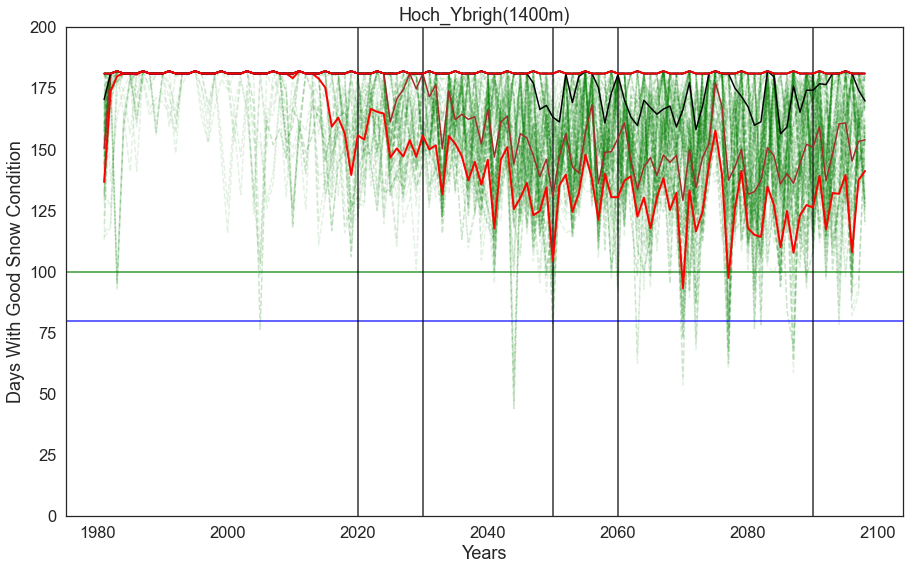

In [78]:
fig15, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays26), p_Step):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_26, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_26, color='red', linewidth = 2, alpha=1)

axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig15.savefig(os.path.join(rootVisualization, 'RCP26.svg'), format='svg', dpi=300)
plt.show()

### RCP 4.5 Number of days with Good Snow Condition over the time

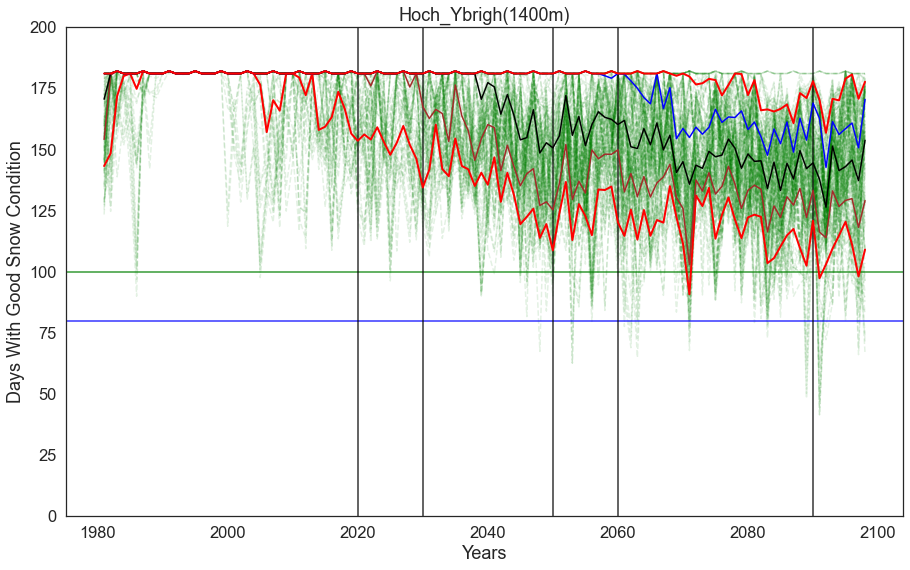

In [79]:
fig16, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays45), p_Step):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_45, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_45, color='red', linewidth = 2, alpha=1)

axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig16.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

### RCP 8.5 Number of days with Good Snow Condition over the time

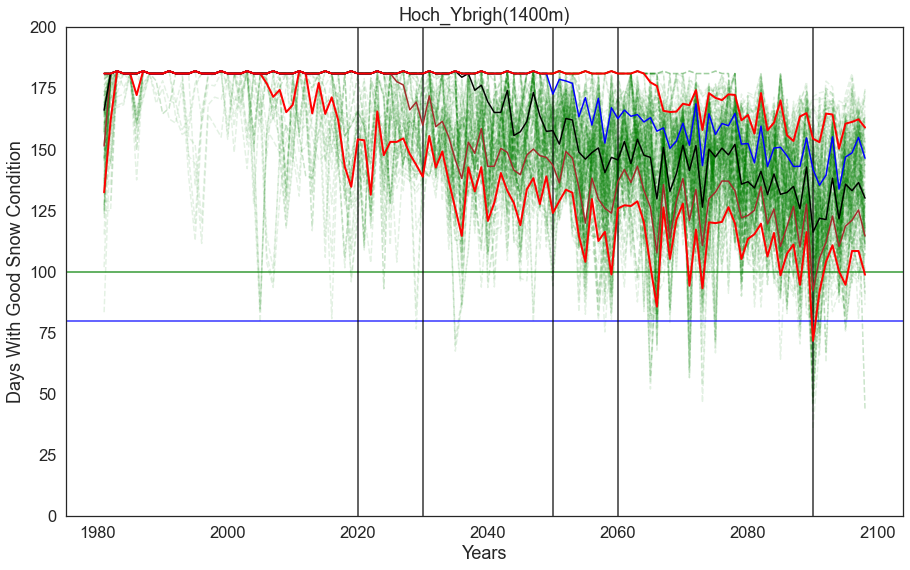

In [80]:
fig17, axs = plt.subplots(figsize=(15,9))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_GoodDays85), p_Step):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    plt.plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

axs.axhline(y=100, color='green', alpha=0.8)
axs.axhline(y=80, color='blue', alpha=0.8)

axs.axvline(x=2020, color='black', alpha=0.8)
axs.axvline(x=2030, color='black', alpha=0.8)
axs.axvline(x=2050, color='black', alpha=0.8)
axs.axvline(x=2060, color='black', alpha=0.8)
axs.axvline(x=2090, color='black', alpha=0.8)

plt.plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
plt.plot(x_axis, q25_years_85, color='brown',linewidth = 1.5, alpha=1)
plt.plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
plt.plot(x_axis, q90_years_85, color='red', linewidth = 2, alpha=1)

axs.set_ylim(bottom=0, top =200)
axs.set_title('Hoch_Ybrigh(1400m)')
axs.set_xlabel('Years')
axs.set_ylabel('Days With Good Snow Condition')

fig17.savefig(os.path.join(rootVisualization, 'RCP45.svg'), format='svg', dpi=300)

plt.show()

In [81]:
title_Figs = 'case5_Les Diablerets, elv_b 2500m, RCP2.6'

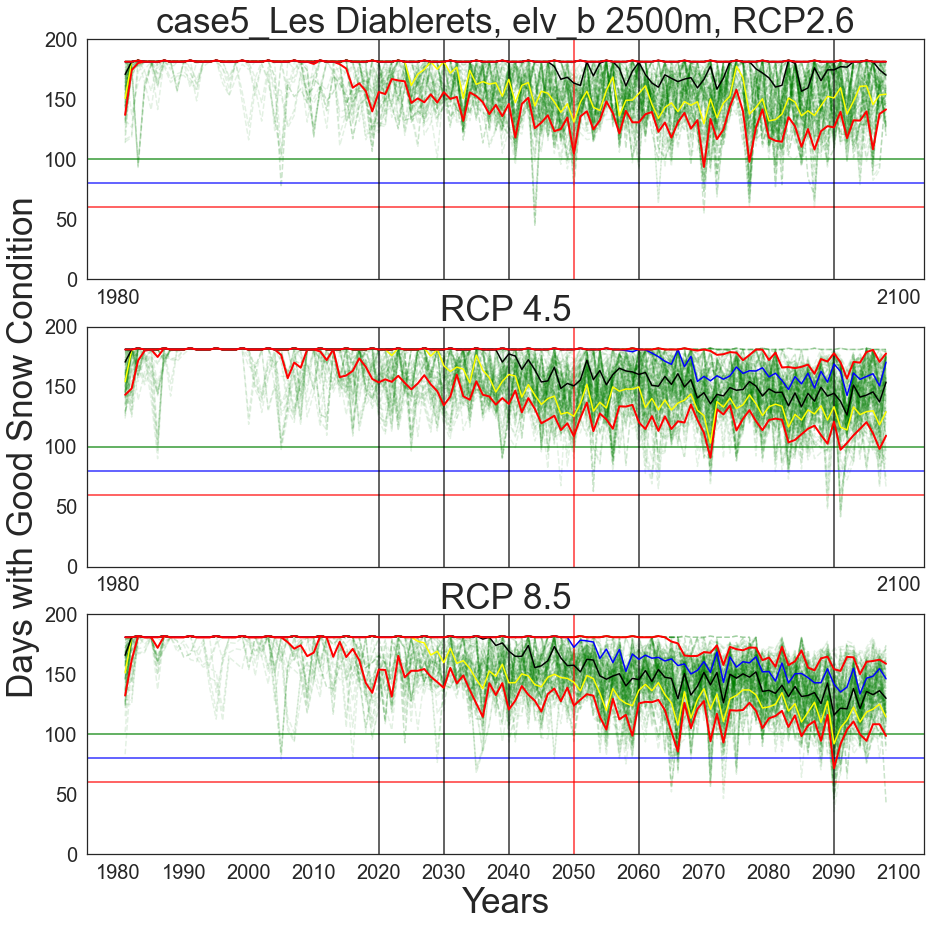

In [82]:
fig18, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_GoodDays26), p_Step):
    a = matrix_GoodDays26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)

for i in range(0, len(matrix_GoodDays45), p_Step):
    a = matrix_GoodDays45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_GoodDays85), p_Step):
    a = matrix_GoodDays85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='green', linestyle = '--', alpha=alpha_Fade)    

    
axs[0].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[1].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[2].xaxis.set_ticks(np.arange(1980, 2101, 10))

axs[0].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='x', labelsize=20)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)

axs[0].axhline(y=100, color='green', alpha=0.8)
axs[0].axhline(y=80, color='blue', alpha=0.8)
axs[0].axhline(y=60, color='red', alpha=0.8)

axs[1].axhline(y=100, color='green', alpha=0.8)
axs[1].axhline(y=80, color='blue', alpha=0.8)
axs[1].axhline(y=60, color='red', alpha=0.8)

axs[2].axhline(y=100, color='green', alpha=0.8)
axs[2].axhline(y=80, color='blue', alpha=0.8)
axs[2].axhline(y=60, color='red', alpha=0.8)


axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2040, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='red', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2040, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='red', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2040, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='red', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)

axs[0].plot(x_axis, q10_years_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_26, color='yellow',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_26, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_45, color='yellow',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_45, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_85, color='yellow',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_85, color='red', linewidth = 2, alpha=1)

axs[0].set_ylim(bottom=0, top =200)
axs[0].set_title(title_Figs, fontsize=35)
#axs[0].set_xlabel('Years')
#axs[0].set_ylabel('Days With Good Snow Condition', fontsize=12)

axs[1].set_ylim(bottom=0, top =200)
#axs[1].set_title('case3_Hoch_Ybrigh(1400m) RCP 4.5', fontsize=25)
axs[1].set_title('RCP 4.5', fontsize=35)

#axs[1].set_xlabel('Years')
axs[1].set_ylabel('Days with Good Snow Condition', fontsize=35)

axs[2].set_ylim(bottom=0, top =200)
#axs[2].set_title('case3_Hoch_Ybrigh(1400m) RCP 8.5', fontsize=25)
axs[2].set_title('RCP 8.5', fontsize=35)

axs[2].set_xlabel('Years', fontsize=35)
#axs[2].set_ylabel('Days With Good Snow Condition', fontsize=12)

fig18.savefig(os.path.join(rootVisualization, 'RCP26_45_85_GoodDays.svg'), format='svg', dpi=300)
fig18.savefig(os.path.join(rootVisualization, 'RCP26_45_85_GoodDays.tiff'), format='tiff', dpi=150)

plt.show()

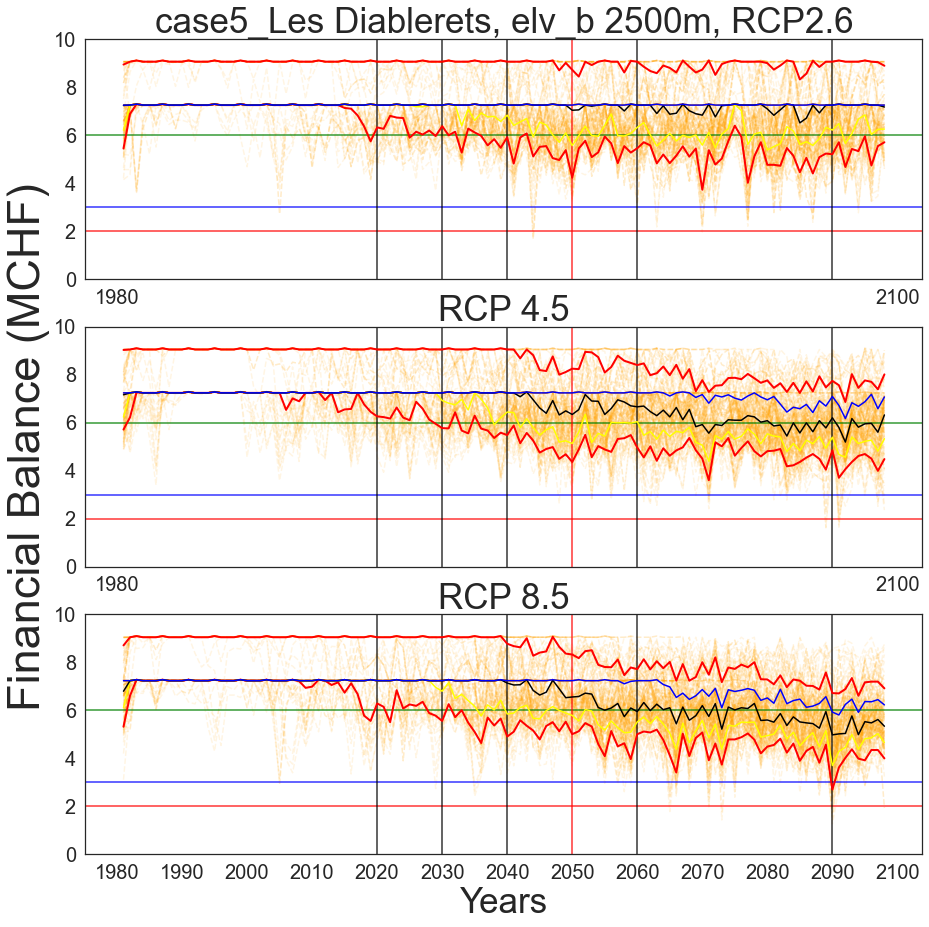

In [83]:
fig19, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)

for i in range(0, len(matrix_fin26), p_Step):
    a = matrix_fin26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_fin45), p_Step):
    a = matrix_fin45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_fin85), p_Step):
    a = matrix_fin85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='orange', linestyle = '--', alpha=alpha_Fade)    

axs[0].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[1].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[2].xaxis.set_ticks(np.arange(1980, 2101, 10))

axs[0].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='x', labelsize=20)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)

axs[0].axhline(y=6, color='green', alpha=0.8)
axs[0].axhline(y=3, color='blue', alpha=0.8)
axs[0].axhline(y=2, color='red', alpha=0.8)

axs[1].axhline(y=6, color='green', alpha=0.8)
axs[1].axhline(y=3, color='blue', alpha=0.8)
axs[1].axhline(y=2, color='red', alpha=0.8)

axs[2].axhline(y=6, color='green', alpha=0.8)
axs[2].axhline(y=3, color='blue', alpha=0.8)
axs[2].axhline(y=2, color='red', alpha=0.8)


axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2040, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='red', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2040, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='red', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2040, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='red', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)

axs[0].plot(x_axis, q10_years_fin_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_fin_26, color='yellow',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_fin_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_fin_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_fin_26, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_fin_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_fin_45, color='yellow',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_fin_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_fin_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_fin_45, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_fin_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_fin_85, color='yellow',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_fin_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_fin_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_fin_85, color='red', linewidth = 2, alpha=1)


axs[0].set_ylim(bottom=0, top =10)
axs[0].set_title(title_Figs, fontsize=35)
#axs[0].set_xlabel('Years')
#axs[0].set_ylabel('Days With Good Snow Condition', fontsize=12)

axs[1].set_ylim(bottom=0, top =10)
#axs[1].set_title('case3_Hoch_Ybrigh(1400m) RCP 4.5', fontsize=25)
axs[1].set_title('RCP 4.5', fontsize=35)

#axs[1].set_xlabel('Years')
axs[1].set_ylabel('Financial Balance (MCHF)', fontsize=45)

axs[2].set_ylim(bottom=0, top =10
               )
#axs[2].set_title('case3_Hoch_Ybrigh(1400m) RCP 8.5', fontsize=25)
axs[2].set_title('RCP 8.5', fontsize=35)

axs[2].set_xlabel('Years', fontsize=35)
#axs[2].set_ylabel('Days With Good Snow Condition', fontsize=12)


fig19.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Financial.svg'), format='svg', dpi=300)
fig19.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Financial.tiff'), format='tiff', dpi=150)


plt.show()

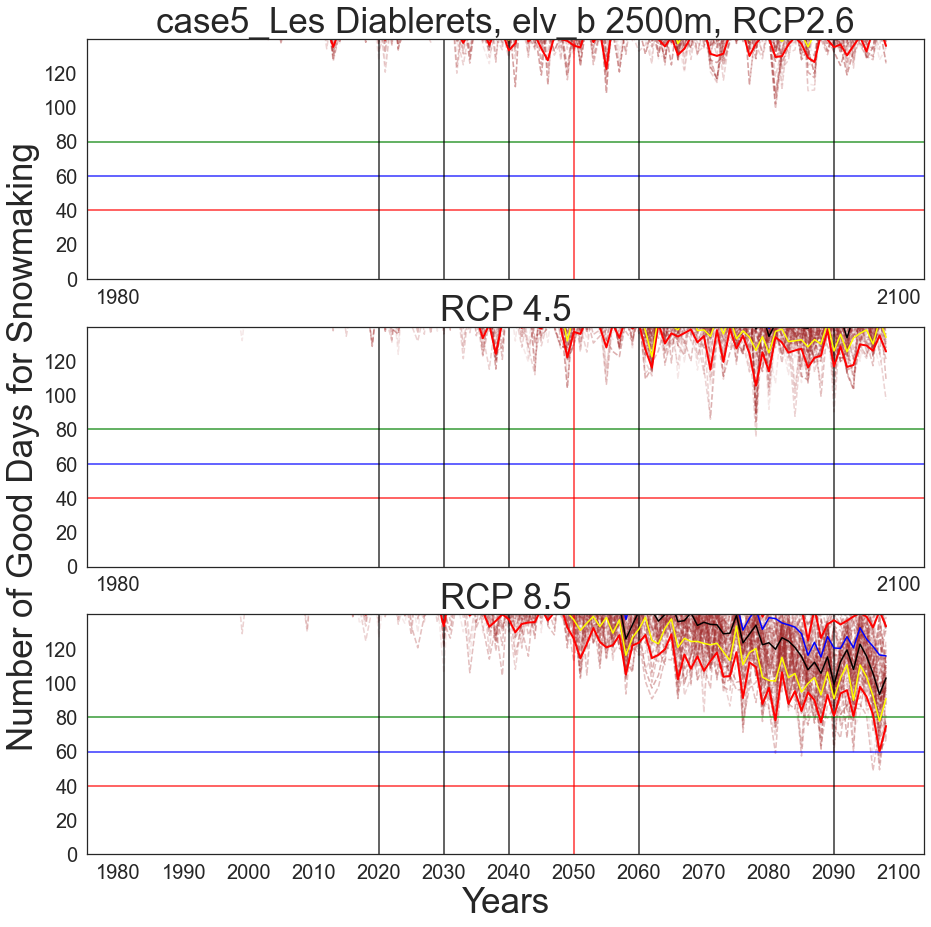

In [84]:
fig20, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Art26), p_Step):
    a = matrix_Art26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Art45), p_Step):
    a = matrix_Art45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Art85), p_Step):
    a = matrix_Art85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='brown', linestyle = '--', alpha=alpha_Fade)    

    
    
    
axs[0].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[1].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[2].xaxis.set_ticks(np.arange(1980, 2101, 10))

axs[0].yaxis.set_ticks(np.arange(0, 140, 20))
axs[1].yaxis.set_ticks(np.arange(0, 140, 20))
axs[2].yaxis.set_ticks(np.arange(0, 140, 20))

axs[0].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='x', labelsize=20)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)

axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=60, color='blue', alpha=0.8)
axs[0].axhline(y=40, color='red', alpha=0.8)

axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=60, color='blue', alpha=0.8)
axs[1].axhline(y=40, color='red', alpha=0.8)

axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=60, color='blue', alpha=0.8)
axs[2].axhline(y=40, color='red', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2040, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='red', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2040, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='red', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2040, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='red', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Art_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Art_26, color='yellow',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Art_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Art_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Art_26, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Art_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Art_45, color='yellow',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Art_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Art_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Art_45, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Art_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Art_85, color='yellow',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Art_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Art_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Art_85, color='red', linewidth = 2, alpha=1)



axs[0].set_ylim(bottom=0, top =140)
axs[0].set_title(title_Figs, fontsize=35)
#axs[0].set_xlabel('Years')
#axs[0].set_ylabel('Days with Artificial Snow Possibility', fontsize=12)

axs[1].set_ylim(bottom=0, top =140)
#axs[1].set_title('case3_Hoch_Ybrigh(1400m) RCP 4.5', fontsize=25)
axs[1].set_title('RCP 4.5', fontsize=35)

#axs[1].set_xlabel('Years')
axs[1].set_ylabel('Number of Good Days for Snowmaking', fontsize=35)

axs[2].set_ylim(bottom=0, top =140)
#axs[2].set_title('case3_Hoch_Ybrigh(1400m) RCP 8.5', fontsize=25)
axs[2].set_title('RCP 8.5', fontsize=35)

axs[2].set_xlabel('Years', fontsize=35)
#axs[2].set_ylabel('Days with Artificial Snow Possibility', fontsize=12)


fig20.savefig(os.path.join(rootVisualization, 'RCP26_45_85_ArtificialSnow.svg'), format='svg', dpi=300)
fig20.savefig(os.path.join(rootVisualization, 'RCP26_45_85_ArtificialSnow.tiff'), format='tiff', dpi=150)


plt.show()

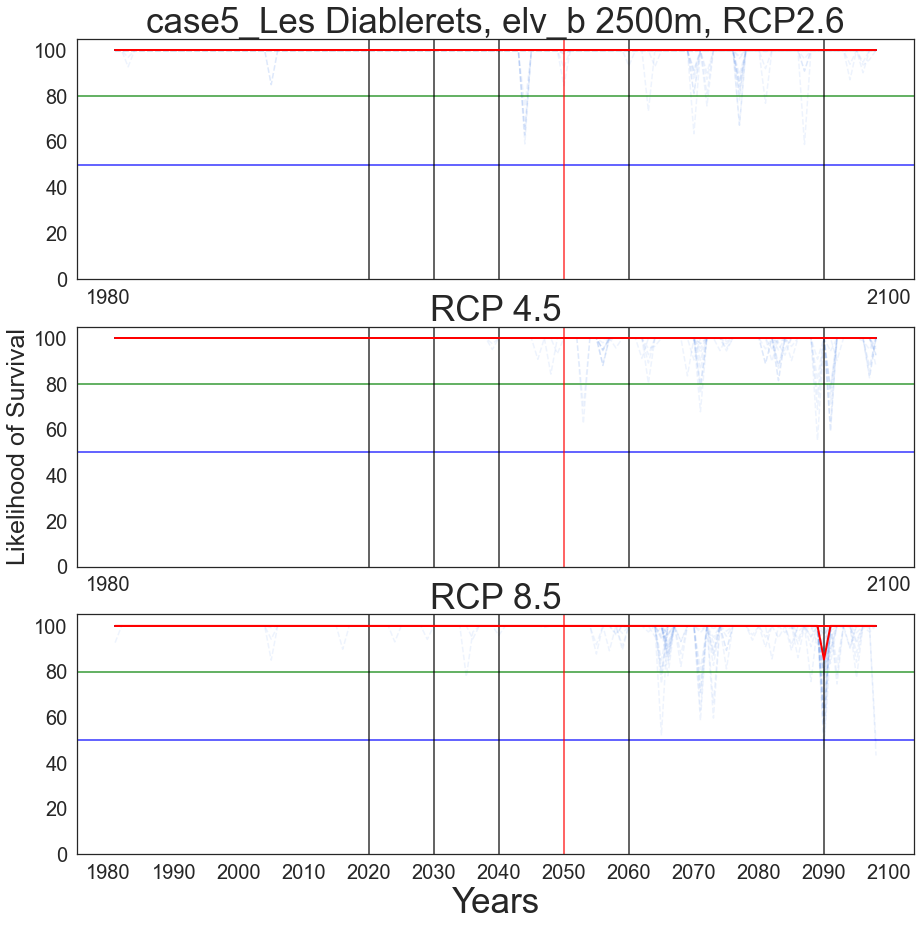

In [85]:
fig21, axs = plt.subplots(3,1, figsize=(15,15))
x_axis = np.arange(1981, 2099, step=1)


for i in range(0, len(matrix_Like26), p_Step):
    a = matrix_Like26[i, 1:, 1:2].astype(float)
    axs[0].plot(x_axis, a[:,0], color='cornflowerblue', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Like45), p_Step):
    a = matrix_Like45[i, 1:, 1:2].astype(float)
    axs[1].plot(x_axis, a[:,0], color='cornflowerblue', linestyle = '--', alpha=alpha_Fade)


for i in range(0, len(matrix_Like85), p_Step):
    a = matrix_Like85[i, 1:, 1:2].astype(float)
    axs[2].plot(x_axis, a[:,0], color='cornflowerblue', linestyle = '--', alpha=alpha_Fade)    


axs[0].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[1].xaxis.set_ticks(np.arange(1980, 2101, 120))
axs[2].xaxis.set_ticks(np.arange(1980, 2101, 10))

axs[0].yaxis.set_ticks(np.arange(0, 140, 20))
axs[1].yaxis.set_ticks(np.arange(0, 140, 20))
axs[2].yaxis.set_ticks(np.arange(0, 140, 20))

axs[0].tick_params(axis='x', labelsize=20)
axs[1].tick_params(axis='x', labelsize=20)
axs[2].tick_params(axis='x', labelsize=20)

axs[0].tick_params(axis='y', labelsize=20)
axs[1].tick_params(axis='y', labelsize=20)
axs[2].tick_params(axis='y', labelsize=20)    
    

axs[0].axhline(y=80, color='green', alpha=0.8)
axs[0].axhline(y=50, color='blue', alpha=0.8)
axs[1].axhline(y=80, color='green', alpha=0.8)
axs[1].axhline(y=50, color='blue', alpha=0.8)
axs[2].axhline(y=80, color='green', alpha=0.8)
axs[2].axhline(y=50, color='blue', alpha=0.8)



axs[0].axvline(x=2020, color='black', alpha=0.8)
axs[0].axvline(x=2030, color='black', alpha=0.8)
axs[0].axvline(x=2040, color='black', alpha=0.8)
axs[0].axvline(x=2050, color='red', alpha=0.8)
axs[0].axvline(x=2060, color='black', alpha=0.8)
axs[0].axvline(x=2090, color='black', alpha=0.8)
axs[1].axvline(x=2020, color='black', alpha=0.8)
axs[1].axvline(x=2030, color='black', alpha=0.8)
axs[1].axvline(x=2040, color='black', alpha=0.8)
axs[1].axvline(x=2050, color='red', alpha=0.8)
axs[1].axvline(x=2060, color='black', alpha=0.8)
axs[1].axvline(x=2090, color='black', alpha=0.8)
axs[2].axvline(x=2020, color='black', alpha=0.8)
axs[2].axvline(x=2030, color='black', alpha=0.8)
axs[2].axvline(x=2040, color='black', alpha=0.8)
axs[2].axvline(x=2050, color='red', alpha=0.8)
axs[2].axvline(x=2060, color='black', alpha=0.8)
axs[2].axvline(x=2090, color='black', alpha=0.8)



axs[0].plot(x_axis, q10_years_Like_26, color='red', linewidth = 2, alpha=1)
axs[0].plot(x_axis, q25_years_Like_26, color='yellow',linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q50_years_Like_26, color='black', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q75_years_Like_26, color='blue', linewidth = 1.5, alpha=1)
axs[0].plot(x_axis, q90_years_Like_26, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q10_years_Like_45, color='red', linewidth = 2, alpha=1)
axs[1].plot(x_axis, q25_years_Like_45, color='yellow',linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q50_years_Like_45, color='black', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q75_years_Like_45, color='blue', linewidth = 1.5, alpha=1)
axs[1].plot(x_axis, q90_years_Like_45, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q10_years_Like_85, color='red', linewidth = 2, alpha=1)
axs[2].plot(x_axis, q25_years_Like_85, color='yellow',linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q50_years_Like_85, color='black', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q75_years_Like_85, color='blue', linewidth = 1.5, alpha=1)
axs[2].plot(x_axis, q90_years_Like_85, color='red', linewidth = 2, alpha=1)


axs[0].set_ylim(bottom=0, top =105)
axs[0].set_title(title_Figs, fontsize=35)
#axs[0].set_xlabel('Years')
#axs[0].set_ylabel('Likelihood of Survival', fontsize=12)

axs[1].set_ylim(bottom=0, top =105)
#axs[1].set_title('case3_Hoch_Ybrigh(1400m) RCP 4.5', fontsize=25)
axs[1].set_title('RCP 4.5', fontsize=35)

#axs[1].set_xlabel('Years')
axs[1].set_ylabel('Likelihood of Survival', fontsize=25)

axs[2].set_ylim(bottom=0, top =105)
#axs[2].set_title('case3_Hoch_Ybrigh(1400m) RCP 8.5', fontsize=25)
axs[2].set_title('RCP 8.5', fontsize=35)


axs[2].set_xlabel('Years', fontsize=35)
#axs[2].set_ylabel('Likelihood of Survival', fontsize=12)


fig21.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Likelihood_Survival.svg'), format='svg', dpi=300)
fig21.savefig(os.path.join(rootVisualization, 'RCP26_45_85_Likelihood_Survival.tiff'), format='tiff', dpi=150)


plt.show()

In [86]:
dfAllAverages.head()

median26    median45   median85
0  170.3515  170.500045  165.99769
1  181.0000  181.000000  181.00000
2  182.0000  182.000000  182.00000
3  181.0000  181.000000  181.00000
4  181.0000  181.000000  181.00000

### Worst Case: Quantile 0.10 >> 90% of the scenarios satisfy this condition

In [87]:
title_Figs2 = 'Les Diablerets,2500m'

In [88]:
y_axis = np.arange(1981, 2100, step= 20)

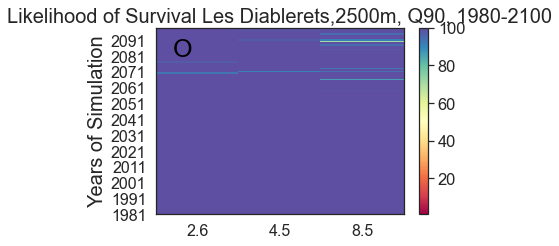

In [93]:
from matplotlib.ticker import FuncFormatter


fig22, (ax3) = plt.subplots(1, 1, figsize=(9,5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c3 = ax3.pcolor(dfAllAverages_Q10, cmap='Spectral', vmin=1, vmax=100, offsets = 0.35)
cb3 = fig22.colorbar(c3)

#xticks(np.arange(0, 4, step=1))
ax3.set_title('default: no edges')


#ax3.set_xlabel("Average over Climate scenarios in RCPs", fontsize=15)

ax3.set_ylabel("Years of Simulation", fontsize=20)
plt.xticks(x_axis, ('2.6', '4.5', '8.5'), fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
#plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099), fontsize=15)
plt.title("Likelihood of Survival {}, Q90, {}-{}".format(title_Figs2, 1980,2100), fontsize=20)

ax3.text(0.2, 100, 'O', color = 'Black', fontsize=25)

fig22.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.svg'), format='svg', dpi=300)
fig22.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q90.tiff'), format='tiff', dpi=300)


fig22.tight_layout()
plt.show()

### Median Case: Quantile 0.5 >> 50 % of the scenarios satisfy this condition

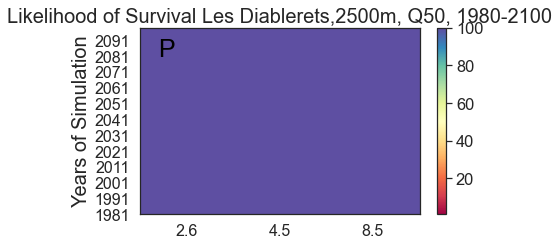

In [94]:
from matplotlib.ticker import FuncFormatter


fig23, (ax4) = plt.subplots(1, 1, figsize=(9.5,5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages, cmap='Spectral' ,vmin=1, vmax=100, offsets = .35)
cb4 = fig23.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


#ax4.set_xlabel("Average over Climate scenarios in RCPs", fontsize=15)

ax4.set_ylabel("Years of Simulation", fontsize=20)
plt.xticks(x_axis, ('2.6', '4.5', '8.5'), fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
#plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099), fontsize=15)
plt.title("Likelihood of Survival {}, Q50, {}-{}".format(title_Figs2, 1980,2100), fontsize=20)

ax4.text(0.2, 100, 'P', color = 'Black', fontsize=25)


fig23.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q50.svg'), format='svg', dpi=300)
fig23.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q50.tiff'), format='tiff', dpi=300)
#fig23.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q50.jpg'), format='jpg', dpi=300)


fig23.tight_layout()
plt.show()

### Best Case: Quantile 0.9 >> Only 10 % of the scenarios satisfy this condition

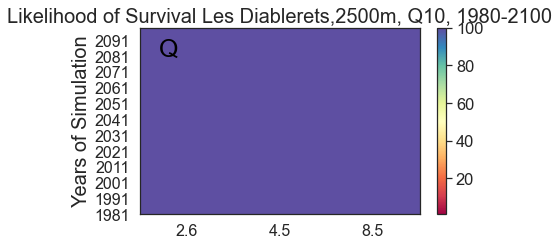

In [95]:
from matplotlib.ticker import FuncFormatter


fig24, (ax4) = plt.subplots(1, 1, figsize=(9.5,5))

x_axis = np.arange(0.5, 3.5, step=1)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


c4 = ax4.pcolor(dfAllAverages_Q90, cmap='Spectral' ,vmin=1, vmax=100)
cb4 = fig24.colorbar(c4)

#xticks(np.arange(0, 4, step=1))
ax4.set_title('default: no edges')


#ax4.set_xlabel("Average over Climate scenarios in RCPs", fontsize=15)

ax4.set_ylabel("Years of Simulation", fontsize=20)
plt.xticks(x_axis, ('2.6', '4.5', '8.5'), fontsize=16)
plt.yticks(fontsize=16)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)
#plt.title("Likelihood of survival of the resort at Q10 level from {} untill the year {}".format(1981, 2099), fontsize=15)
plt.title("Likelihood of Survival {}, Q10, {}-{}".format(title_Figs2, 1980,2100), fontsize=20)

ax4.text(0.2, 100, 'Q', color = 'Black', fontsize=25)


fig24.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q10.svg'), format='svg', dpi=300)
fig24.savefig(os.path.join(rootVisualization, 'Likelihood_All_Q10.tiff'), format='tiff', dpi=300)



fig24.tight_layout()
plt.show()

### Making dataframes for all RCP2.6 , RCP4.5, and RCP8.5 scenarios

In [96]:
print(matrix_GoodDays26.shape)
print(matrix_GoodDays45.shape)
print(matrix_GoodDays85.shape)
print(matrix_GoodDays.shape)

(2970, 119, 2)
(3015, 119, 2)
(3015, 119, 2)
(9000, 119, 2)


In [97]:
pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1]).head()

Season
0  1981-1982
1  1982-1983
2  1983-1984
3  1984-1985
4  1985-1986

In [98]:
df26_all = pd.DataFrame((matrix_GoodDays26[0][1:,0:1]), columns=matrix_GoodDays26[0,0,0:1])
for i in range(len(matrix_GoodDays26)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays26[i,0,1:])])
    df26_all = pd.concat((df26_all, b), axis = 1)

In [99]:
df26_all.head(7)
df26_all.to_csv(os.path.join(rootVisualization, 'df26_all.csv'), index = False)

In [100]:
matrix_GoodDays45[2,0,1:]

array(['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp'], dtype='<U47')

In [101]:
df45_all = pd.DataFrame((matrix_GoodDays45[0][1:,0:1]), columns=matrix_GoodDays45[0,0,0:1])
for i in range(len(matrix_GoodDays45)):
    #b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=matrix_GoodDays45[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays45[i,0,1:])])

    df45_all = pd.concat((df45_all, b), axis = 1)

In [102]:
df45_all.head(7)
df45_all.to_csv(os.path.join(rootVisualization, 'df45_all.csv'), index = False)

In [103]:
df85_all = pd.DataFrame((matrix_GoodDays85[0][1:,0:1]), columns=matrix_GoodDays85[0,0,0:1])
for i in range(len(matrix_GoodDays85)):
    #b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=matrix_GoodDays85[i,0,1:])
    b = pd.DataFrame(matrix_GoodDays85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_GoodDays85[i,0,1:])])

    df85_all = pd.concat((df85_all, b), axis = 1)

In [104]:
df85_all.head(7)
df85_all.to_csv(os.path.join(rootVisualization, 'df85_all.csv'), index = False)

In [105]:
df26_all_Matrix = df26_all.to_numpy()
df45_all_Matrix = df45_all.to_numpy()
df85_all_Matrix = df85_all.to_numpy()

In [106]:
df26_all_fin = pd.DataFrame((matrix_fin26[0][1:,0:1]), columns=matrix_fin26[0,0,0:1])
for i in range(len(matrix_fin26)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_fin26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_fin26[i,0,1:])])
    df26_all_fin = pd.concat((df26_all_fin, b), axis = 1)

In [107]:
df26_all_fin.head(7)

Season sc_1_['Money_sc_26_7']  \
0  1981-1982      9.049999999999994   
1  1982-1983      9.049999999999994   
2  1983-1984      9.099999999999994   
3  1984-1985      9.049999999999994   
4  1985-1986      9.049999999999994   
5  1986-1987      9.049999999999994   
6  1987-1988      9.099999999999994   

  sc_2_['Money_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp'] sc_3_['Money_sc_26_2']  \
0                                  5.460000000000004      6.300000000000005   
1                                 7.2400000000000055     7.2400000000000055   
2                                  7.280000000000006      7.280000000000006   
3                                 7.2400000000000055     7.2400000000000055   
4                                 7.2400000000000055     7.2400000000000055   
5                                 7.2400000000000055     7.2400000000000055   
6                                  7.280000000000006      7.280000000000006   

  sc_4_['Money_sc_26_6'] sc_5_['Money_sc_26_5'] sc_6_['Money_sc_26_8']  \
0     7.2400000000000055      9.049999999999994      5.640000000000004   
1     7.2400000000000055      9.049999999999994     7.2400000000000055   
2      7.280000000000006      9.099999999999994      7.280000000000006   
3     7.2400000000000055      9.049999999999994     7.2400000000000055   
4     7.2400000000000055      9.049999999999994      7.110000000000006   
5     7.2400000000000055      9.049999999999994      6.470000000000005   
6      7.280000000000006      9.099999999999994      7.280000000000006   

  sc_7_['Money_sc_26_12'] sc_8_['Money_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0       6.210000000000004                                6.590000000000005   
1       7.180000000000005                               7.2400000000000055   
2       7.040000000000005                                7.280000000000006   
3      7.2400000000000055                               7.2400000000000055   
4      7.2400000000000055                               7.2400000000000055   
5      7.2400000000000055                               7.2400000000000055   
6       7.280000000000006                                7.280000000000006   

  sc_9_['Money_sc_26_8'] sc_10_['Money_sc_26_2'] sc_11_['Money_sc_26_4']  \
0      5.640000000000004       5.710000000000004       6.720000000000005   
1     7.2400000000000055      7.2400000000000055      7.2400000000000055   
2      7.280000000000006       7.280000000000006       7.280000000000006   
3     7.2400000000000055      7.2400000000000055      7.2400000000000055   
4     7.2400000000000055      7.2400000000000055      7.2400000000000055   
5      7.230000000000006      7.2400000000000055      7.2400000000000055   
6      7.280000000000006       7.280000000000006       7.280000000000006   

  sc_12_['Money_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  \
0                                  5.680000000000004    
1                                 7.2400000000000055    
2                                  7.280000000000006    
3                                 7.2400000000000055    
4                                 7.2400000000000055    
5                                 7.2400000000000055    
6                                  7.280000000000006    

  sc_13_['Money_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp'] sc_14_['Money_sc_26_7']  \
0                               7.2400000000000055      7.2400000000000055   
1                               7.2400000000000055       7.140000000000005   
2                                7.280000000000006       7.280000000000006   
3                               7.2400000000000055      7.2400000000000055   
4                               7.2400000000000055      7.2400000000000055   
5                               7.2400000000000055      7.2400000000000055   
6                                7.280000000000006       7.280000000000006   

  sc_15_['Money_sc_26_10'] sc_16_['Money_sc_26_9'] sc_17_['Money_sc_26_10']  \
0       7.2400000000000055      7.2400000000000055        5.930000000000

In [108]:
df45_all_fin = pd.DataFrame((matrix_fin45[0][1:,0:1]), columns=matrix_fin45[0,0,0:1])
for i in range(len(matrix_fin45)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_fin45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_fin45[i,0,1:])])
    df45_all_fin = pd.concat((df45_all_fin, b), axis = 1)

In [109]:
df45_all_fin.head(7)

Season sc_1_['Money_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0  1981-1982                                  7.859999999999981   
1  1982-1983                                  9.049999999999994   
2  1983-1984                                  9.099999999999994   
3  1984-1985                                  9.049999999999994   
4  1985-1986                                  9.049999999999994   
5  1986-1987                                  9.049999999999994   
6  1987-1988                                  9.099999999999994   

  sc_2_['Money_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp']  \
0                                  8.179999999999984   
1                                  9.049999999999994   
2                                  9.099999999999994   
3                                  9.049999999999994   
4                                  9.049999999999994   
5                                  9.049999999999994   
6                                  9.099999999999994   

  sc_3_['Money_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0                                  5.320000000000004   
1                                 7.2400000000000055   
2                                  7.280000000000006   
3                                 7.2400000000000055   
4                                 7.2400000000000055   
5                                 7.2400000000000055   
6                                  7.280000000000006   

  sc_4_['Money_SMHI-RCA-IPSL-EUR11-RCP45-pcp']  \
0                            6.710000000000005   
1                           7.2400000000000055   
2                            7.280000000000006   
3                           7.2400000000000055   
4                           7.2400000000000055   
5                           7.2400000000000055   
6                            7.280000000000006   

  sc_5_['Money_DMI-HIRHAM-ECEARTH-EUR11-RCP45-pcp']  \
0                                7.2400000000000055   
1                                7.2400000000000055   
2                                 7.280000000000006   
3                                7.2400000000000055   
4                                7.2400000000000055   
5                                7.2400000000000055   
6                                 7.280000000000006   

  sc_6_['Money_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp'] sc_7_['Money_sc_45_19']  \
0                                  5.490000000000005       6.490000000000005   
1                                 7.2400000000000055      7.2400000000000055   
2                                  7.280000000000006       7.280000000000006   
3                                 7.2400000000000055      7.2400000000000055   
4                                 7.2400000000000055      7.2400000000000055   
5                                 7.2400000000000055      7.2400000000000055   
6                                  7.280000000000006       7.280000000000006   

  sc_8_['Money_sc_45_6'] sc_9_['Money_SMHI-RCA-IPSL-EUR44-RCP45-pcp']  \
0      5.080000000000003                            6.940000000000006   
1      5.650000000000005                           7.2400000000000055   
2      7.280000000000006                            6.140000000000005   
3     7.2400000000000055                           7.2400000000000055   
4     7.2400000000000055                           7.2400000000000055   
5      6.900000000000006                           7.2400000000000055   
6     7.1600000000000055                            7.280000000000006   

  sc_10_['Money_sc_45_12'] sc_11_['Money_sc_45_3'] sc_12_['Money_sc_45_4']  \
0       7.2400000000000055      7.2400000000000055       5.070000000000004   
1       7.2400000000000055      7.2400000000000055      6.6600000000000055   
2        6.450000000000005       7.280000000000006       7.280000000000006   
3        6.050000000000005      7.2400000000000055      7.2400000000000055   
4        6.400000000000002      7.2400000000000055      7.2400000000000055   
5        5.710000000000004      7.2

In [110]:
df85_all_fin = pd.DataFrame((matrix_fin85[0][1:,0:1]), columns=matrix_fin85[0,0,0:1])
for i in range(len(matrix_fin85)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_fin85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_fin85[i,0,1:])])
    df85_all_fin = pd.concat((df85_all_fin, b), axis = 1)

In [111]:
df85_all_fin.head(7)

Season sc_1_['Money_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp']  \
0  1981-1982                                 8.459999999999987   
1  1982-1983                                 8.819999999999991   
2  1983-1984                                 9.099999999999994   
3  1984-1985                                 9.049999999999994   
4  1985-1986                                 9.049999999999994   
5  1986-1987                                 9.049999999999994   
6  1987-1988                                 9.099999999999994   

  sc_2_['Money_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp']  \
0                                 6.440000000000005   
1                                 6.440000000000005   
2                                 7.280000000000006   
3                                7.2400000000000055   
4                                7.2400000000000055   
5                                7.2400000000000055   
6                                 7.280000000000006   

  sc_3_['Money_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp'] sc_4_['Money_sc_85_30']  \
0                                6.550000000000005       6.720000000000005   
1                               7.2400000000000055      7.2400000000000055   
2                                7.280000000000006       6.810000000000006   
3                               7.2400000000000055      7.2400000000000055   
4                               7.2400000000000055      7.2400000000000055   
5                               7.2400000000000055      7.2400000000000055   
6                                7.280000000000006       7.280000000000006   

  sc_5_['Money_sc_85_25'] sc_6_['Money_sc_85_16'] sc_7_['Money_sc_85_17']  \
0       4.770000000000004      7.2400000000000055      7.2400000000000055   
1      7.2400000000000055      7.2400000000000055      7.2400000000000055   
2       7.280000000000006       7.280000000000006       7.280000000000006   
3      7.2400000000000055      7.2400000000000055      7.2400000000000055   
4      7.2400000000000055      7.2400000000000055      7.2400000000000055   
5      7.2400000000000055       6.380000000000005      7.2400000000000055   
6       7.280000000000006       6.860000000000006       7.280000000000006   

  sc_8_['Money_SMHI-RCA-MIROC-EUR44-RCP85-pcp']  \
0                             6.560000000000005   
1                            7.1600000000000055   
2                             6.690000000000005   
3                             6.620000000000005   
4                            7.2400000000000055   
5                            7.2400000000000055   
6                             7.280000000000006   

  sc_9_['Money_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp']  \
0                                8.869999999999992   
1                                9.049999999999994   
2                                9.099999999999994   
3                                9.049999999999994   
4                                9.049999999999994   
5                                9.049999999999994   
6                                9.099999999999994   

  sc_10_['Money_DMI-HIRHAM-ECEARTH-EUR11-RCP85-pcp']  \
0                                 7.2400000000000055   
1                                 7.2400000000000055   
2                                  7.280000000000006   
3                                 7.2400000000000055   
4                                 7.2400000000000055   
5                                 7.2400000000000055   
6                                  7.280000000000006   

  sc_11_['Money_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp'] sc_12_['Money_sc_85_11']  \
0                                 8.869999999999992        6.320000000000005   
1                                 9.049999999999994        5.720000000000004   
2                                 9.099999999999994        7.280000000000006   
3                                 9.049999999999994       7.2400000000000055   
4                                 9.049999999999994       7.2400000000000055   
5                      

In [112]:
df26_all_Art = pd.DataFrame((matrix_Art26[0][1:,0:1]), columns=matrix_Art26[0,0,0:1])
for i in range(len(matrix_Art26)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_Art26[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_Art26[i,0,1:])])
    df26_all_Art = pd.concat((df26_all_Art, b), axis = 1)

In [113]:
df26_all_Art.head(7)

Season sc_1_['ArtSnowPossibility_sc_26_7']  \
0  1981-1982                              170.92   
1  1982-1983                              171.41   
2  1983-1984                              178.23   
3  1984-1985                  164.92000000000002   
4  1985-1986                              173.77   
5  1986-1987                  165.10000000000002   
6  1987-1988                  172.01999999999998   

  sc_2_['ArtSnowPossibility_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  \
0                                 158.20000000000005                
1                                             178.73                
2                                             161.42                
3                                             162.78                
4                                 171.23999999999998                
5                                 173.47999999999993                
6                                              167.5                

  sc_3_['ArtSnowPossibility_sc_26_2'] sc_4_['ArtSnowPossibility_sc_26_6']  \
0                              160.03                              175.17   
1                              157.82                  171.45000000000002   
2                              177.38                              179.59   
3                              176.15                  145.07999999999996   
4                  164.75999999999996                               179.4   
5                              170.85                  167.77000000000004   
6                  161.17000000000002                  176.16000000000005   

  sc_5_['ArtSnowPossibility_sc_26_5'] sc_6_['ArtSnowPossibility_sc_26_8']  \
0                              174.63                              165.55   
1                  176.92999999999998                  172.96999999999997   
2                  175.81999999999996                              179.44   
3                              156.37                  164.35000000000002   
4                  174.29999999999998                  169.79000000000002   
5                  161.73000000000002                              173.35   
6                  177.36999999999998                              178.92   

  sc_7_['ArtSnowPossibility_sc_26_12']  \
0                               170.27   
1                   155.90999999999997   
2                               170.78   
3                   160.92000000000002   
4                               162.66   
5                                173.9   
6                   161.42999999999995   

  sc_8_['ArtSnowPossibility_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                 172.80999999999997              
1                                 173.05999999999997              
2                                 178.77999999999997              
3                                 174.17000000000002              
4                                             172.92              
5                                 176.50999999999996              
6                                 176.06000000000006              

  sc_9_['ArtSnowPossibility_sc_26_8'] sc_10_['ArtSnowPossibility_sc_26_2']  \
0                  166.67999999999998                               169.01   
1                              173.48                               178.76   
2                              179.72                   174.64000000000001   
3                              165.23                   165.78999999999996   
4                              170.17                               175.85   
5                              174.07                               167.59   
6                  179.24999999999997                                169.1   

  sc_11_['ArtSnowPossibility_sc_26_4']  \
0                               162.49   
1                   175.60999999999999   
2                   175.70999999999998   
3                               173.77   
4                   174.09000000000003   
5                                169.1   
6        

In [114]:
df45_all_Art = pd.DataFrame((matrix_Art45[0][1:,0:1]), columns=matrix_Art45[0,0,0:1])
for i in range(len(matrix_Art45)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_Art45[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_Art45[i,0,1:])])
    df45_all_Art = pd.concat((df45_all_Art, b), axis = 1)

In [115]:
df45_all_Art.head(7)

Season sc_1_['ArtSnowPossibility_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0  1981-1982                                             149.69                
1  1982-1983                                             173.89                
2  1983-1984                                 147.50000000000006                
3  1984-1985                                             153.81                
4  1985-1986                                 165.42000000000002                
5  1986-1987                                 165.17999999999998                
6  1987-1988                                 162.60999999999996                

  sc_2_['ArtSnowPossibility_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp']  \
0                                             171.93                
1                                             169.39                
2                                 181.95999999999998                
3                                 158.78999999999996                
4                                              181.0                
5                                 172.23999999999998                
6                                             178.56                

  sc_3_['ArtSnowPossibility_MPICSC-REMO2-MPIESM-EUR44-RCP45-pcp']  \
0                                             149.69                
1                                             173.89                
2                                 147.50000000000006                
3                                             153.81                
4                                 165.42000000000002                
5                                 165.17999999999998                
6                                 162.60999999999996                

  sc_4_['ArtSnowPossibility_SMHI-RCA-IPSL-EUR11-RCP45-pcp']  \
0                                 173.31999999999996          
1                                 169.14000000000001          
2                                             169.14          
3                                             167.23          
4                                 176.20999999999998          
5                                             177.22          
6                                 160.01000000000002          

  sc_5_['ArtSnowPossibility_DMI-HIRHAM-ECEARTH-EUR11-RCP45-pcp']  \
0                                             172.11               
1                                 167.79999999999998               
2                                             166.57               
3                                 178.01000000000002               
4                                             168.15               
5                                             172.95               
6                                             165.67               

  sc_6_['ArtSnowPossibility_MPICSC-REMO1-MPIESM-EUR11-RCP45-pcp']  \
0                                             171.93                
1                                             169.39                
2                                 181.95999999999998                
3                                 158.78999999999996                
4                                              181.0                
5                                 172.23999999999998                
6                                             178.56                

  sc_7_['ArtSnowPossibility_sc_45_19'] sc_8_['ArtSnowPossibility_sc_45_6']  \
0                   178.18999999999997                              165.17   
1                               179.58                              177.44   
2                               179.01                  170.54000000000002   
3                   175.20000000000002                              165.05   
4                               174.94                              173.13   
5                               175.46                              168.55   
6                                170.4                               162.9   

  sc_9_['ArtSnowPossibility_SMH

In [116]:
df85_all_Art = pd.DataFrame((matrix_Art85[0][1:,0:1]), columns=matrix_Art85[0,0,0:1])
for i in range(len(matrix_Art85)):
    #b = pd.DataFrame(matrix_GoodDays26[i][1:,1:], columns=matrix_GoodDays26[i,0,1:])
    b = pd.DataFrame(matrix_Art85[i][1:,1:], columns=['sc_'+ str(i+1) + '_'+ str(matrix_Art85[i,0,1:])])
    df85_all_Art = pd.concat((df85_all_Art, b), axis = 1)

In [117]:
df85_all_Art.head(7)

Season sc_1_['ArtSnowPossibility_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp']  \
0  1981-1982                                 171.67000000000002               
1  1982-1983                                             172.21               
2  1983-1984                                 181.73000000000002               
3  1984-1985                                             174.28               
4  1985-1986                                 172.62999999999997               
5  1986-1987                                             176.46               
6  1987-1988                                 177.09000000000003               

  sc_2_['ArtSnowPossibility_KNMI-RACMO-ECEARTH-EUR44-RCP85-pcp']  \
0                                 171.67000000000002               
1                                             172.21               
2                                 181.73000000000002               
3                                             174.28               
4                                 172.62999999999997               
5                                             176.46               
6                                 177.09000000000003               

  sc_3_['ArtSnowPossibility_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp']  \
0                                 170.20999999999998              
1                                 170.25999999999996              
2                                             177.46              
3                                             172.07              
4                                             171.83              
5                                              175.5              
6                                 173.67000000000002              

  sc_4_['ArtSnowPossibility_sc_85_30'] sc_5_['ArtSnowPossibility_sc_85_25']  \
0                   166.85999999999993                               174.17   
1                               158.59                   164.54999999999995   
2                               168.03                   171.80999999999997   
3                   178.64000000000001                               167.67   
4                               169.32                               179.21   
5                               178.32                   173.69999999999996   
6                   164.76999999999998                               170.35   

  sc_6_['ArtSnowPossibility_sc_85_16'] sc_7_['ArtSnowPossibility_sc_85_17']  \
0                   175.64999999999998                               172.24   
1                   162.94000000000005                   174.41000000000003   
2                   166.79999999999998                                182.0   
3                   160.65999999999997                               170.51   
4                   164.79000000000002                               173.12   
5                   162.40999999999994                   176.05999999999997   
6                               174.19                               172.56   

  sc_8_['ArtSnowPossibility_SMHI-RCA-MIROC-EUR44-RCP85-pcp']  \
0                                             171.25           
1                                             167.13           
2                                             178.34           
3                                             179.87           
4                                             175.99           
5                                 180.01999999999998           
6                                             171.36           

  sc_9_['ArtSnowPossibility_KNMI-RACMO-HADGEM-EUR44-RCP85-pcp']  \
0                                             172.37              
1                                 172.48999999999995              
2                                 178.58999999999997              
3                                 173.75999999999996              
4                                 172.89000000000001              
5                                             176.42              
6                                          

### Survival Map CH2018 RCP2.6

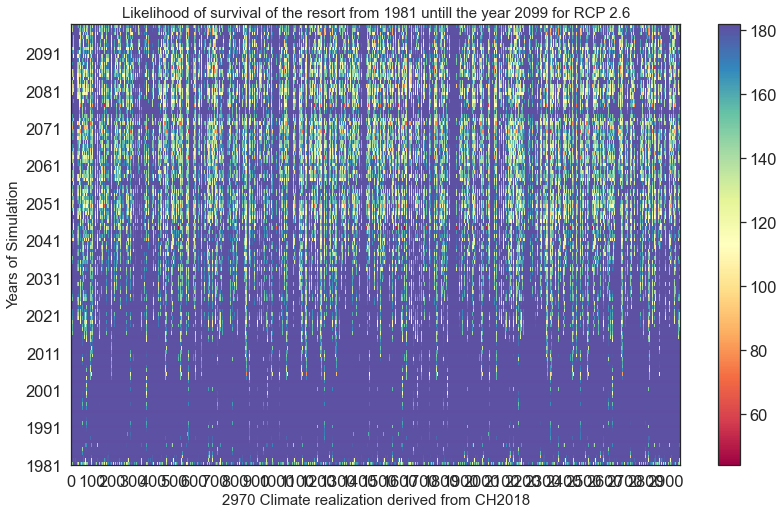

In [118]:
fig25, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df26_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

c3 = ax3.pcolor(Z, cmap='Spectral')
cb3 = fig25.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays26), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays26)), fontsize=15)
ax3.set_ylabel("Years of Simulation", fontsize=15)
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 2.6), fontsize=15)

fig25.tight_layout()
plt.show()

### Survival AMap CH2018 RCP4.5

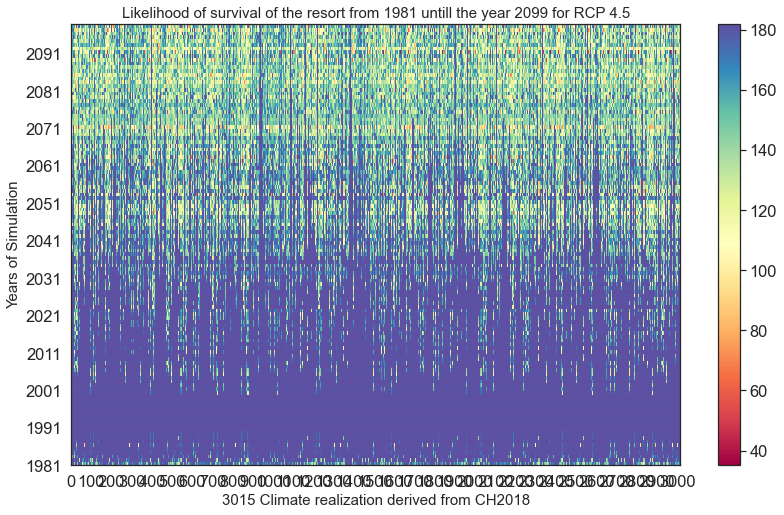

In [119]:
fig26, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df45_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='Spectral')
cb3 = fig26.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays45), step=100)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays45)), fontsize=15)
ax3.set_ylabel("Years of Simulation", fontsize=15)
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 4.5), fontsize=15)

fig26.tight_layout()
plt.show()

### Survival Map CH2018 RCP8.5

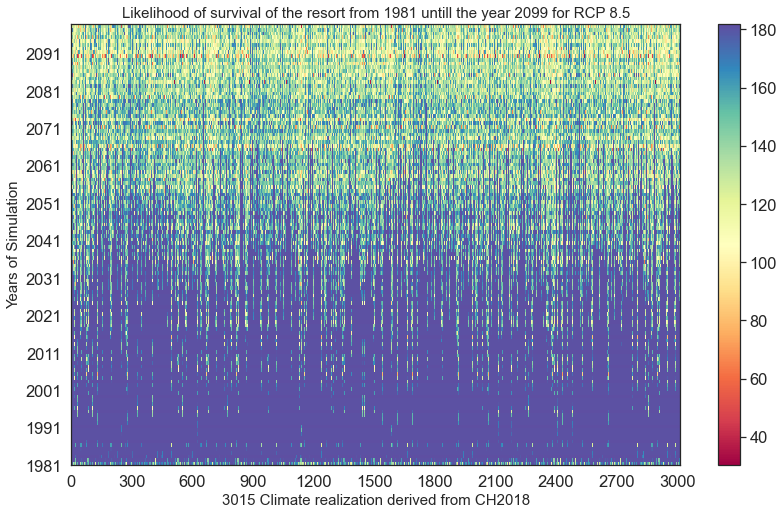

In [120]:
fig27, (ax3) = plt.subplots(1, 1, figsize=(12,7.5))

Z = list(df85_all_Matrix[:,1:].astype('float'))
#Z = 100*((np.random.rand(900, 118)).T)

#c3 = ax3.pcolor(Z)
c3 = ax3.pcolor(Z, cmap='Spectral')

cb3 = fig27.colorbar(c3)
ax3.set_title('default: no edges')

x_axis = np.arange(0, len(matrix_GoodDays85), step=300)
y_axis = np.arange(0, 118, step= 10)
y_axis_new = np.arange(1981, 2100, step= 10)


plt.xticks(x_axis, x_axis)
#plt.ylim(1981, 2100)
plt.yticks(y_axis, y_axis_new)

ax3.set_xlabel("{} Climate realization derived from CH2018".format(len(matrix_GoodDays85)), fontsize=15)
ax3.set_ylabel("Years of Simulation", fontsize=15)
plt.title("Likelihood of survival of the resort from {} untill the year {} for RCP {}".format(1981, 2099, 8.5), fontsize=15)

fig27.tight_layout()
plt.show()

## 3 years of not having good snow days in 10 years

### version 1: fixed threshold

In [121]:
def tipping_points_freq(df):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    dfColumns= df.columns
    
    scenarios_length= len(dfColumns)
    simulations_Length = len(df[dfColumns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        for j in range (1 , simulations_Length, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            if float(df[dfColumns[i]].iloc[j]) < 100.0:
                m += 1
                if m == 3:
                    tipping_freq[i] += 1
                    m = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                continue    
                #break
    return tipping_freq

### version 2: dynamic threshold

In [122]:
def tipping_points_freq2(df2, threshold):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    df2Columns= df2.columns
    
    scenarios_length= len(df2Columns)
    simulations_Length = len(df2[df2Columns[1]])
    tipping_freq = np.zeros(scenarios_length)
    
    for i in range (1, scenarios_length, 1):
        m = 0
        mm = 0
        for j in range (1 , simulations_Length, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            if float(df2[df2Columns[i]].iloc[j]) < threshold[i-1] -10:
                m += 1
                mm += 1
                if m == 3:
                    if mm <= 10:
                        tipping_freq[i] += 1
                        m = 0
                        mm = 0
                else:
                    if mm > 10:
                        m = 0
                        mm = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                m = 0
                mm = 0
                continue    
                #break
    return tipping_freq

### version 3: Time rolling and policy selection added

In [123]:
def tipping_points_freq3(df3, threshold, beginningYear, endYear, policy, tippingpoint_threshold, scenario):
    """
    This function, calculates the frequency of tipping points for each individual resort
    """
    df3Columns= df3.columns
    
    scenarios_length= len(df3Columns)
    #simulations_Length = len(df3[df3Columns[1]])
    simulations_Length = endYear - beginningYear + 1
    statring_year = beginningYear - 1981 
    tipping_freq = np.zeros(scenarios_length)
    goodPolicy = []
    goodScenario = []
    goodTippingPoint = []
    
    for i in range (1, scenarios_length, 1):
        m = 0
        mm = 0
        for j in range (1 + statring_year, statring_year + simulations_Length + 1, 1):
            #df26_all[df26_allColumns[1]].iloc[0]
            mm += 1
            if float(df3[df3Columns[i]].iloc[j]) < threshold[i-1]:
                m += 1
                if m == 3:
                    if mm <= 10:
                        tipping_freq[i] += 1
                        m = 0
                        mm = 0
                else:
                    if mm > 10:
                        m = 0
                        mm = 0
            else:
                #if m >= 3:
                #if m == 3:
                    #tipping_freq[i] += 1
                if mm > 10:
                    m = 0
                    mm = 0
                #continue    
                #break
                
        if tipping_freq[i] < tippingpoint_threshold:
            goodPolicy.append(policy[i-1])
            goodScenario.append(scenario[i-1])
            goodTippingPoint.append(tipping_freq[i])
        else:
            continue
            
    return tipping_freq, goodTippingPoint, goodPolicy, goodScenario

In [124]:
df26_all.shape

(118, 2971)

In [125]:
filt_S26 = (df_final_ema['xRCP'] == 1)
thresholds_26 = df_final_ema.loc[filt_S26, 'xGoodDays']
thresholds_26_m = thresholds_26.to_numpy()
thresholds_26_pol = df_final_ema.loc[filt_S26, 'policy']
thresholds_26_pol_m = thresholds_26_pol.to_numpy()
thresholds_26_sce = df_final_ema.loc[filt_S26, 'scenario']
thresholds_26_sce_m = thresholds_26_sce.to_numpy()

filt_S45 = (df_final_ema['xRCP'] == 2)
thresholds_45 = df_final_ema.loc[filt_S45, 'xGoodDays']
thresholds_45_m = thresholds_45.to_numpy()
thresholds_45_pol = df_final_ema.loc[filt_S45, 'policy']
thresholds_45_pol_m = thresholds_45_pol.to_numpy()
thresholds_45_sce = df_final_ema.loc[filt_S45, 'scenario']
thresholds_45_sce_m = thresholds_45_sce.to_numpy()

filt_S85 = (df_final_ema['xRCP'] == 3)
thresholds_85 = df_final_ema.loc[filt_S85, 'xGoodDays']
thresholds_85_m = thresholds_85.to_numpy()
thresholds_85_pol = df_final_ema.loc[filt_S85, 'policy']
thresholds_85_pol_m = thresholds_85_pol.to_numpy()
thresholds_85_sce = df_final_ema.loc[filt_S85, 'scenario']
thresholds_85_sce_m = thresholds_85_sce.to_numpy()


In [126]:
type(df26_all)

pandas.core.frame.DataFrame

In [127]:
thresholds_85_sce_m

array([  0,   2,   8, ..., 193, 195, 197], dtype=int64)

In [128]:
thresholds_45_sce_m

array([  1,   5,   7, ..., 196, 198, 199], dtype=int64)

In [129]:
df26_allColumns = df26_all.columns

In [130]:
df26_all[df26_allColumns[1]].iloc[0]

'181.0'

In [131]:
df26_all.head()

Season sc_1_['isOverSnow_sc_26_7']  \
0  1981-1982                       181.0   
1  1982-1983                   180.85995   
2  1983-1984                       182.0   
3  1984-1985                       181.0   
4  1985-1986                       181.0   

  sc_2_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  \
0                                 139.39789285714284        
1                                              181.0        
2                                              182.0        
3                                              181.0        
4                                              181.0        

  sc_3_['isOverSnow_sc_26_2'] sc_4_['isOverSnow_sc_26_6']  \
0          158.34364285714287                       181.0   
1                       181.0                       181.0   
2                       182.0                       182.0   
3                       181.0                       181.0   
4                       181.0                       181.0   

  sc_5_['isOverSnow_sc_26_5'] sc_6_['isOverSnow_sc_26_8']  \
0                       181.0           142.3747142857143   
1                       181.0                       181.0   
2                       182.0                       182.0   
3                       181.0                       181.0   
4                       181.0           178.4578928571429   

  sc_7_['isOverSnow_sc_26_12']  \
0           156.57875000000004   
1            180.2535357142857   
2            176.8399642857143   
3                        181.0   
4                        181.0   

  sc_8_['isOverSnow_KNMI-RACMO-HADGEM-EUR44-RCP26-pcp']  \
0                                 164.89310714285716      
1                                              181.0      
2                                              182.0      
3                                              181.0      
4                                              181.0      

  sc_9_['isOverSnow_sc_26_8'] sc_10_['isOverSnow_sc_26_2']  \
0           142.3747142857143           144.14896428571427   
1                       181.0                        181.0   
2                       182.0                        182.0   
3                       181.0                        181.0   
4                       181.0                        181.0   

  sc_11_['isOverSnow_sc_26_4']  \
0           168.82639285714282   
1                        181.0   
2                        182.0   
3                        181.0   
4                        181.0   

  sc_12_['isOverSnow_MPICSC-REMO2-MPIESM-EUR44-RCP26-pcp']  \
0                                 141.49192857142856         
1                                              181.0         
2                                              182.0         
3                                              181.0         
4                                              181.0         

  sc_13_['isOverSnow_SMHI-RCA-ECEARTH-EUR44-RCP26-pcp']  \
0                                              181.0      
1                                              181.0      
2                                              182.0      
3                                              181.0      
4                                              181.0      

  sc_14_['isOverSnow_sc_26_7'] sc_15_['isOverSnow_sc_26_10']  \
0                        181.0                         181.0   
1           177.25646428571432                         181.0   
2                        182.0                         182.0   
3                        181.0                         181.0   
4                        181.0                         181.0   

  sc_16_['isOverSnow_sc_26_9'] sc_17_['isOverSnow_sc_26_10']  \
0                        181.0            149.22071428571428   
1                        181.0             175.2099642857143   
2                        182.0             92.76821428571427   
3                        181.0            157.37210714285715   
4                        181.0            177.78278571428572   

  sc

In [132]:
thresholds_45_sce_m.shape

(3015,)

In [133]:
#print(thresholds_85.shape)
print(type(thresholds_85_m))
print(thresholds_85_m[1])
print(thresholds_85_pol_m[20])
print(thresholds_85_sce_m[20])

<class 'numpy.ndarray'>
70.0
0
57


In [134]:
T1RCP26 = tipping_points_freq(df26_all)
T1RCP45 = tipping_points_freq(df45_all)
T1RCP85 = tipping_points_freq(df85_all)

In [135]:
T1RCP26_m = tipping_points_freq2(df26_all, thresholds_26_m)
T1RCP45_m = tipping_points_freq2(df45_all, thresholds_45_m)
T1RCP85_m = tipping_points_freq2(df85_all, thresholds_85_m)

In [136]:
T1RCP26_m_3 , tipping26_3, scenario26_3, policy26_3= tipping_points_freq3(df26_all, thresholds_26_m, 1981, 2097, thresholds_26_pol_m, 10, thresholds_26_sce_m)
T1RCP45_m_3 , tipping45_3, scenario45_3, policy45_3= tipping_points_freq3(df45_all, thresholds_45_m, 1981, 2097, thresholds_45_pol_m, 10, thresholds_45_sce_m)
T1RCP85_m_3 , tipping85_3, scenario85_3, policy85_3= tipping_points_freq3(df85_all, thresholds_85_m, 1981, 2097, thresholds_85_pol_m, 10, thresholds_85_sce_m)

In [137]:
print(len( policy26_3))
print(len( policy45_3))
print(len( policy85_3))

2970
3015
3015


In [138]:
print(len(scenario26_3))
print(len(scenario45_3))
print(len(scenario85_3))

2970
3015
3015


In [139]:
print(len(tipping26_3))
print(len(tipping45_3))
print(len(tipping85_3))

2970
3015
3015


In [140]:
print(len(T1RCP26_m_3))
print(len(T1RCP45_m_3))
print(len(T1RCP85_m_3))

2971
3016
3016


In [141]:
print(len(T1RCP26[1:]))
print(len(T1RCP45[1:]))
print(len(T1RCP85[1:]))

2970
3015
3015


In [142]:
type(T1RCP85)

numpy.ndarray

In [143]:
T1RCP85.shape

(3016,)

In [144]:
print(type(T1RCP85_m_3))
print(type(scenario85_3))
print(type(policy85_3))

<class 'numpy.ndarray'>
<class 'list'>
<class 'list'>


In [145]:
tipping26_3_df = pd.DataFrame(tipping26_3, columns =['tippingPoint26'])
tipping45_3_df = pd.DataFrame(tipping45_3, columns =['tippingPoint45'])
tipping85_3_df = pd.DataFrame(tipping85_3, columns =['tippingPoint85'])

scenario26_m_3 = pd.DataFrame(scenario26_3, columns =['Scenario26'])
scenario45_m_3 = pd.DataFrame(scenario45_3, columns =['Scenario45'])
scenario85_m_3 = pd.DataFrame(scenario85_3, columns =['Scenario85'])

policy26_m_3 = pd.DataFrame(policy26_3, columns =['Policy26'])
policy45_m_3 = pd.DataFrame(policy45_3, columns =['Policy45'])
policy85_m_3 = pd.DataFrame(policy85_3, columns =['Policy85'])

In [146]:
df_final_tipping_point = pd.concat((tipping26_3_df, scenario26_m_3, policy26_m_3, 
                                    tipping45_3_df, scenario45_m_3, policy45_m_3,
                                    tipping85_3_df, scenario85_m_3, policy85_m_3), axis = 1)

df_final_tipping_point.head(38)

tippingPoint26  Scenario26  Policy26  tippingPoint45  Scenario45  \
0              0.0         0.0       3.0             0.0           0   
1              0.0         0.0       4.0             0.0           0   
2              0.0         0.0       6.0             0.0           0   
3              0.0         0.0      19.0             0.0           0   
4              0.0         0.0      22.0             0.0           0   
5              0.0         0.0      24.0             0.0           0   
6              0.0         0.0      26.0             0.0           0   
7              0.0         0.0      27.0             0.0           0   
8              0.0         0.0      32.0             0.0           0   
9              0.0         0.0      33.0             0.0           0   
10             0.0         0.0      35.0             0.0           0   
11             0.0         0.0      41.0             0.0           0   
12             0.0         0.0      44.0             0.0           0   
13             0.0         0.0      47.0             0.0           0   
14             0.0         0.0      50.0             0.0           0   
15             0.0         0.0      52.0             0.0           0   
16             0.0         0.0      59.0             0.0           0   
17             0.0         0.0      63.0             0.0           0   
18             0.0         0.0      64.0             0.0           0   
19             0.0         0.0      66.0             0.0           0   
20             0.0         0.0      68.0             0.0           0   
21             0.0         0.0      70.0             0.0           0   
22             0.0         0.0      71.0             0.0           0   
23             0.0         0.0      72.0             0.0           0   
24             0.0         0.0      76.0             0.0           0   
25             0.0         0.0      81.0             0.0           0   
26             0.0         0.0      83.0             0.0           0   
27             0.0         0.0      84.0             0.0           0   
28             0.0         0.0      85.0             0.0           0   
29             0.0         0.0      87.0             0.0           0   
30             0.0         0.0      94.0             0.0           0   
31             0.0         0.0     100.0             0.0           0   
32             0.0         0.0     101.0             0.0           0   
33             0.0         0.0     106.0             0.0           0   
34             0.0         0.0     109.0             0.0           0   
35             0.0         0.0     111.0             0.0           0   
36             0.0         0.0     115.0             0.0           0   
37             0.0         0.0     117.0             0.0           0   

    Policy45  tippingPoint85  Scenario85  Policy85  
0          1             0.0           0         0  
1          5             0.0           0         2  
2          7             0.0           0         8  
3         10             0.0           0         9  
4         12             0.0           0        11  
5         14             0.0           0        13  
6         16             0.0           0        15  
7         17             0.0           0        21  
8         18             0.0           0        30  
9         20             0.0           0        34  
10        23             0.0           0        38  
11        25             0.0           0        39  
12        28             0.0           0        40  
13        29             0.0           0        45  
14        31             0.0           0        46  
15        36             0.0           0        48  
16        37             0.0           0        49  
17        42             0.0           0        54  
18        43             0.0           0        55  
19        51             0.0           0        56  
20        53             0.0           0        57  
21        60             0.0 

### Specify the number of runs
for instance : number_Simulations = 9000

In [147]:
number_Simulations = 9000
x_axis = np.arange(1,number_Simulations + 2)

In [148]:
print("The lengthe of Y is: {}".format(len(T1RCP26[1:])))
print("The lengthe of X is: {}".format(len(matrix_GoodDays26) + 1 -1))
print('***')
print("The lengthe of Y is: {}".format(len(T1RCP45[1:])))
print("The lengthe of X is: {}".format((len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1) -(len(matrix_GoodDays26) + 1)))
print('***')
print("The lengthe of Y is: {}".format(len(T1RCP85[1:])))
print("The lengthe of X is: {}".format(number_Simulations+1 - (len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1)))

The lengthe of Y is: 2970
The lengthe of X is: 2970
***
The lengthe of Y is: 3015
The lengthe of X is: 3015
***
The lengthe of Y is: 3015
The lengthe of X is: 3015


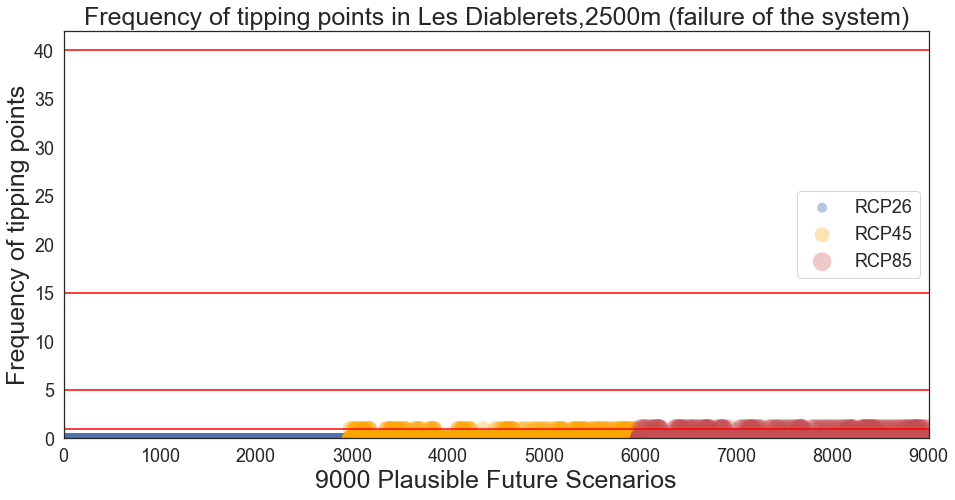

In [149]:
fig28, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (failure of the system)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency of tipping points", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =42)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=15, color='red')
ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig28.savefig(os.path.join(rootVisualization, 'tipping_point_All.svg'), format='svg', dpi=1200)
fig28.savefig(os.path.join(rootVisualization, 'tipping_point_All.tiff'), format='tiff', dpi=150)

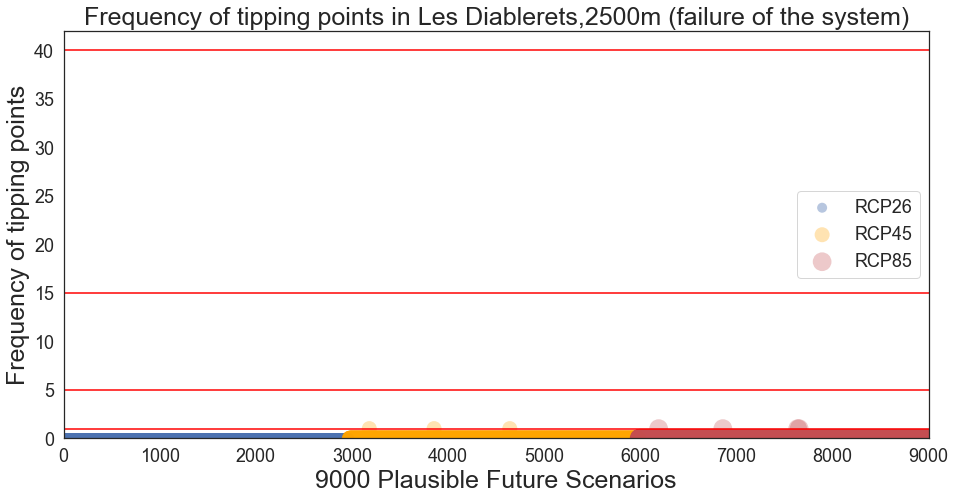

In [150]:
fig29, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (failure of the system)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency of tipping points", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =42)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=15, color='red')
ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig29.savefig(os.path.join(rootVisualization, 'tipping_point_All_new.svg'), format='svg', dpi=1200)
fig29.savefig(os.path.join(rootVisualization, 'tipping_point_All_new.tiff'), format='tiff', dpi=150)

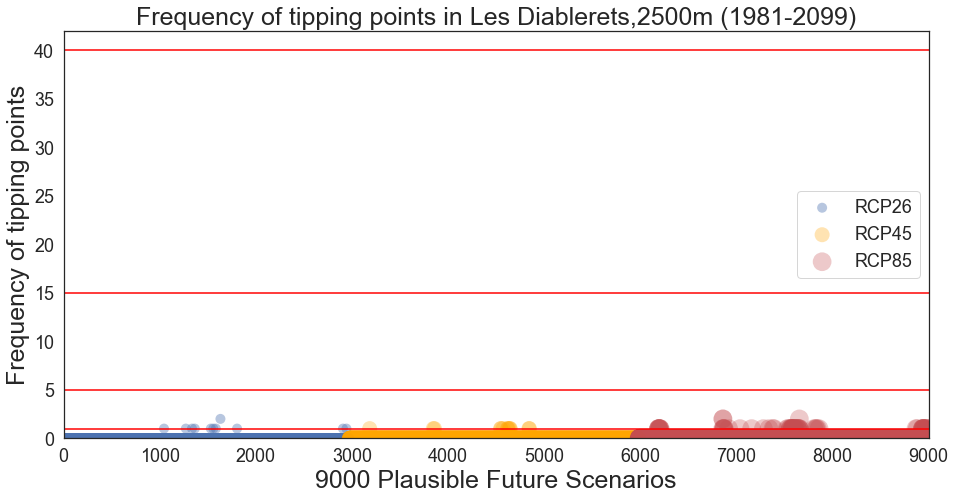

In [151]:
fig30, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m_3[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m_3[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m_3[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (1981-2099)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency of tipping points", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =42)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=15, color='red')
ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig30.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3.svg'), format='svg', dpi=1200)
fig30.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3.tiff'), format='tiff', dpi=150)

### Check the 45 policies

In [152]:
df_final_ema[filt_S]

X2fM       X3iPot    X5temp  X6tempArt  Xfactor1  xClimateModel  \
1     1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
201   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
401   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
601   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
801   1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
1801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
2801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
3801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
4801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
5801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
6801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
7801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8001  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8201  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8401  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8601  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   
8801  1.211966  1030.620563  5.634327   -1.97406  1.470899       0.469307   

      xRCP  x1SnowThershold  xGoodDays  scenario  policy     model  \
1      2.0            200.0       70.0         1       0  UZHModel   
201    2.0            240.0       90.0         1       1  UZHModel   
401    2.0            270.0       80.0         1       2  UZHModel   
601    2.0            220.0      100.0         1       3  UZHModel   
801    2.0            260.0       60.0         1       4  UZHModel   
1001   2.0            280.0       70.0         

In [211]:
df_final_ema[filt_S].to_csv(os.path.join(rootVisualization, 'df_policies.csv'), index = False)

In [153]:
T1RCP26_m_3_1980 , tipping26_3_1980, scenario26_3_1980, policy26_3_1980= tipping_points_freq3(df26_all, thresholds_26_m, 1981, 2010, thresholds_26_pol_m, 30, thresholds_26_sce_m)
T1RCP45_m_3_1980 , tipping45_3_1980, scenario45_3_1980, policy45_3_1980= tipping_points_freq3(df45_all, thresholds_45_m, 1981, 2010, thresholds_45_pol_m, 30, thresholds_45_sce_m)
T1RCP85_m_3_1980 , tipping85_3_1980, scenario85_3_1980, policy85_3_1980= tipping_points_freq3(df85_all, thresholds_85_m, 1981, 2010, thresholds_85_pol_m, 30, thresholds_85_sce_m)

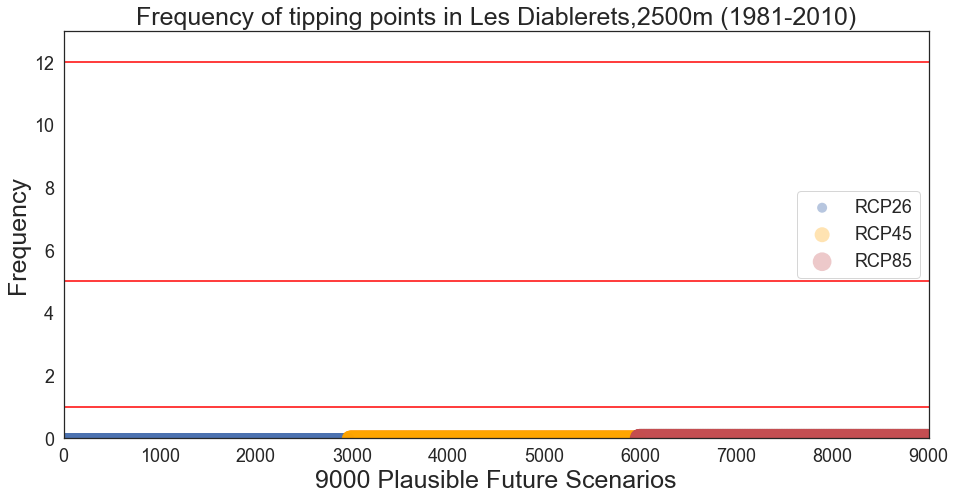

In [154]:
fig31, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m_3_1980[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m_3_1980[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m_3_1980[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (1981-2010)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =13)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=12, color='red')
#ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig31.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_1981.svg'), format='svg', dpi=600)
fig31.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_1981.tiff'), format='tiff', dpi=150)

In [155]:
type(T1RCP85_m_3_1980)

numpy.ndarray

In [156]:
T1RCP26_m_3_1980_df = pd.DataFrame(T1RCP26_m_3_1980, columns =['tippingPoint26_1980'])
tipping26_3_1980_df = pd.DataFrame(tipping26_3_1980, columns =['tippingPoint26_1_1980'])
scenario26_3_1980_df = pd.DataFrame(scenario26_3_1980, columns =['scenario26_1980'])
policy26_3_1980_df = pd.DataFrame(policy26_3_1980, columns =['policy26_1980'])

T1RCP45_m_3_1980_df = pd.DataFrame(T1RCP45_m_3_1980, columns =['tippingPoint45_1980'])
tipping45_3_1980_df = pd.DataFrame(tipping45_3_1980, columns =['tippingPoint45_1_1980'])
scenario45_3_1980_df = pd.DataFrame(scenario45_3_1980, columns =['scenario45_1980'])
policy45_3_1980_df = pd.DataFrame(policy45_3_1980, columns =['policy45_1980'])

T1RCP85_m_3_1980_df = pd.DataFrame(T1RCP85_m_3_1980, columns =['tippingPoint85_1980'])
tipping85_3_1980_df = pd.DataFrame(tipping85_3_1980, columns =['tippingPoint85_1_1980'])
scenario85_3_1980_df = pd.DataFrame(scenario85_3_1980, columns =['scenario85_1980'])
policy85_3_1980_df = pd.DataFrame(policy85_3_1980, columns =['policy85_1980'])

In [212]:
df_final_tipping_point_1980 = pd.concat((T1RCP26_m_3_1980_df, tipping26_3_1980_df, scenario26_3_1980_df, policy26_3_1980_df,
                                         T1RCP45_m_3_1980_df, tipping45_3_1980_df, scenario45_3_1980_df, policy45_3_1980_df,
                                         T1RCP85_m_3_1980_df, tipping85_3_1980_df, scenario85_3_1980_df, policy85_3_1980_df), axis = 1)
df_final_tipping_point_1980.to_csv(os.path.join(rootVisualization, 'df_final_tipping_point_1980.csv'), index = False)

In [158]:
print(T1RCP26_m_3_1980_df['tippingPoint26_1980'].value_counts())
print(T1RCP45_m_3_1980_df['tippingPoint45_1980'].value_counts())
print(T1RCP85_m_3_1980_df['tippingPoint85_1980'].value_counts())

0.0    2971
Name: tippingPoint26_1980, dtype: int64
0.0    3016
Name: tippingPoint45_1980, dtype: int64
0.0    3016
Name: tippingPoint85_1980, dtype: int64


In [159]:
print(tipping26_3_1980_df['tippingPoint26_1_1980'].value_counts())
print(tipping45_3_1980_df['tippingPoint45_1_1980'].value_counts())
print(tipping85_3_1980_df['tippingPoint85_1_1980'].value_counts())

0.0    2970
Name: tippingPoint26_1_1980, dtype: int64
0.0    3015
Name: tippingPoint45_1_1980, dtype: int64
0.0    3015
Name: tippingPoint85_1_1980, dtype: int64


In [160]:
print(scenario26_3_1980_df['scenario26_1980'].value_counts())
print(scenario45_3_1980_df['scenario45_1980'].value_counts())
print(scenario85_3_1980_df['scenario85_1980'].value_counts())

43    66
42    66
38    66
36    66
34    66
32    66
30    66
28    66
26    66
24    66
22    66
20    66
18    66
16    66
14    66
12    66
10    66
8     66
6     66
4     66
2     66
40    66
44    66
41    66
1     66
39    66
37    66
35    66
33    66
31    66
29    66
27    66
25    66
23    66
21    66
19    66
17    66
15    66
13    66
11    66
9     66
7     66
5     66
3     66
0     66
Name: scenario26_1980, dtype: int64
43    67
42    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
24    67
22    67
20    67
18    67
16    67
14    67
12    67
10    67
8     67
6     67
4     67
2     67
40    67
44    67
41    67
1     67
39    67
37    67
35    67
33    67
31    67
29    67
27    67
25    67
23    67
21    67
19    67
17    67
15    67
13    67
11    67
9     67
7     67
5     67
3     67
0     67
Name: scenario45_1980, dtype: int64
43    67
42    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
24    67
22    67
20    67
18    67
1

In [161]:
print(policy26_3_1980_df['policy26_1980'].value_counts())
print(policy45_3_1980_df['policy45_1980'].value_counts())
print(policy85_3_1980_df['policy85_1980'].value_counts())

187    45
94     45
190    45
186    45
184    45
180    45
178    45
164    45
152    45
150    45
148    45
144    45
138    45
130    45
106    45
100    45
84     45
183    45
76     45
72     45
70     45
68     45
66     45
64     45
52     45
50     45
44     45
32     45
26     45
24     45
22     45
6      45
192    45
194    45
3      45
19     45
169    45
165    45
159    45
155    45
153    45
141    45
139    45
137    45
133    45
131    45
123    45
121    45
117    45
115    45
111    45
109    45
101    45
87     45
85     45
83     45
81     45
71     45
63     45
59     45
47     45
41     45
35     45
33     45
27     45
4      45
Name: policy26_1980, dtype: int64
199    45
108    45
174    45
170    45
168    45
162    45
158    45
154    45
146    45
126    45
124    45
118    45
116    45
114    45
112    45
110    45
104    45
182    45
98     45
90     45
88     45
80     45
74     45
60     45
42     45
36     45
28     45
20     45
18     45
16     45
14    

In [264]:
T1RCP26_m_3_2020 , tipping26_3_2020, scenario26_3_2020, policy26_3_2020= tipping_points_freq3(df26_all, thresholds_26_m, 2020, 2049, thresholds_26_pol_m, 1, thresholds_26_sce_m)
T1RCP45_m_3_2020 , tipping45_3_2020, scenario45_3_2020, policy45_3_2020= tipping_points_freq3(df45_all, thresholds_45_m, 2020, 2049, thresholds_45_pol_m, 1, thresholds_45_sce_m)
T1RCP85_m_3_2020 , tipping85_3_2020, scenario85_3_2020, policy85_3_2020= tipping_points_freq3(df85_all, thresholds_85_m, 2020, 2049, thresholds_85_pol_m, 1, thresholds_85_sce_m)

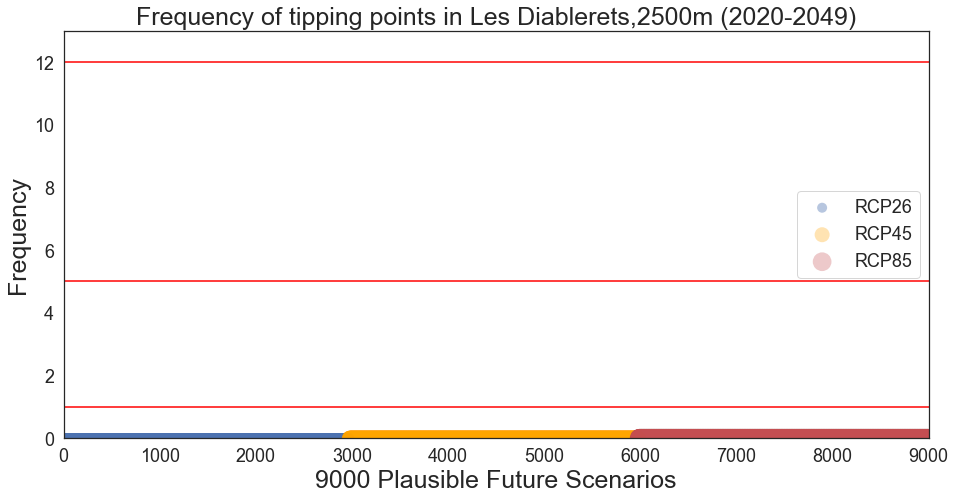

In [265]:
fig32, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m_3_2020[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m_3_2020[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m_3_2020[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (2020-2049)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =13)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=12, color='red')
#ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig32.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2020.svg'), format='svg', dpi=600)
fig32.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2020.tiff'), format='tiff', dpi=150)

In [266]:
T1RCP26_m_3_2020_df = pd.DataFrame(T1RCP26_m_3_2020, columns =['tippingPoint26_2020'])
tipping26_3_2020_df = pd.DataFrame(tipping26_3_2020, columns =['tippingPoint26_1_2020'])
scenario26_3_2020_df = pd.DataFrame(scenario26_3_2020, columns =['scenario26_2020'])
policy26_3_2020_df = pd.DataFrame(policy26_3_2020, columns =['policy26_2020'])

T1RCP45_m_3_2020_df = pd.DataFrame(T1RCP45_m_3_2020, columns =['tippingPoint45_2020'])
tipping45_3_2020_df = pd.DataFrame(tipping45_3_2020, columns =['tippingPoint45_1_2020'])
scenario45_3_2020_df = pd.DataFrame(scenario45_3_2020, columns =['scenario45_2020'])
policy45_3_2020_df = pd.DataFrame(policy45_3_2020, columns =['policy45_2020'])

T1RCP85_m_3_2020_df = pd.DataFrame(T1RCP85_m_3_2020, columns =['tippingPoint85_2020'])
tipping85_3_2020_df = pd.DataFrame(tipping85_3_2020, columns =['tippingPoint85_1_2020'])
scenario85_3_2020_df = pd.DataFrame(scenario85_3_2020, columns =['scenario85_2020'])
policy85_3_2020_df = pd.DataFrame(policy85_3_2020, columns =['policy85_2020'])

In [267]:
df_final_tipping_point_2020 = pd.concat((T1RCP26_m_3_2020_df, tipping26_3_2020_df, scenario26_3_2020_df, policy26_3_2020_df,
                                         T1RCP45_m_3_2020_df, tipping45_3_2020_df, scenario45_3_2020_df, policy45_3_2020_df,
                                         T1RCP85_m_3_2020_df, tipping85_3_2020_df, scenario85_3_2020_df, policy85_3_2020_df), axis = 1)
df_final_tipping_point_2020.to_csv(os.path.join(rootVisualization, 'df_final_tipping_point_2020.csv'), index = False)

In [268]:
print(T1RCP26_m_3_2020_df['tippingPoint26_2020'].value_counts())
print(T1RCP45_m_3_2020_df['tippingPoint45_2020'].value_counts())
print(T1RCP85_m_3_2020_df['tippingPoint85_2020'].value_counts())

0.0    2971
Name: tippingPoint26_2020, dtype: int64
0.0    3016
Name: tippingPoint45_2020, dtype: int64
0.0    3016
Name: tippingPoint85_2020, dtype: int64


In [269]:
print(tipping26_3_2020_df['tippingPoint26_1_2020'].value_counts())
print(tipping45_3_2020_df['tippingPoint45_1_2020'].value_counts())
print(tipping85_3_2020_df['tippingPoint85_1_2020'].value_counts())

0.0    2970
Name: tippingPoint26_1_2020, dtype: int64
0.0    3015
Name: tippingPoint45_1_2020, dtype: int64
0.0    3015
Name: tippingPoint85_1_2020, dtype: int64


In [270]:
print(scenario26_3_2020_df['scenario26_2020'].value_counts())
print(scenario45_3_2020_df['scenario45_2020'].value_counts())
print(scenario85_3_2020_df['scenario85_2020'].value_counts())

43    66
42    66
38    66
36    66
34    66
32    66
30    66
28    66
26    66
24    66
22    66
20    66
18    66
16    66
14    66
12    66
10    66
8     66
6     66
4     66
2     66
40    66
44    66
41    66
1     66
39    66
37    66
35    66
33    66
31    66
29    66
27    66
25    66
23    66
21    66
19    66
17    66
15    66
13    66
11    66
9     66
7     66
5     66
3     66
0     66
Name: scenario26_2020, dtype: int64
43    67
42    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
24    67
22    67
20    67
18    67
16    67
14    67
12    67
10    67
8     67
6     67
4     67
2     67
40    67
44    67
41    67
1     67
39    67
37    67
35    67
33    67
31    67
29    67
27    67
25    67
23    67
21    67
19    67
17    67
15    67
13    67
11    67
9     67
7     67
5     67
3     67
0     67
Name: scenario45_2020, dtype: int64
43    67
42    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
24    67
22    67
20    67
18    67
1

In [271]:
print(policy26_3_2020_df['policy26_2020'].value_counts())
print(policy45_3_2020_df['policy45_2020'].value_counts())
print(policy85_3_2020_df['policy85_2020'].value_counts())

187    45
94     45
190    45
186    45
184    45
180    45
178    45
164    45
152    45
150    45
148    45
144    45
138    45
130    45
106    45
100    45
84     45
183    45
76     45
72     45
70     45
68     45
66     45
64     45
52     45
50     45
44     45
32     45
26     45
24     45
22     45
6      45
192    45
194    45
3      45
19     45
169    45
165    45
159    45
155    45
153    45
141    45
139    45
137    45
133    45
131    45
123    45
121    45
117    45
115    45
111    45
109    45
101    45
87     45
85     45
83     45
81     45
71     45
63     45
59     45
47     45
41     45
35     45
33     45
27     45
4      45
Name: policy26_2020, dtype: int64
199    45
108    45
174    45
170    45
168    45
162    45
158    45
154    45
146    45
126    45
124    45
118    45
116    45
114    45
112    45
110    45
104    45
182    45
98     45
90     45
88     45
80     45
74     45
60     45
42     45
36     45
28     45
20     45
18     45
16     45
14    

In [272]:
T1RCP26_m_3_2050 , tipping26_3_2050, scenario26_3_2050, policy26_3_2050= tipping_points_freq3(df26_all, thresholds_26_m, 2050, 2079, thresholds_26_pol_m, 1, thresholds_26_sce_m)
T1RCP45_m_3_2050 , tipping45_3_2050, scenario45_3_2050, policy45_3_2050= tipping_points_freq3(df45_all, thresholds_45_m, 2050, 2079, thresholds_45_pol_m, 1, thresholds_45_sce_m)
T1RCP85_m_3_2050 , tipping85_3_2050, scenario85_3_2050, policy85_3_2050= tipping_points_freq3(df85_all, thresholds_85_m, 2050, 2079, thresholds_85_pol_m, 1, thresholds_85_sce_m)

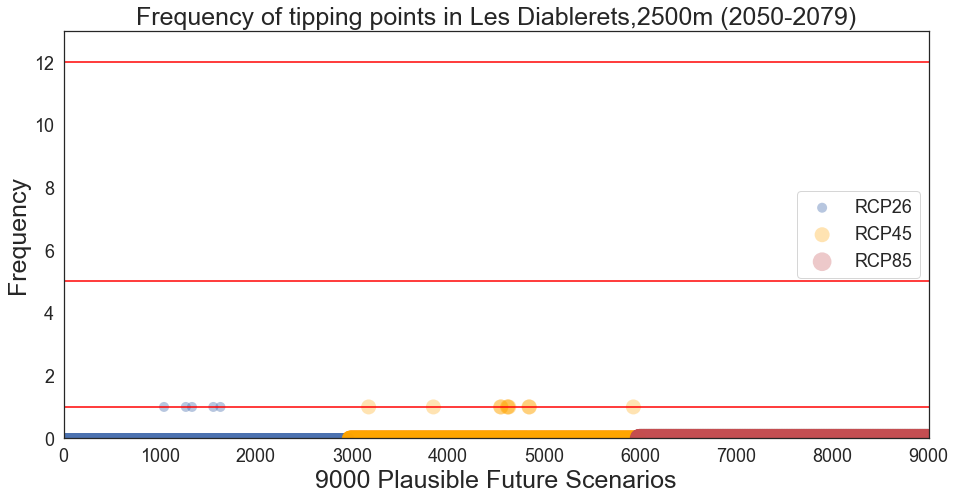

In [273]:
fig33, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m_3_2050[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m_3_2050[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m_3_2050[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (2050-2079)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =13)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=12, color='red')
#ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig33.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2050.svg'), format='svg', dpi=600)
fig33.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2050.tiff'), format='tiff', dpi=150)

In [274]:
T1RCP26_m_3_2050_df = pd.DataFrame(T1RCP26_m_3_2050, columns =['tippingPoint26_2050'])
tipping26_3_2050_df = pd.DataFrame(tipping26_3_2050, columns =['tippingPoint26_1_2050'])
scenario26_3_2050_df = pd.DataFrame(scenario26_3_2050, columns =['scenario26_2050'])
policy26_3_2050_df = pd.DataFrame(policy26_3_2050, columns =['policy26_2050'])

T1RCP45_m_3_2050_df = pd.DataFrame(T1RCP45_m_3_2050, columns =['tippingPoint45_2050'])
tipping45_3_2050_df = pd.DataFrame(tipping45_3_2050, columns =['tippingPoint45_1_2050'])
scenario45_3_2050_df = pd.DataFrame(scenario45_3_2050, columns =['scenario45_2050'])
policy45_3_2050_df = pd.DataFrame(policy45_3_2050, columns =['policy45_2050'])

T1RCP85_m_3_2050_df = pd.DataFrame(T1RCP85_m_3_2050, columns =['tippingPoint85_2050'])
tipping85_3_2050_df = pd.DataFrame(tipping85_3_2050, columns =['tippingPoint85_1_2050'])
scenario85_3_2050_df = pd.DataFrame(scenario85_3_2050, columns =['scenario85_2050'])
policy85_3_2050_df = pd.DataFrame(policy85_3_2050, columns =['policy85_2050'])

In [275]:
df_final_tipping_point_2050 = pd.concat((T1RCP26_m_3_2050_df, tipping26_3_2050_df, scenario26_3_2050_df, policy26_3_2050_df,
                                         T1RCP45_m_3_2050_df, tipping45_3_2050_df, scenario45_3_2050_df, policy45_3_2050_df,
                                         T1RCP85_m_3_2050_df, tipping85_3_2050_df, scenario85_3_2050_df, policy85_3_2050_df), axis = 1)
df_final_tipping_point_2050.to_csv(os.path.join(rootVisualization, 'df_final_tipping_point_2050.csv'), index = False)

In [276]:
print(T1RCP26_m_3_2050_df['tippingPoint26_2050'].value_counts())
print(T1RCP45_m_3_2050_df['tippingPoint45_2050'].value_counts())
print(T1RCP85_m_3_2050_df['tippingPoint85_2050'].value_counts())

0.0    2966
1.0       5
Name: tippingPoint26_2050, dtype: int64
0.0    3006
1.0      10
Name: tippingPoint45_2050, dtype: int64
0.0    3016
Name: tippingPoint85_2050, dtype: int64


In [277]:
print(tipping26_3_2050_df['tippingPoint26_1_2050'].value_counts())
print(tipping45_3_2050_df['tippingPoint45_1_2050'].value_counts())
print(tipping85_3_2050_df['tippingPoint85_1_2050'].value_counts())

0.0    2965
Name: tippingPoint26_1_2050, dtype: int64
0.0    3005
Name: tippingPoint45_1_2050, dtype: int64
0.0    3015
Name: tippingPoint85_1_2050, dtype: int64


In [278]:
print(scenario26_3_2050_df['scenario26_2050'].value_counts())
print(scenario45_3_2050_df['scenario45_2050'].value_counts())
print(scenario85_3_2050_df['scenario85_2050'].value_counts())

43    66
22    66
40    66
38    66
36    66
34    66
32    66
30    66
28    66
26    66
18    66
41    66
16    66
14    66
12    66
10    66
8     66
6     66
4     66
2     66
42    66
44    66
1     66
3     66
39    66
37    66
35    66
33    66
31    66
29    66
27    66
25    66
21    66
17    66
13    66
11    66
9     66
7     66
5     66
0     66
24    65
20    65
23    65
19    65
15    65
Name: scenario26_2050, dtype: int64
43    67
41    67
40    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
22    67
20    67
18    67
16    67
14    67
12    67
10    67
8     67
6     67
4     67
2     67
42    67
0     67
1     67
19    67
39    67
37    67
35    67
33    67
31    67
29    67
25    67
21    67
17    67
15    67
11    67
9     67
7     67
5     67
3     66
13    66
44    66
23    65
27    65
24    64
Name: scenario45_2050, dtype: int64
43    67
42    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
24    67
22    67
20    67
18    67
1

In [279]:
print(policy26_3_2050_df['policy26_2050'].value_counts())
print(policy45_3_2050_df['policy45_2050'].value_counts())
print(policy85_3_2050_df['policy85_2050'].value_counts())

187    45
183    45
190    45
186    45
184    45
180    45
178    45
164    45
152    45
150    45
148    45
144    45
138    45
130    45
106    45
100    45
94     45
84     45
76     45
72     45
70     45
68     45
66     45
64     45
50     45
44     45
32     45
26     45
24     45
22     45
6      45
192    45
194    45
3      45
109    45
169    45
165    45
159    45
153    45
141    45
137    45
133    45
131    45
123    45
121    45
115    45
19     45
111    45
101    45
59     45
27     45
33     45
35     45
41     45
87     45
4      45
63     45
71     45
81     45
83     45
85     45
139    44
47     44
155    44
117    44
52     44
Name: policy26_2050, dtype: int64
199    45
5      45
182    45
176    45
174    45
170    45
168    45
162    45
154    45
146    45
126    45
118    45
116    45
114    45
110    45
108    45
104    45
98     45
90     45
88     45
80     45
74     45
60     45
42     45
36     45
28     45
20     45
16     45
14     45
191    45
196   

In [280]:
T1RCP26_m_3_2070 , tipping26_3_2070, scenario26_3_2070, policy26_3_2070= tipping_points_freq3(df26_all, thresholds_26_m, 2070, 2097, thresholds_26_pol_m, 1, thresholds_26_sce_m)
T1RCP45_m_3_2070 , tipping45_3_2070, scenario45_3_2070, policy45_3_2070= tipping_points_freq3(df45_all, thresholds_45_m, 2070, 2097, thresholds_45_pol_m, 1, thresholds_45_sce_m)
T1RCP85_m_3_2070 , tipping85_3_2070, scenario85_3_2070, policy85_3_2070= tipping_points_freq3(df85_all, thresholds_85_m, 2070, 2097, thresholds_85_pol_m, 1, thresholds_85_sce_m)

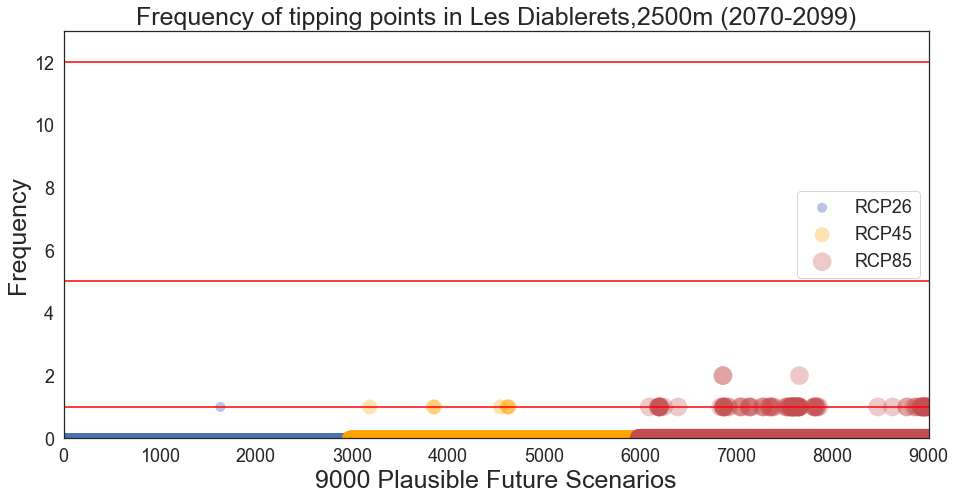

In [281]:
fig34, ax1 = plt.subplots(figsize=(15.5,7.5))
ax1.scatter(x_axis[1:(len(matrix_GoodDays26) + 1)], T1RCP26_m_3_2070[1:], s = 100, c='b' , marker='o', alpha=0.4, cmap='viridis', 
           edgecolors='none', label='RCP26')

ax1.scatter(x_axis[len(matrix_GoodDays26) + 1 : len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1], T1RCP45_m_3_2070[1:], s = 225, c='orange' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP45')

ax1.scatter(x_axis[len(matrix_GoodDays26) + len(matrix_GoodDays45) + 1 : number_Simulations+1], T1RCP85_m_3_2070[1:], s = 350, c='r' , marker='o', alpha=0.3, cmap='viridis', 
           edgecolors='none', label='RCP85')


ax1.set_title("Frequency of tipping points in {} (2070-2099)".format(title_Figs2), fontsize=25)
ax1.set_ylabel("Frequency", fontsize=25)
ax1.set_xlabel("9000 Plausible Future Scenarios", fontsize=25)
ax1.set_ylim(bottom=0, top =13)
ax1.set_xlim(left=0, right =9000)
ax1.axhline(y=1, color='red')
ax1.axhline(y=5, color='red')
ax1.axhline(y=12, color='red')
#ax1.axhline(y=40, color='red')
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)

ax1.legend(fontsize=18)


fig34.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2070.svg'), format='svg', dpi=600)
fig34.savefig(os.path.join(rootVisualization, 'tipping_point_All_new_3_2070.tiff'), format='tiff', dpi=150)

In [282]:
T1RCP26_m_3_2070_df = pd.DataFrame(T1RCP26_m_3_2070, columns =['tippingPoint26_2070'])
tipping26_3_2070_df = pd.DataFrame(tipping26_3_2070, columns =['tippingPoint26_1_2070'])
scenario26_3_2070_df = pd.DataFrame(scenario26_3_2070, columns =['scenario26_2070'])
policy26_3_2070_df = pd.DataFrame(policy26_3_2070, columns =['policy26_2070'])

T1RCP45_m_3_2070_df = pd.DataFrame(T1RCP45_m_3_2070, columns =['tippingPoint45_2070'])
tipping45_3_2070_df = pd.DataFrame(tipping45_3_2070, columns =['tippingPoint45_1_2070'])
scenario45_3_2070_df = pd.DataFrame(scenario45_3_2070, columns =['scenario45_2070'])
policy45_3_2070_df = pd.DataFrame(policy45_3_2070, columns =['policy45_2070'])

T1RCP85_m_3_2070_df = pd.DataFrame(T1RCP85_m_3_2070, columns =['tippingPoint85_2070'])
tipping85_3_2070_df = pd.DataFrame(tipping85_3_2070, columns =['tippingPoint85_1_2070'])
scenario85_3_2070_df = pd.DataFrame(scenario85_3_2070, columns =['scenario85_2070'])
policy85_3_2070_df = pd.DataFrame(policy85_3_2070, columns =['policy85_2070'])

In [283]:
df_final_tipping_point_2070 = pd.concat((T1RCP26_m_3_2070_df, tipping26_3_2070_df, scenario26_3_2070_df, policy26_3_2070_df,
                                         T1RCP45_m_3_2070_df, tipping45_3_2070_df, scenario45_3_2070_df, policy45_3_2070_df,
                                         T1RCP85_m_3_2070_df, tipping85_3_2070_df, scenario85_3_2070_df, policy85_3_2070_df), axis = 1)
df_final_tipping_point_2070.to_csv(os.path.join(rootVisualization, 'df_final_tipping_point_2070.csv'), index = False)

In [284]:
print(T1RCP26_m_3_2070_df['tippingPoint26_2070'].value_counts())
print(T1RCP45_m_3_2070_df['tippingPoint45_2070'].value_counts())
print(T1RCP85_m_3_2070_df['tippingPoint85_2070'].value_counts())

0.0    2970
1.0       1
Name: tippingPoint26_2070, dtype: int64
0.0    3009
1.0       7
Name: tippingPoint45_2070, dtype: int64
0.0    2914
1.0      99
2.0       3
Name: tippingPoint85_2070, dtype: int64


In [285]:
print(tipping26_3_2070_df['tippingPoint26_1_2070'].value_counts())
print(tipping45_3_2070_df['tippingPoint45_1_2070'].value_counts())
print(tipping85_3_2070_df['tippingPoint85_1_2070'].value_counts())

0.0    2969
Name: tippingPoint26_1_2070, dtype: int64
0.0    3008
Name: tippingPoint45_1_2070, dtype: int64
0.0    2913
Name: tippingPoint85_1_2070, dtype: int64


In [286]:
print(scenario26_3_2070_df['scenario26_2070'].value_counts())
print(scenario45_3_2070_df['scenario45_2070'].value_counts())
print(scenario85_3_2070_df['scenario85_2070'].value_counts())

43    66
41    66
40    66
38    66
36    66
34    66
32    66
30    66
28    66
26    66
22    66
20    66
18    66
16    66
14    66
12    66
10    66
8     66
6     66
4     66
2     66
42    66
44    66
1     66
3     66
39    66
37    66
35    66
33    66
31    66
29    66
27    66
25    66
23    66
21    66
19    66
17    66
15    66
13    66
11    66
9     66
7     66
5     66
0     66
24    65
Name: scenario26_2070, dtype: int64
43    67
41    67
40    67
38    67
36    67
34    67
32    67
30    67
28    67
26    67
22    67
20    67
18    67
16    67
14    67
12    67
10    67
8     67
6     67
4     67
2     67
42    67
44    67
1     67
19    67
39    67
37    67
35    67
33    67
31    67
29    67
27    67
25    67
21    67
17    67
15    67
11    67
9     67
7     67
5     67
0     67
3     66
23    66
13    65
24    64
Name: scenario45_2070, dtype: int64
0     67
11    67
18    67
10    67
26    67
28    67
30    67
32    67
34    67
36    67
38    67
40    67
8     67
5

In [287]:
print(policy26_3_2070_df['policy26_2070'].value_counts())
print(policy45_3_2070_df['policy45_2070'].value_counts())
print(policy85_3_2070_df['policy85_2070'].value_counts())

187    45
94     45
190    45
186    45
184    45
180    45
178    45
164    45
152    45
150    45
148    45
144    45
138    45
130    45
106    45
100    45
84     45
183    45
76     45
72     45
70     45
68     45
66     45
64     45
52     45
50     45
44     45
32     45
26     45
24     45
22     45
6      45
192    45
194    45
3      45
19     45
169    45
165    45
159    45
155    45
153    45
141    45
137    45
133    45
131    45
123    45
121    45
117    45
115    45
111    45
109    45
101    45
87     45
85     45
83     45
81     45
71     45
63     45
59     45
47     45
41     45
35     45
33     45
27     45
4      45
139    44
Name: policy26_2070, dtype: int64
199    45
198    45
182    45
176    45
174    45
170    45
168    45
162    45
158    45
154    45
146    45
126    45
118    45
116    45
114    45
110    45
108    45
104    45
98     45
90     45
88     45
80     45
74     45
60     45
42     45
28     45
20     45
18     45
16     45
14     45
12    

### Tables of the paper: Uncertainty analysis of CH2018 randomness scenarios


In [187]:
from scipy.integrate import simps

def area_max_min_df (df, a, b, lengthSim):

    max_scenario = np.array(df.max(axis=1))
    min_scenario = np.array(df.min(axis=1))
    
    # Compute the area using the composite trapezoidal rule.
    areamax1 = trapz(max_scenario[a:b], dx=1)
    areamin1 = trapz(min_scenario[a:b], dx=1)
    Uncertainty1 = ((areamax1 + areamin1)/2 )/ lengthSim
    
    # Compute the area using the composite Simpson's rule.
    areamax2 = simps(max_scenario[a:b], dx=1)
    areamin2 = simps(min_scenario[a:b], dx=1)
    Uncertainty2 = ((areamax2 + areamin2)/2 )/ lengthSim
    
    print("Start" + "**" * 30)
    print("Uncertainty Band1 ={} {}".format(Decimal(str(Uncertainty1)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("Uncertainty Band2 ={} {}".format(Decimal(str(Uncertainty2)).quantize(Decimal('.01'), rounding=ROUND_UP), "days"))
    print("**" * 20 +"End" + "\n")

    return
    #return    max_scenario, min_scenario, Uncertainty1, Uncertainty2

In [188]:
max_scenario = df26_all.max(axis=1)
min_scenario = df26_all.min(axis=1)

In [189]:
max_scenario.to_numpy()

array(['1981-1982', '1982-1983', '99.39549999999998', '1984-1985',
       '1985-1986', '1986-1987', '1987-1988', '1988-1989', '1989-1990',
       '1990-1991', '1991-1992', '1992-1993', '1993-1994', '1994-1995',
       '1995-1996', '1996-1997', '1997-1998', '1998-1999', '1999-2000',
       '2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005',
       '99.26790000000001', '2006-2007', '2007-2008', '2008-2009',
       '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024',
       '2024-2025', '2025-2026', '2026-2027', '2027-2028', '2028-2029',
       '98.0084333333334', '2030-2031', '2031-2032', '2032-2033',
       '2033-2034', '2034-2035', '2035-2036', '2036-2037', '2037-2038',
       '2038-2039', '98.90416666666665', '2040-2041', '97.85714285714285',
       '2042-2043', '2043-2044', '99.80096428571429', '2045-2046',
       '20

In [190]:
min_scenario.to_numpy()

array([113.07556667, 108.93193333, 102.13175   , 154.149     ,
       140.92126667, 139.8532    , 175.86896667, 162.00053333,
       151.37546667, 167.9034    , 143.34066667, 148.30306667,
       174.67906667, 181.        , 182.        , 162.95516667,
       150.4993    , 166.81096667, 141.9405    , 110.5519    ,
       147.4759    , 123.9504    , 163.38533333, 119.9364    ,
       100.88964286, 123.17476667, 132.6616    , 158.25666667,
       130.61746667, 116.77716667, 152.3719    , 120.7655    ,
       155.45966667, 106.28343333, 126.55146667, 114.43186667,
       131.2262    , 103.96213333, 102.2173    , 118.39013333,
       126.9369    , 130.72286667, 123.5574    , 114.78286667,
       125.41796667, 108.42156667, 119.9229    , 119.6168    ,
       100.85855172, 141.09393333, 123.90113333, 112.25413333,
       110.0581    , 120.77956667, 116.41293333, 113.2213    ,
       108.5131    , 108.09586667, 101.78286207, 117.2359    ,
       100.0665    , 118.04206667, 133.852     , 100.79

In [191]:
max_scenario.shape

(118,)

## Changes in Good Days

In [192]:
max_scenario.to_numpy()

array(['1981-1982', '1982-1983', '99.39549999999998', '1984-1985',
       '1985-1986', '1986-1987', '1987-1988', '1988-1989', '1989-1990',
       '1990-1991', '1991-1992', '1992-1993', '1993-1994', '1994-1995',
       '1995-1996', '1996-1997', '1997-1998', '1998-1999', '1999-2000',
       '2000-2001', '2001-2002', '2002-2003', '2003-2004', '2004-2005',
       '99.26790000000001', '2006-2007', '2007-2008', '2008-2009',
       '2009-2010', '2010-2011', '2011-2012', '2012-2013', '2013-2014',
       '2014-2015', '2015-2016', '2016-2017', '2017-2018', '2018-2019',
       '2019-2020', '2020-2021', '2021-2022', '2022-2023', '2023-2024',
       '2024-2025', '2025-2026', '2026-2027', '2027-2028', '2028-2029',
       '98.0084333333334', '2030-2031', '2031-2032', '2032-2033',
       '2033-2034', '2034-2035', '2035-2036', '2036-2037', '2037-2038',
       '2038-2039', '98.90416666666665', '2040-2041', '97.85714285714285',
       '2042-2043', '2043-2044', '99.80096428571429', '2045-2046',
       '20

In [193]:
max_scenario.shape

(118,)

In [194]:
min_scenario.to_numpy()

array([113.07556667, 108.93193333, 102.13175   , 154.149     ,
       140.92126667, 139.8532    , 175.86896667, 162.00053333,
       151.37546667, 167.9034    , 143.34066667, 148.30306667,
       174.67906667, 181.        , 182.        , 162.95516667,
       150.4993    , 166.81096667, 141.9405    , 110.5519    ,
       147.4759    , 123.9504    , 163.38533333, 119.9364    ,
       100.88964286, 123.17476667, 132.6616    , 158.25666667,
       130.61746667, 116.77716667, 152.3719    , 120.7655    ,
       155.45966667, 106.28343333, 126.55146667, 114.43186667,
       131.2262    , 103.96213333, 102.2173    , 118.39013333,
       126.9369    , 130.72286667, 123.5574    , 114.78286667,
       125.41796667, 108.42156667, 119.9229    , 119.6168    ,
       100.85855172, 141.09393333, 123.90113333, 112.25413333,
       110.0581    , 120.77956667, 116.41293333, 113.2213    ,
       108.5131    , 108.09586667, 101.78286207, 117.2359    ,
       100.0665    , 118.04206667, 133.852     , 100.79

In [195]:
df26_all_1 = df26_all.iloc[:, 1:]
df45_all_1 = df45_all.iloc[:, 1:]
df85_all_1 = df85_all.iloc[:, 1:]

In [196]:
print("1981-2010")
area_max_min_df(df26_all_1, 0, 30, 30)
area_max_min_df(df45_all_1, 0, 30, 30)
area_max_min_df(df85_all_1, 0, 30, 30)

#area_max_min_df(df26_all, 118)
#area_max_min_df(df45_all, 118)
#area_max_min_df(df85_all, 118)

1981-2010
Start************************************************************
Uncertainty Band1 =154.54 days
Uncertainty Band2 =154.55 days
****************************************End

Start************************************************************
Uncertainty Band1 =155.95 days
Uncertainty Band2 =155.93 days
****************************************End

Start************************************************************
Uncertainty Band1 =151.50 days
Uncertainty Band2 =151.61 days
****************************************End



In [197]:
print("2021-2050")
area_max_min_df(df26_all_1, 40, 70, 30)
area_max_min_df(df45_all_1, 40, 70, 30)
area_max_min_df(df85_all_1, 40, 70, 30)

#area_max_min_df(df26_all, 118)
#area_max_min_df(df45_all, 118)
#area_max_min_df(df85_all, 118)

2021-2050
Start************************************************************
Uncertainty Band1 =133.69 days
Uncertainty Band2 =133.70 days
****************************************End

Start************************************************************
Uncertainty Band1 =127.93 days
Uncertainty Band2 =127.94 days
****************************************End

Start************************************************************
Uncertainty Band1 =123.01 days
Uncertainty Band2 =123.11 days
****************************************End



In [198]:
print("2051-2080")
area_max_min_df(df26_all_1, 70, 100, 30)
area_max_min_df(df45_all_1, 70, 100, 30)
area_max_min_df(df85_all_1, 70, 100, 30)

#area_max_min_df(df26_all, 118)
#area_max_min_df(df45_all, 118)
#area_max_min_df(df85_all, 118)

2051-2080
Start************************************************************
Uncertainty Band1 =125.87 days
Uncertainty Band2 =125.97 days
****************************************End

Start************************************************************
Uncertainty Band1 =108.49 days
Uncertainty Band2 =108.38 days
****************************************End

Start************************************************************
Uncertainty Band1 =103.87 days
Uncertainty Band2 =103.64 days
****************************************End



In [199]:
print("2071-2100")
area_max_min_df(df26_all_1, 90, 119, 30)
area_max_min_df(df45_all_1, 90, 119, 30)
area_max_min_df(df85_all_1, 90, 119, 30)

#area_max_min_df(df26_all, 118)
#area_max_min_df(df45_all, 118)

2071-2100
Start************************************************************
Uncertainty Band1 =103.38 days
Uncertainty Band2 =103.25 days
****************************************End

Start************************************************************
Uncertainty Band1 =97.27 days
Uncertainty Band2 =97.40 days
****************************************End

Start************************************************************
Uncertainty Band1 =91.27 days
Uncertainty Band2 =91.27 days
****************************************End



## Changes in Financial situation

In [200]:
df26_all_fin_1 = df26_all_fin.iloc[:, 1:]
df45_all_fin_1 = df45_all_fin.iloc[:, 1:]
df85_all_fin_1 = df85_all_fin.iloc[:, 1:]

In [201]:
max_scenario = df26_all_fin_1.max(axis=1)
min_scenario = df26_all_fin_1.min(axis=1)

In [202]:
print("1981-2010")
area_max_min_df(df26_all_fin_1, 0, 30, 30)
area_max_min_df(df45_all_fin_1, 0, 30, 30)
area_max_min_df(df85_all_fin_1, 0, 30, 30)

1981-2010
Start************************************************************
Uncertainty Band1 =7.05 days
Uncertainty Band2 =7.05 days
****************************************End

Start************************************************************
Uncertainty Band1 =7.13 days
Uncertainty Band2 =7.13 days
****************************************End

Start************************************************************
Uncertainty Band1 =6.94 days
Uncertainty Band2 =6.95 days
****************************************End



In [203]:
print("2021-2050")
area_max_min_df(df26_all_fin_1, 40, 70, 30)
area_max_min_df(df45_all_fin_1, 40, 70, 30)
area_max_min_df(df85_all_fin_1, 40, 70, 30)

2021-2050
Start************************************************************
Uncertainty Band1 =6.36 days
Uncertainty Band2 =6.36 days
****************************************End

Start************************************************************
Uncertainty Band1 =6.28 days
Uncertainty Band2 =6.28 days
****************************************End

Start************************************************************
Uncertainty Band1 =6.18 days
Uncertainty Band2 =6.18 days
****************************************End



In [204]:
print("2051-2080")
area_max_min_df(df26_all_fin_1, 70, 100, 30)
area_max_min_df(df45_all_fin_1, 70, 100, 30)
area_max_min_df(df85_all_fin_1, 70, 100, 30)


2051-2080
Start************************************************************
Uncertainty Band1 =6.16 days
Uncertainty Band2 =6.16 days
****************************************End

Start************************************************************
Uncertainty Band1 =5.95 days
Uncertainty Band2 =5.95 days
****************************************End

Start************************************************************
Uncertainty Band1 =5.84 days
Uncertainty Band2 =5.84 days
****************************************End



In [205]:
print("2071-2100")
area_max_min_df(df26_all_fin_1, 90, 119, 30)
area_max_min_df(df45_all_fin_1, 90, 119, 30)
area_max_min_df(df85_all_fin_1, 90, 119, 30)

2071-2100
Start************************************************************
Uncertainty Band1 =5.56 days
Uncertainty Band2 =5.56 days
****************************************End

Start************************************************************
Uncertainty Band1 =5.41 days
Uncertainty Band2 =5.41 days
****************************************End

Start************************************************************
Uncertainty Band1 =5.18 days
Uncertainty Band2 =5.19 days
****************************************End



## Changes in Artificial Snow

In [206]:
df26_all_Art_1 = df26_all_Art.iloc[:, 1:]
df45_all_Art_1 = df45_all_Art.iloc[:, 1:]
df85_all_Art_1 = df85_all_Art.iloc[:, 1:]

In [207]:
print("1981-2010")
area_max_min_df(df26_all_Art_1, 0, 30, 30)
area_max_min_df(df45_all_Art_1, 0, 30, 30)
area_max_min_df(df85_all_Art_1, 0, 30, 30)

1981-2010
Start************************************************************
Uncertainty Band1 =160.05 days
Uncertainty Band2 =160.04 days
****************************************End

Start************************************************************
Uncertainty Band1 =159.29 days
Uncertainty Band2 =159.31 days
****************************************End

Start************************************************************
Uncertainty Band1 =158.72 days
Uncertainty Band2 =158.69 days
****************************************End



In [208]:
print("2021-2050")
area_max_min_df(df26_all_Art_1, 40, 70, 30)
area_max_min_df(df45_all_Art_1, 40, 70, 30)
area_max_min_df(df85_all_Art_1, 40, 70, 30)

2021-2050
Start************************************************************
Uncertainty Band1 =149.53 days
Uncertainty Band2 =149.55 days
****************************************End

Start************************************************************
Uncertainty Band1 =148.07 days
Uncertainty Band2 =148.04 days
****************************************End

Start************************************************************
Uncertainty Band1 =145.63 days
Uncertainty Band2 =145.65 days
****************************************End



In [209]:
print("2051-2080")
area_max_min_df(df26_all_Art_1, 70, 100, 30)
area_max_min_df(df45_all_Art_1, 70, 100, 30)
area_max_min_df(df85_all_Art_1, 70, 100, 30)

2051-2080
Start************************************************************
Uncertainty Band1 =147.32 days
Uncertainty Band2 =147.33 days
****************************************End

Start************************************************************
Uncertainty Band1 =137.65 days
Uncertainty Band2 =137.76 days
****************************************End

Start************************************************************
Uncertainty Band1 =113.54 days
Uncertainty Band2 =113.53 days
****************************************End



In [210]:
print("2071-2100")
area_max_min_df(df26_all_Art_1, 90, 119, 30)
area_max_min_df(df45_all_Art_1, 90, 119, 30)
area_max_min_df(df85_all_Art_1, 90, 119, 30)

2071-2100
Start************************************************************
Uncertainty Band1 =134.57 days
Uncertainty Band2 =134.56 days
****************************************End

Start************************************************************
Uncertainty Band1 =120.31 days
Uncertainty Band2 =120.59 days
****************************************End

Start************************************************************
Uncertainty Band1 =90.90 days
Uncertainty Band2 =90.98 days
****************************************End



## End